In [1]:
## Python dependencies 
import matplotlib.pyplot as plt
import matplotlib.colors as col
import numpy as np
import pandas as pd

In [39]:
# My Dependencies
from Samples.Data      import Data
from Plotter.Helper    import Helper
from Plotter.Plotter   import Plotter
from Cuts.Cuts         import Cuts

In [3]:
from scipy.optimize  import curve_fit
from scipy.special   import erf, betainc, gamma
from scipy           import asarray as ar,exp
from numpy.random    import uniform
from scipy           import stats
from scipy.integrate import simps
import array

from root_pandas import read_root 

# External Dependencies
from ROOT import TFile, TTree

In [4]:
import os, datetime

In [5]:
def dirStructure(figpath):
    date = datetime.datetime.now()
    fileName = str(date.year) + str(date.month) + str(date.day) + "/"
    
    try:
        os.mkdir(figpath+fileName)    
    except:
        print("Directory "+fileName+ " already exist")

    
    dirSubStructure(figpath + fileName + "Stacked/")
    dirSubStructure(figpath + fileName + "Unstacked/")
    
    dirSubStructure(figpath + fileName + "nJets/")
    for i in range(5):
        dirSubStructure(figpath + fileName + "nJets/Stacked_nJets"+str(i)+"/")
        dirSubStructure(figpath + fileName + "nJets/Unstacked_nJets"+str(i)+"/")
    
    return figpath+fileName  

def dirSubStructure(path):
    try:
        os.mkdir(path)
    except:
        print("Subdirectory for " + path + " already exists or failed.")
    
    try:
        os.mkdir(path+"log")
        os.mkdir(path+"log/Mult")
        os.mkdir(path+"linear")
        os.mkdir(path+"linear/Mult")
    except:
        print("Subdirectory for " + path + " already exists or failed.")

# Analysis

In [40]:
selection = 'mumug'
#selection = 'elelg'
#selection = 'ee'

#era = "2016"
era = "2017"

if selection == "mumug" or selection == "elelg":
    if era == "2016":
        run = ['B','C','D','E','F','G','H']
        #DataGen = 'rereco'
        DataGen = 'legacy'
        if DataGen == 'legacy':
            #SampleSet = 'MatchZGpaper'
            #SampleSet = 'Rerun'
            SampleSet = 'Correction'
        else:
            SampleSet = 'MatchZGpaper_newAna'
    elif era == "2017":
        run = ['B','C','D','E','F']
        DataGen = 'rereco'
        #SampleSet = 'V1'
        #SampleSet = 'V2_puWeight'
        #SampleSet = 'V2_puWeight_phID'
        #SampleSet = 'V4_phID_isConv'
        #SampleSet = 'V4_phID_isConv_MINUIT'
        SampleSet = 'V6_lPhoton'
        
    LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 'met',
            'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
            'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
            'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
            'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            'photonOneScEtaWidth','photonOneScPhiWidth',
            'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            'genPhotonPt','genPhotonEta','genPhotonPhi',
            'vetoDY','genIsoPass',
            'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            'llgPt','llgEta','llgPhi','llgM',
            'dileptonDEta','dileptonDPhi','dileptonDR',
            'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR',
            'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR',
            'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
            'nMuons','nElectrons','nPhotons','nJets',#'nTaus','nBJets',
            'passElectronVeto',
            ]
elif selection == "ee":
    if era == "2016":
        run = ['B','C','D','E','F','G','H']
        #DataGen = 'rereco'
        DataGen = 'legacy'
        if DataGen == 'legacy':
            #SampleSet = 'MatchZGpaper'
            #SampleSet = 'Rerun'
            SampleSet = 'Correction'
        else:
            SampleSet = 'MatchZGpaper_newAna'
    elif era == "2017":
        run = ['B','C','D','E','F']
        DataGen = 'rereco'
        SampleSet = 'EfficiencyCorrection/files_zee/V4_phID_isConv'    
    
    LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 
            #'eventWeight','puWeight',
            'genWeight','triggerWeight','photonIDWeight',
            #'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneCharge',
            #'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoCharge',
            #'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneEta',
            #'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            #'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            #'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            #'photonOneScEtaWidth','photonOneScPhiWidth',
            #'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            #'genPhotonPt',
            #'vetoDY','genIsoPass',
            #'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            #'nMuons','nElectrons','nTaus','nPhotons','nJets','nBJets',
            #'ProbeIDPass','ProbeISOPass','ProbeWorstPass','ProbeSigPass','ProbeIsConv',
            ]
path    = "/home/jcordero/CMS/data_"+era+"/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"/"
figpath = "/home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/"+era+"/"+DataGen+"/"+selection+"/"
pathSelections = "/home/jcordero/CMS/data_"+era+"/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"/Reduced"

figpath = dirStructure(figpath)


Help    = Helper(era)

Help.SetPath(path)
Help.figpath = figpath

Plotter = Plotter(Help=Help)
Plotter.SetFig(Help.figpath)

Cut = Cuts(path = Help.path)

Directory 202039/ already exist
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/202039/Stacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/202039/Stacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/202039/Unstacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/202039/Unstacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/202039/nJets/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/202039/nJets/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/202039/nJets/Stacked_nJets0/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/202039/nJets/Stacked_nJets0/ already exists or failed.
Subdirectory f

Error in <TFile::TFile>: file output__0.root does not exist


# START PLOTING

In [7]:
def ReadFromRegion(Plotter,path,era, Region):
    Names =['WJets','WWTo2L2Nu','TTTo2L2Nu','DYJets','ZGToLLG', 'DoubleMuon_'+era]
    reduced = []
    for name in Names:
        print('----- Reading '+name+' in Region ' +Region+ '--------')
        filename = path+'/'+name+'_'+Region.replace(" ","")+'.csv'
        print('-- '+filename)
        
        reduced.append(pd.read_csv(filename))
    isData = [True if name == 'DoubleMuon_'+era else False for name in Names]
    data = [Data(df = reduced[i],nameFile = Names[i],data = isData[i], Print=False)  for i in range(len(Names))]

    data, legend, colors, isData = Plotter.Help.SetDataOpt(data,selection = selection,exclude = [''])
    Plotter.SetPlotOpt(legend=legend,colors = colors)

    return data,legend,colors,isData

In [8]:
################################
#stacked = False
stacked = True

Blind  = False
#Blind  = True

#Plotting = False
Plotting = True

LOG = 'both'
#log = False
log = True

weightCorrection = False


#phType = 'ISR'
#phType = 'FSR'
phType = ''

Region = 'Sig'
#Region = 'Inv Sig'
#Region = 'Sideband'
#Region = 'Compare'
#Region = 'A'
#Region = ''

Charge = 'oposite'
#Charge = 'same'

#customRange = True
customRange = False

MVA = False
#MVA = True

#vetoDY = False
vetoDY = True

Print = False
#Print = True

#StatInclude = False
StatInclude = True

###############################
if stacked:
    histtype  = 'stepfilled'
    density   = False
    linewidth = 1
else:
    histtype  = 'step'
    density   = True
    linewidth = 1.7
###############################    

In [9]:
data = {}


Region = ''
data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,era,Region)

Region = 'Sig'
data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,era,Region)

Region = 'Inv Sig'
data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,era,Region)



'''
Region = 'SigIPFS'
data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)

Region = 'SignoIPFS'
data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)

''';

----- Reading WJets in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/WJets_.csv
----- Reading WWTo2L2Nu in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/WWTo2L2Nu_.csv
----- Reading TTTo2L2Nu in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/TTTo2L2Nu_.csv
----- Reading DYJets in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/DYJets_.csv
----- Reading ZGToLLG in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/ZGToLLG_.csv
----- Reading DoubleMuon_2017 in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/DoubleMuon_2017_.csv
0 WJets cornflowerblue
1 WWTo2L2Nu lightskyblue
2 TTTo2L2Nu lightcoral
3 DYJets plum
4 ZGToLLG pink
5 DoubleMuon_2017 k
----- Reading WJets in Region Sig--------
-- /home/jcordero/CMS/data_2017/re

Error in <TFile::TFile>: file output_WJets_0.root does not exist
Error in <TFile::TFile>: file output_WJets_0.root does not exist


In [10]:
Names = np.array([d.name for d in data['Sig']])

In [11]:
#region = "EE"
#region = ""
region = 'IPFS'
######## CUTS ##############
for Region in ['Sig','Inv Sig']:
    Cut.PhaseSpace(
                    data[Region],
                    phType = phType,
                    Charge = Charge,
                    Region = region,
                    Print  = Print,
                    MVA    = MVA,
                    vetoDY = vetoDY,
                  )


# Using the Yield of Background in the signal Region (Data-MCSignal) to use as sampling in the Sideband region

In [12]:
def GetPromptCount(data,part,var,ph,
                   name,etaS,varS,
                   noIPFS = False,
                  ):
    count = 0 
    
    D = np.array(data['Sig'])[Names==name][0]
    InitialCuts = D.cuts

    etaR = Help.ConvertString2Float(etaS)
    varR = Help.ConvertString2Float(varS)
    
    if not D.df.empty:
        D.AddCuts(np.logical_and(np.array(D.df.photonOneEta) > etaR[0],
                                 np.array(D.df.photonOneEta) <= etaR[1] ))
        if noIPFS:
            count = np.sum(D.GetWithCuts('weights'))
        else:
            if varR:
                D.AddCuts(np.logical_and(np.array(getattr(D.df,part+var+ph)) > varR[0],
                                         np.array(getattr(D.df,part+var+ph)) <= varR[1] ))

            count = np.sum(D.GetWithCuts('genPhotonIPFS'))

            D.ResetCuts(InitialCuts)

    
    return count

In [13]:
from iminuit import Minuit
from scipy.optimize import minimize

In [14]:
def Fit(data, Yield,err = 1):

    chi2  = lambda NSig: Help.CHI2(Exp= data,Obs = Yield(NSig))
    
    mP = Minuit( chi2,
                NSig       = 1,
                error_NSig = err,
                limit_NSig = (0,1e9),
                errordef   = 0.5,
              )  
    mP.migrad()

    return mP

In [15]:
# WITH genPhotonIPFS cut in function
def DetermineIchBias_Original(data,ichBLow,ichBHigh,step,part,var,ph):
    ############
    
    h = {}
    h['Sig']     = {}
    h['Inv Sig'] = {}
    
    ##############
    
    InitialCuts = {}
    PromptCuts = {}
    for Region in ['Sig','Inv Sig']:
        InitialCuts[Region] = {}
        PromptCuts[Region] = {}
        
        for d in data[Region]:
            InitialCuts[Region][d.name] = d.cuts
            try:
                d.AddCuts(np.array(d.df.genPhotonIPFS) == True)
                PromptCuts[Region][d.name] = d.cuts
            except:
                PromptCuts[Region][d.name] = d.cuts
    
    ############
    
    Region = 'Sig'
        
    for i in range(len(data[Region])):
        data[Region][i].ResetCuts(PromptCuts[Region][data[Region][i].name])
        h[Region][data[Region][i].name],Bins = FindRegionInSideband(data[Region][i],part=part,var=var,ph=ph)
    
    #############
    
    Region = 'Inv Sig'


    for i in range(len(data[Region])):
        data[Region][i].ResetCuts(PromptCuts[Region][data[Region][i].name])
        h[Region][data[Region][i].name],Bins = FindRegionInSideband(data[Region][i],part=part,var=var,ph=ph)

    DYJets = np.array(data[Region])[Names=='DYJets'][0]        
    DYJets.ResetCuts(PromptCuts[Region][DYJets.name])
    Ich = DYJets.df.photonOneIch
        
    #############
    
    Bias = {}
    FIT  = {}

    #############
    
    Yield    = {}
    Template = {}

    for d in data['Sig']:
        Yield   [d.name] = {}
        Template[d.name] = {}
    
    #############

    
    for ichLow in np.arange(ichBLow[0],ichBLow[1], step=step):
        Percent = (ichLow- ichBLow[0])/(ichBLow[1]-ichBLow[0])

        #if Percent%10 == 0:
        print( ' Progress --- ', Percent)

        Bias[ichLow] = {}
        FIT[ichLow] = {}


        for ichHigh in np.arange(ichLow+2,ichBHigh, step=step):

            Bias[ichLow][ichHigh] = {}
            FIT[ichLow][ichHigh] = {}

            
            DYJets.ResetCuts(PromptCuts['Inv Sig']['DYJets'])
            DYJets.AddCuts(np.logical_and(Ich > ichLow, Ich < ichBHigh))
            h[Region]['DYJets'],Bins = FindRegionInSideband(DYJets,part=part,var=var,ph=ph)

            for eta in Bins['photonOneEta']:
                etaS = str(eta)

                #####################
                
                Bias[ichLow][ichHigh][etaS] = {}
                FIT[ichLow][ichHigh][etaS]  = {}

                for d in data['Sig']:
                    Yield   [d.name][etaS] = {}
                    Template[d.name][etaS] = {}
                
                #####################

                for var1 in Bins[part+var+ph]:
                    var1S = str(var1)

                    #####################
                    for d in data['Sig']:
                        Yield[d.name][etaS][var1S] = int(np.sum(h['Sig'][d.name][etaS][var1S][0]))
                        if Yield[d.name][etaS][var1S] == 0:
                            Template[d.name][etaS][var1S] = h['Sig'][d.name][etaS][var1S][0]
                        else:
                            Template[d.name][etaS][var1S] = h['Sig'][d.name][etaS][var1S][0]/Yield[d.name][etaS][var1S]
                        
                    #####################
                    
                    #Yield   ['DYJets'][etaS][var1S] = int(np.sum(h['Sig']['DoubleMuon_2017'][etaS][var1S][0] -\
                    #                                             h['Sig']['ZGToLLG'][etaS][var1S][0]))
                    NN  = GetPromptCount(data,part,var,ph,name=  'ZGToLLG',etaS = etaS,varS = var1S)
                    NN += GetPromptCount(data,part,var,ph,name=    'WJets',etaS = etaS,varS = var1S)
                    NN += GetPromptCount(data,part,var,ph,name='WWTo2L2Nu',etaS = etaS,varS = var1S)
                    NN += GetPromptCount(data,part,var,ph,name='TTTo2L2Nu',etaS = etaS,varS = var1S)
                    
                    Yield   ['DYJets'][etaS][var1S] = int(np.sum(h['Sig']['DoubleMuon_2017'][etaS][var1S][0]) - NN)


                    T = h['Inv Sig']['DYJets'][etaS][var1S][0]
                    if np.sum(T) == 0:
                        Template['DYJets'][etaS][var1S] = T
                    else:
                        Template['DYJets'][etaS][var1S] = T/np.sum(T)
                        
                    ##############################################

                    Samp = {}
                    
                    for d in data['Sig']:
                        if d.name == 'DYJets':continue
                        Samp[d.name] = Sampling(
                                                 h['Sig'][d.name][etaS][var1S],
                                                 Yield[d.name][etaS][var1S]
                                                )
                        Samp[d.name] = Samp[d.name]/np.sum(Samp[d.name])
                        if np.sum( np.isnan(Samp[d.name]) ):
                            Samp[d.name] = np.zeros(len(Samp[d.name]))
                        
                    NBkg = Yield['DYJets'][etaS][var1S]
                    
                    ###########
                    
                    Temp = lambda NSig1:  NSig1*np.array(Samp[  'ZGToLLG']) + \
                                                (Yield['DoubleMuon_2017'][etaS][var1S]-NSig1)*( np.array(Samp[    'WJets']) + \
                                                        np.array(Samp['WWTo2L2Nu']) + \
                                                        np.array(Samp['TTTo2L2Nu'])) + \
                                                NBkg*np.array(Template['DYJets'][etaS][var1S])
                    
                    ###########
                               
                    #FITTING
                    fit = Fit(data = h['Sig']['DoubleMuon_2017'][etaS][var1S][0],
                              Yield = Temp
                             )

                    NSigYield = fit.values[0]
                    NSigSigma = fit.errors[0]
                    
                    '''
                    SamplingZG = Sampling(
                                         h['Sig']['ZGToLLG'][etaS][var1S],
                                         Yield['ZGToLLG'][etaS][var1S]
                                        )
                    SampTemplate = SamplingZG/np.sum(SamplingZG)
                    
                    ########
                    
                    NBkg = Yield['DYJets'][etaS][var1S]

                    ########
                    Temp = lambda NSig: NSig*np.array(SampTemplate) + \
                                        NBkg*np.array(Template['DYJets'][etaS][var1S])


                    ###########
                    
                    #FITTING
                    fit = Fit(data = h['Sig']['DoubleMuon_2017'][etaS][var1S][0],
                              Yield = Temp
                             )

                    NSigYield = fit.values[0]
                    NSigSigma = fit.errors[0]
                    ''';
                    ###########
                    Bias[ichLow][ichHigh][etaS][var1S]  = np.abs(Yield['ZGToLLG'][etaS][var1S] - NSigYield)/NSigSigma
                    FIT[ichLow][ichHigh][etaS][var1S] = [NSigYield,NSigSigma]

    ##################################
    
    
    for Region in ['Sig','Inv Sig']:                    
        for d in data[Region][:-1]:                    
            d.ResetCuts(InitialCuts[Region][d.name])
            
    
    ##################################
        
    return h, Bins, Bias, FIT,Samp

In [16]:
# NO genPhotonIPFS cut in function

def DetermineIchBias(data,ichBLow,ichBHigh,step,part,var,ph):
    
    ############
    
    InitialCuts = {}
    for Region in ['Sig','Inv Sig']:
        InitialCuts[Region] = {}
        
        for d in data[Region]:
            InitialCuts[Region][d.name] = d.cuts
    
    ############
    
    h = {}
    h['Sig']     = {}
    h['Inv Sig'] = {}
    
    ##############
    
    Region = 'Sig'
        
    for i in range(len(data[Region])):
        data[Region][i].ResetCuts( InitialCuts[Region][data[Region][i].name] )
        h[Region][data[Region][i].name],Bins = Help.FindRegionInSideband( data[Region][i],part=part,var=var,ph=ph )
    
    #############
    
    Region = 'Inv Sig'

    for i in range(len(data[Region])):
        data[Region][i].ResetCuts( InitialCuts[Region][data[Region][i].name] )
        h[Region][data[Region][i].name],Bins = Help.FindRegionInSideband( data[Region][i],part=part,var=var,ph=ph )

    DYJets = np.array(data[Region])[Names=='DYJets'][0]        
    DYJets.ResetCuts(InitialCuts[Region][DYJets.name])
    Ich = DYJets.df.photonOneIch
        
    #############
    
    Bias = {}
    FIT  = {}

    #############
    
    Yield    = {}
    Template = {}

    for d in data['Sig']:
        Yield   [d.name] = {}
        Template[d.name] = {}
    
    #############

    
    for ichLow in np.arange(ichBLow[0],ichBLow[1], step=step):
        Percent = (ichLow- ichBLow[0])/(ichBLow[1]-ichBLow[0])

        #if Percent%10 == 0:
        print( ' Progress --- ', Percent)

        Bias[ichLow] = {}
        FIT[ichLow] = {}


        for ichHigh in np.arange(ichLow+2,ichBHigh, step=step):
            
            Bias[ichLow][ichHigh] = {}
            FIT[ichLow][ichHigh] = {}

            
            DYJets.ResetCuts(InitialCuts['Inv Sig']['DYJets'])
            DYJets.AddCuts(np.logical_and(Ich > ichLow, Ich < ichBHigh))
            h[Region]['DYJets'],Bins = Help.FindRegionInSideband(DYJets,part=part,var=var,ph=ph)

            for eta in Bins['photonOneEta']:
                etaS = str(eta)

                #####################
                
                Bias[ichLow][ichHigh][etaS] = {}
                FIT[ichLow][ichHigh][etaS]  = {}

                for d in data['Sig']:
                    Yield   [d.name][etaS] = {}
                    Template[d.name][etaS] = {}
                
                #####################

                for var1 in Bins[part+var+ph]:
                    var1S = str(var1)

                    #####################
                    for d in data['Sig']:
                        Yield[d.name][etaS][var1S] = int(np.sum(h['Sig'][d.name][etaS][var1S][0]))
                        if Yield[d.name][etaS][var1S] == 0:
                            Template[d.name][etaS][var1S] = h['Sig'][d.name][etaS][var1S][0]
                        else:
                            Template[d.name][etaS][var1S] = h['Sig'][d.name][etaS][var1S][0]/Yield[d.name][etaS][var1S]
                        
                    #####################
                    noIPFS = True
                    
                    NN  = GetPromptCount(data,part,var,ph,name=  'ZGToLLG',etaS = etaS,varS = var1S,noIPFS = noIPFS)
                    NN += GetPromptCount(data,part,var,ph,name=    'WJets',etaS = etaS,varS = var1S,noIPFS = noIPFS)
                    NN += GetPromptCount(data,part,var,ph,name='WWTo2L2Nu',etaS = etaS,varS = var1S,noIPFS = noIPFS)
                    NN += GetPromptCount(data,part,var,ph,name='TTTo2L2Nu',etaS = etaS,varS = var1S,noIPFS = noIPFS)
                    
                    NData = np.sum(h['Sig']['DoubleMuon_2017'][etaS][var1S][0])
                    
                    Yield   ['DYJets'][etaS][var1S] = int(NData - NN)


                    T = h['Inv Sig']['DYJets'][etaS][var1S][0]
                    if np.sum(T) == 0:
                        Template['DYJets'][etaS][var1S] = T
                    else:
                        Template['DYJets'][etaS][var1S] = T/np.sum(T)
                        
                    ##############################################

                    Samp = {}
                    
                    for d in data['Sig']:
                        if d.name == 'DYJets':continue
                        Samp[d.name] = Help.Sampling(
                                                     h['Sig'][d.name][etaS][var1S],
                                                     Yield[d.name][etaS][var1S]
                                                    )
                        Samp[d.name] = Samp[d.name]/np.sum(Samp[d.name])
                        if np.sum( np.isnan(Samp[d.name]) ):
                            Samp[d.name] = np.zeros(len(Samp[d.name]))
                        
                    
                    ###########
                    NData = Yield[    'WJets'][etaS][var1S] +\
                            Yield['WWTo2L2Nu'][etaS][var1S] + \
                            Yield['TTTo2L2Nu'][etaS][var1S] + \
                            Yield[   'DYJets'][etaS][var1S]
                    
                    Temp = lambda NSig:   NSig                            * np.array(Samp[  'ZGToLLG']) + \
                                          Yield[    'WJets'][etaS][var1S] * np.array(Samp[    'WJets']) + \
                                          Yield['WWTo2L2Nu'][etaS][var1S] * np.array(Samp['WWTo2L2Nu']) + \
                                          Yield['TTTo2L2Nu'][etaS][var1S] * np.array(Samp['TTTo2L2Nu']) + \
                                          Yield[   'DYJets'][etaS][var1S] * np.array(Template['DYJets'][etaS][var1S])
                    
                    ###########
                               
                    #FITTING
                    fit = Fit(data = h['Sig']['DoubleMuon_2017'][etaS][var1S][0],
                              Yield = Temp,
                              err = np.sqrt(NData),
                             )

                    NSigYield = fit.values[0]
                    NSigSigma = fit.errors[0]
                    
                    ###########
                    Bias[ichLow][ichHigh][etaS][var1S] = np.abs(Yield['ZGToLLG'][etaS][var1S] - NSigYield)/NSigSigma
                    FIT[ichLow][ichHigh][etaS][var1S] = [NSigYield,NSigSigma]
                    
                    for Region in ['Sig','Inv Sig']:                    
                        for d in data[Region][:-1]:                    
                            d.ResetCuts(InitialCuts[Region][d.name])
                    
                    '''
                    print(etaS,var1S)
                    print(' NSig: ' ,int(NSigYield),
                          ' Yield: ',int(Yield['ZGToLLG'][etaS][var1S]),
                          #' R: '    ,round(NSigYield/Yield['ZGToLLG'][etaS][var1S],2),
                          '\n',
                          ' Yield: ',int(Yield['DYJets'][etaS][var1S]),
                          ' DYJets: ' ,int(np.sum(h['Sig']['DYJets'][etaS][var1S][0])),
                          ' DATA: ' ,int(np.sum(h['Sig']['DoubleMuon_2017'][etaS][var1S][0])),
                          '\n',
                         )
                    ''';

    ##################################
    
    for Region in ['Sig','Inv Sig']:                    
        for d in data[Region][:-1]:                    
            d.ResetCuts(InitialCuts[Region][d.name])
            
    
    ##################################
        
    return h, Bins, Bias, FIT, Samp

In [17]:
def GetIchRanges(Bias,Bins,ichBLow,ichBHigh,step,part,var,ph):
    M      = {}
    OptInd = {}

    
    variable = part+var+ph
    for eta in Bins['photonOneEta']:
        etaS = str(eta)

        M[etaS]      = {}
        OptInd[etaS] = {}
        for var1 in Bins[variable]:
            var1S = str(var1)

            M[etaS][var1S] = []
            for ichLow in np.arange(ichBLow[0],ichBLow[1], step=step):  
                for ichHigh in np.arange(ichLow+2,ichBHigh, step=step):
                    #MM = Bias[ichLow][ichHigh][etaS][var1S]/(ichHigh-ichLow)**2
                    #MM = Bias[ichLow][ichHigh][etaS][var1S]/(ichHigh-ichLow)
                    MM = Bias[ichLow][ichHigh][etaS][var1S]
                    M[etaS][var1S].append(MM)
            OptInd[etaS][var1S] = np.argmin(M[etaS][var1S])
    
            
    OptBiasRange = {}
    for eta in Bins['photonOneEta']:
        etaS = str(eta)

        OptBiasRange[etaS] = {}
        for var1 in Bins[variable]:
            var1S = str(var1)

            count = 0
            for ichLow in np.arange(ichBLow[0],ichBLow[1], step=step):
                for ichHigh in np.arange(ichLow+2,ichBHigh, step=step):
                    if count == OptInd[etaS][var1S]:
                        OptBiasRange[etaS][var1S] = [ichLow,ichHigh]
                    count += 1

    return OptBiasRange

In [18]:
def ProduceIchRangeFiles(data,part,var,ichBLow,ichBHigh,step):
    for p in part:
        for v in var:
            print('---------',p+v+ph,'-----------')
            h,Bins, Bias, FIT,Samp = DetermineIchBias(data,
                                                ichBLow,ichBHigh,step,
                                                part=p,
                                                var = v,
                                                ph = ph)
                
            OptBiasRanges = GetIchRanges(Bias,Bins,
                                         ichBLow,ichBHigh, step,
                                         part=p,
                                         var = v,
                                         ph = ph)
            
            #####################################
            
            df = pd.DataFrame(OptBiasRanges)
            if (p == '' or p == ' ') and (v == '' or v == ' ') and (ph == '' or ph == ' '):
                df.to_csv(pathSelections+'/OptimalIchRange/IchRange.csv')
            else:
                df.to_csv(pathSelections+'/OptimalIchRange/'+p+v+ph+'.csv')
            
    return Bias, FIT, Samp

In [19]:
Region = 'Sig'
part = 'dilepton'
var  = 'M' 
ph   = ''
HH = Help.FindRegionInSideband( data[Region][0],part=part,var=var,ph=ph )

[0, 1.4442] [50.0, 53.0] 0.0
[0, 1.4442] [53.0, 56.0] 0.0
[0, 1.4442] [56.0, 59.0] 0.0
[0, 1.4442] [59.0, 62.0] 0.0
[0, 1.4442] [62.0, 65.0] 0.0
[0, 1.4442] [65.0, 68.0] 0.0
[0, 1.4442] [68.0, 71.0] 0.0
[0, 1.4442] [71.0, 74.0] 0.0
[0, 1.4442] [74.0, 77.0] 0.0
[0, 1.4442] [77.0, 80.0] 0.0
[0, 1.4442] [80.0, 83.0] 0.0
[0, 1.4442] [83.0, 86.0] 0.0
[0, 1.4442] [86.0, 89.0] 0.0
[0, 1.4442] [89.0, 92.0] 0.0
[0, 1.4442] [92.0, 95.0] 0.0
[0, 1.4442] [95.0, 98.0] 0.0
[0, 1.4442] [98.0, 101.0] 0.0
[0, 1.4442] [101.0, 104.0] 0.0
[0, 1.4442] [104.0, 107.0] 0.0
[0, 1.4442] [107.0, 110.0] 0.0
[0, 1.4442] [110.0, 113.0] 0.0
[0, 1.4442] [113.0, 116.0] 0.0
[0, 1.4442] [116.0, 119.0] 0.0
[0, 1.4442] [119.0, 122.0] 0.0
[0, 1.4442] [122.0, 125.0] 0.0
[0, 1.4442] [125.0, 128.0] 0.0
[0, 1.4442] [128.0, 131.0] 0.0
[0, 1.4442] [131.0, 134.0] 0.0
[0, 1.4442] [134.0, 137.0] 0.0
[0, 1.4442] [137.0, 140.0] 0.0
[0, 1.4442] [140.0, 143.0] 0.0
[0, 1.4442] [143.0, 146.0] 0.0
[0, 1.4442] [146.0, 149.0] 0.0
[0, 1.4442

In [158]:
ETA = {}
ICHS = {}
for eta in Bins['photonOneEta']:
    etaS = str(eta)
    
    ETA[etaS] = []
    ICHS[etaS] = []
    for ichLow in Bias.keys():
        for ichHigh in Bias[ichLow].keys():
            #print(Bias[ichLow][ichHigh][eta])
            #print(Bias[ichLow][ichHigh][etaS][''])
            ICHS[etaS].append('['+str(ichLow)+', '+str(ichHigh)+']')
            bias = Bias[ichLow][ichHigh][etaS]['']
            #BIAS = Bias[ichLow][ichHigh][etaS]['']/(ichHigh-ichLow)
            #BIAS = Bias[ichLow][ichHigh][etaS]['']/(ichHigh-ichLow)**(1/100.0)
            ETA[etaS].append(bias)

KeyError: 'photonOneEta'

In [159]:
etaS = '[0, 1.4442]'
#N = 80
N = 1
for eta in Bins['photonOneEta']:
    etaS = str(eta)
    
    plt.figure(figsize=(14,14))

    plt.plot(
            #ICHS[etaS][N:-N],
            #ETA[etaS][N:-N],
            ICHS[etaS][1:],
            ETA[etaS][1:],
            marker = 'o',
            color = 'r',
            linewidth = 1,
            )
    ax = plt.gca()
    #ax.set_ylim([17500,20000])
    ax.set_xticklabels(ICHS[etaS],rotation=90,size=8);

KeyError: 'photonOneEta'

In [25]:
part = ['']
var = ['']
ph = ''

#step = 0.5
step = 1
ichBLow, ichBHigh  = [2.5,10.5], 15

#N = 100
N = 1

BIAS = {}
for i in range(N):
    if i%10==0:
        print(i)
    for p in part:
        for v in var:
            print('---------',p+v+ph,'-----------')
            h,Bins, Bias, FIT,Samp = DetermineIchBias(
                                                    data,
                                                    ichBLow,ichBHigh,step,
                                                    part = p,
                                                    var  = v,
                                                    ph   = ph
                                                    )
    BIAS[i] = Bias

0
---------  -----------
 Progress ---  0.0


/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Helper.py:1579: RuntimeWarning: invalid value encountered in true_divide
  return np.cumsum(dist/np.sum(dist))
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:130: RuntimeWarning: invalid value encountered in true_divide


 Progress ---  0.125
 Progress ---  0.25
 Progress ---  0.375
 Progress ---  0.5
 Progress ---  0.625
 Progress ---  0.75
 Progress ---  0.875


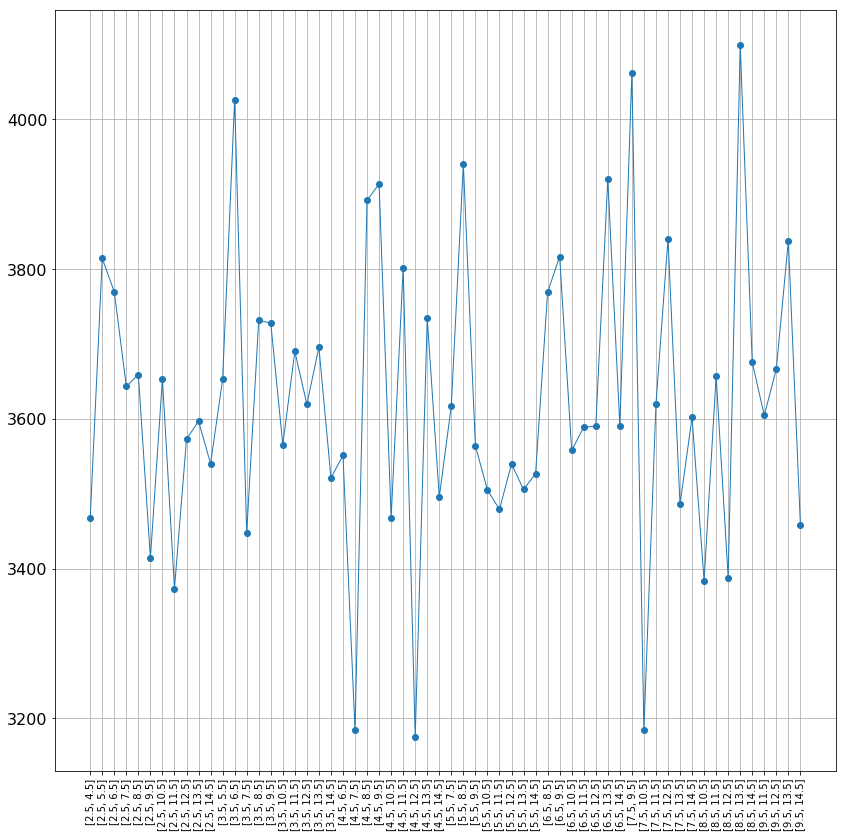

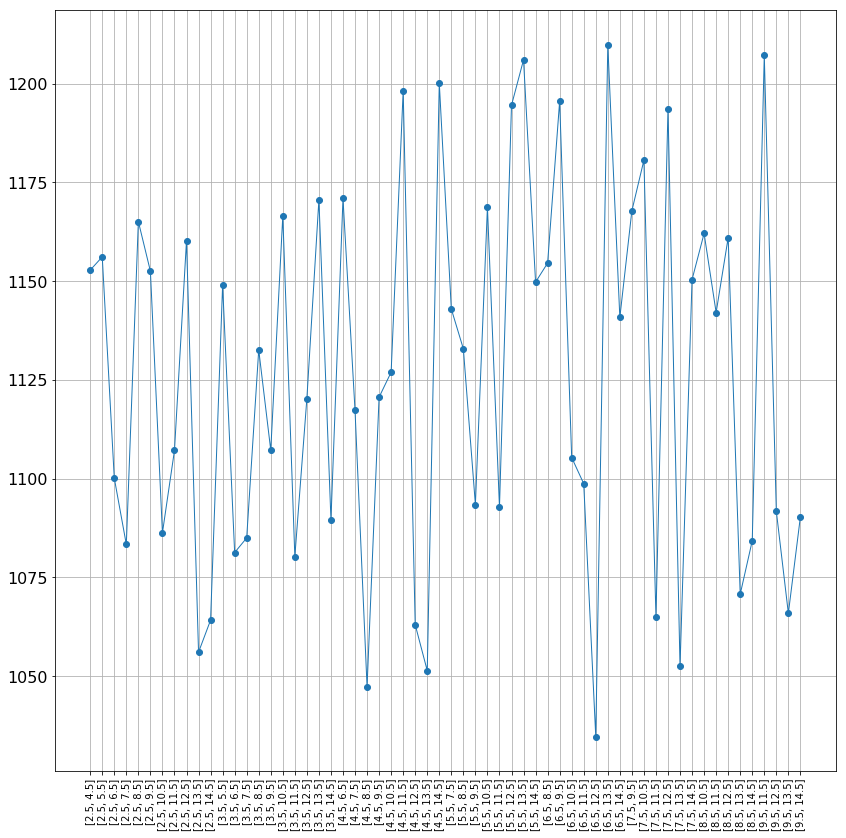

In [26]:

BBB = {}
ETA = {}
ICHS = {}
for eta in Bins['photonOneEta']:
    plt.figure(figsize=(14,14))
    etaS = str(eta)
    for i in BIAS.keys():    
        Bias = BIAS[i]
        if i == 0:
            BBB[etaS] = {}

        ETA[etaS] = []
        ICHS[etaS] = []
        for ichLow in Bias.keys():
            for ichHigh in Bias[ichLow].keys():
                tick ='['+str(ichLow)+', '+str(ichHigh)+']'

                if i == 0:
                    BBB[etaS][tick] = []

                ICHS[etaS].append(tick)

                BB = Bias[ichLow][ichHigh][etaS]['']#/(ichHigh-ichLow)**(1/100.0)
                ETA[etaS].append(BB)
                BBB[etaS][tick].append(BB)




    plt.plot(
            ICHS[etaS],
            ETA[etaS],
            marker = 'o',
            linewidth = 1,
            )
    ax = plt.gca()
    ax.set_xticklabels(ICHS[etaS],rotation=90,size=10);            

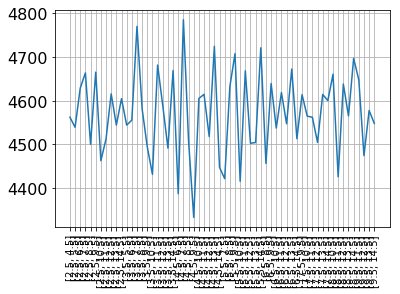

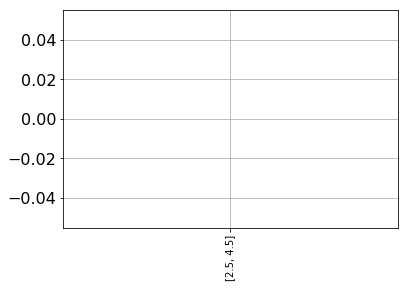

In [163]:


for eta in Bins['photonOneEta']:
    plt.figure()
    etaS = str(eta)
    
    bias = []
    
    for ichR in BBB[etaS].keys():
        bias.append(np.mean(BBB[etaS][ichR]))
    plt.plot(ICHS[etaS],
            bias,)
    ax = plt.gca()
    ax.set_xticklabels(ICHS[etaS],rotation=90,size=10);                

/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ValueError: supplied range of [inf, inf] is not finite

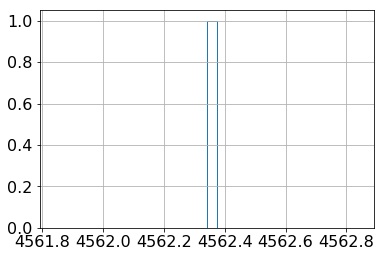

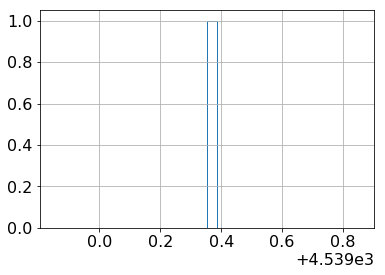

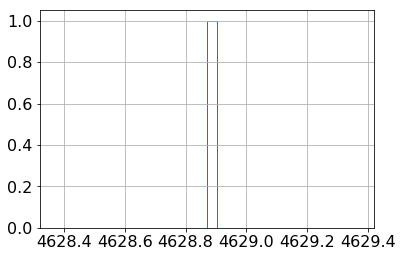

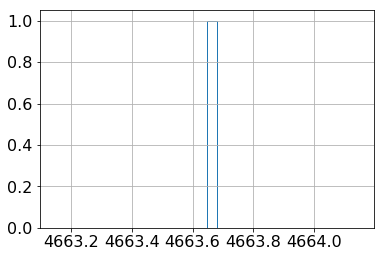

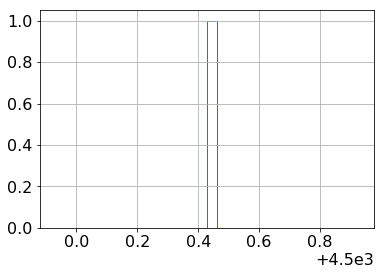

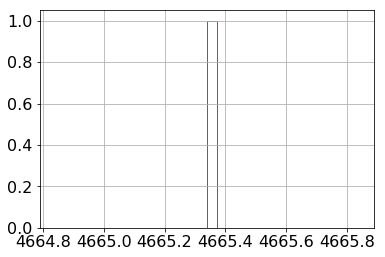

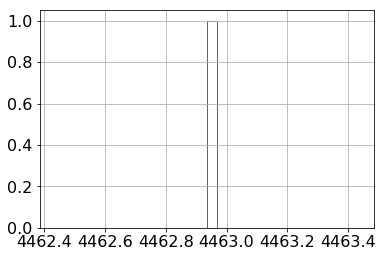

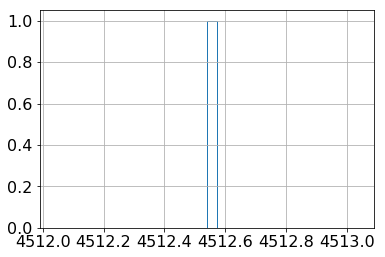

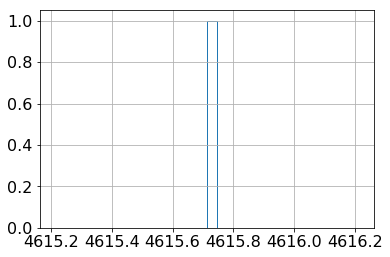

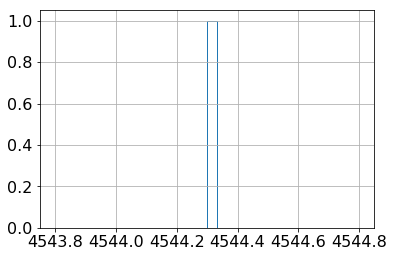

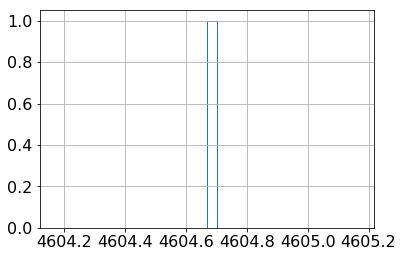

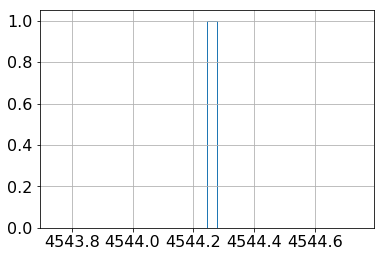

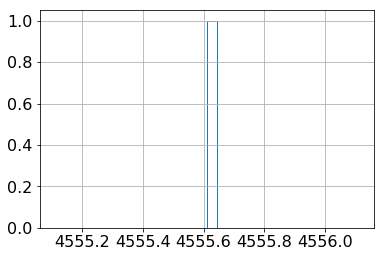

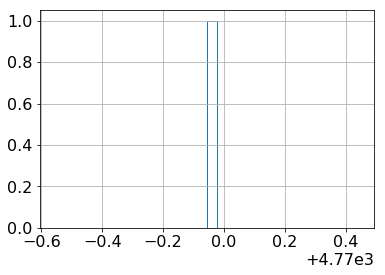

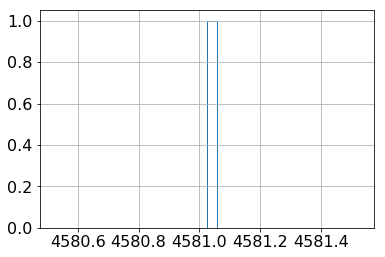

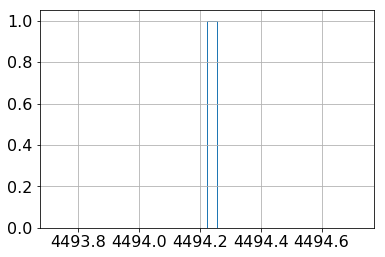

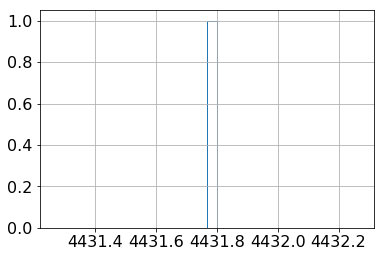

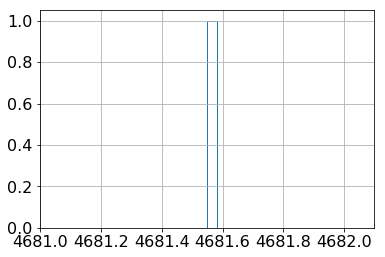

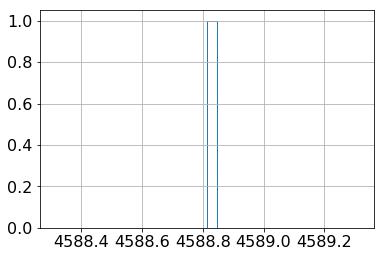

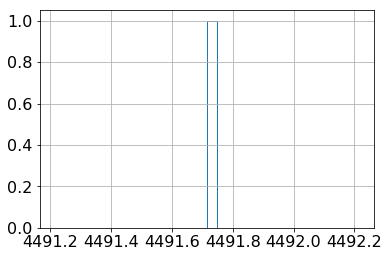

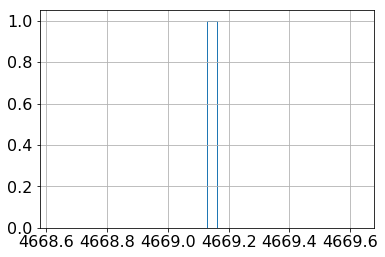

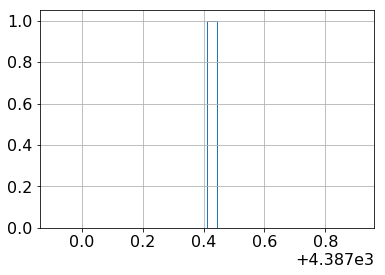

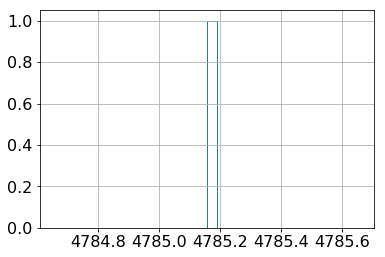

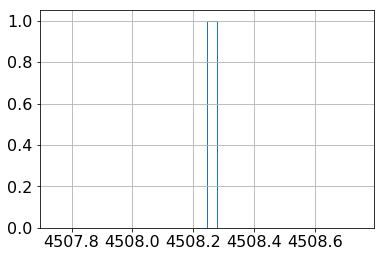

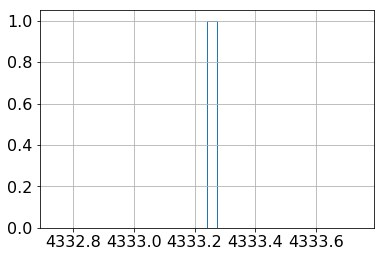

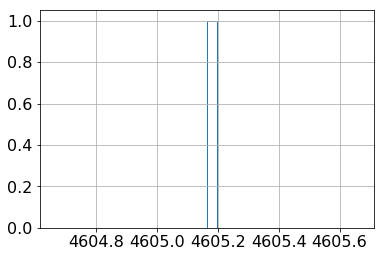

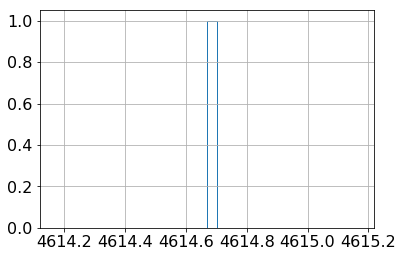

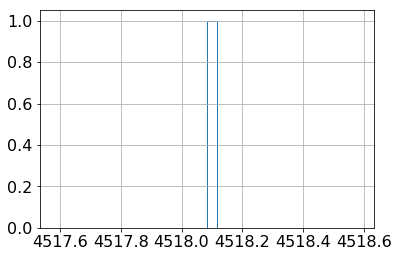

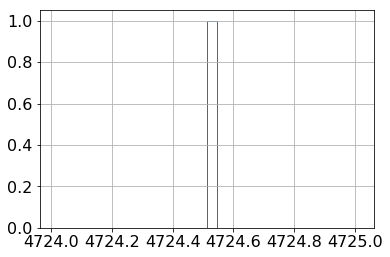

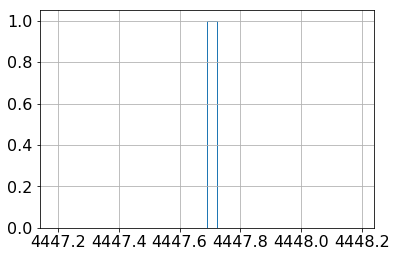

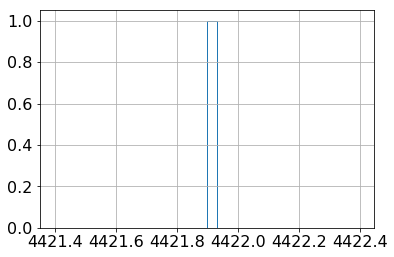

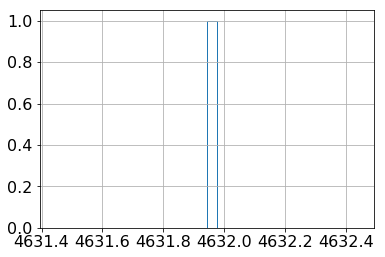

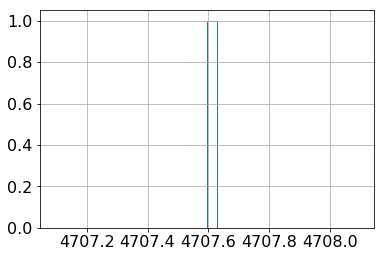

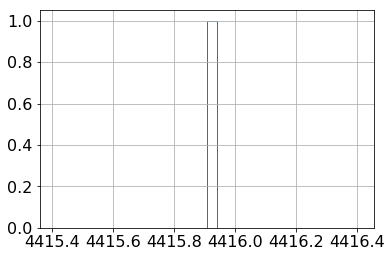

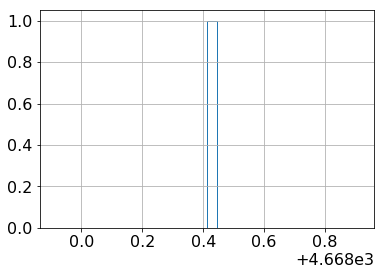

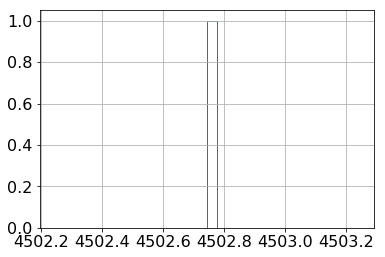

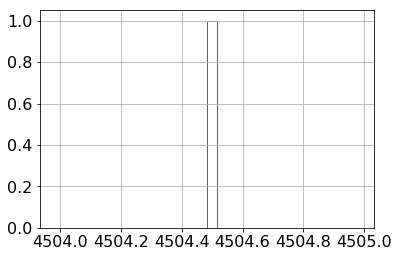

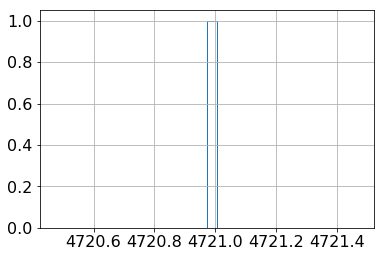

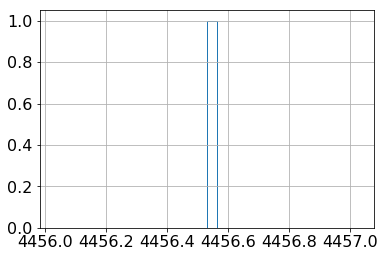

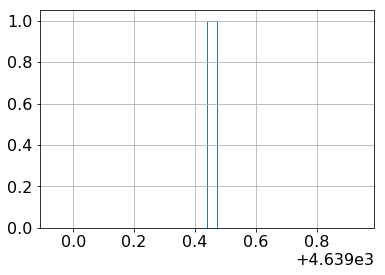

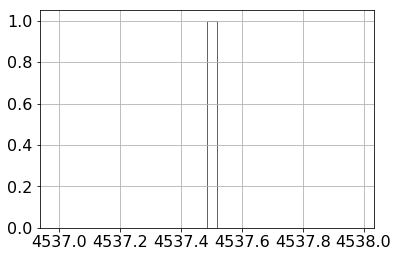

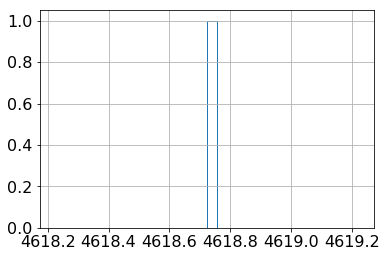

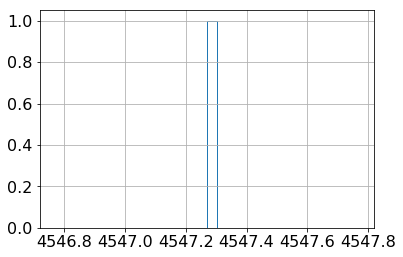

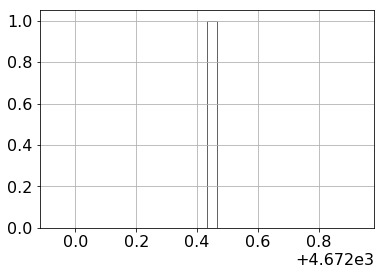

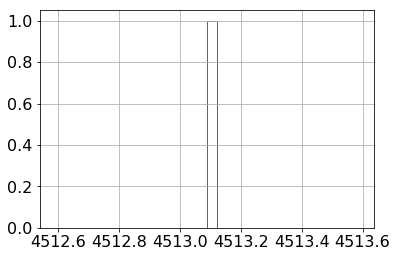

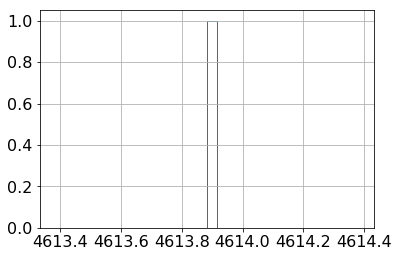

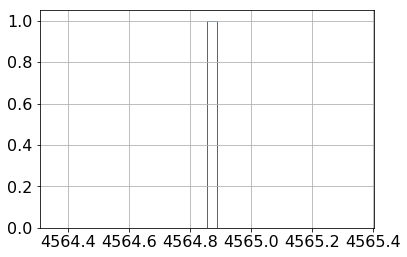

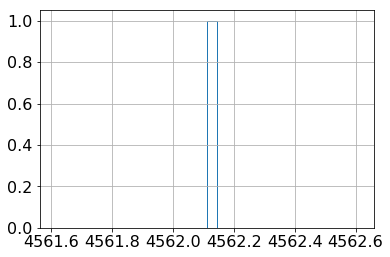

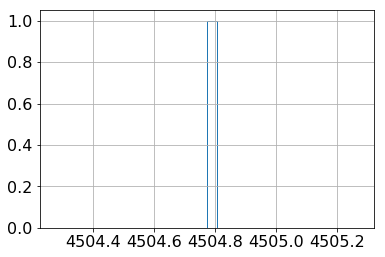

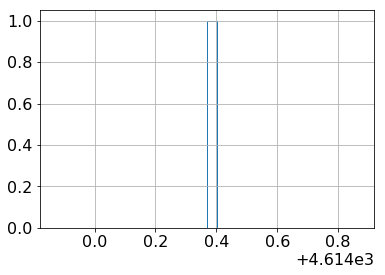

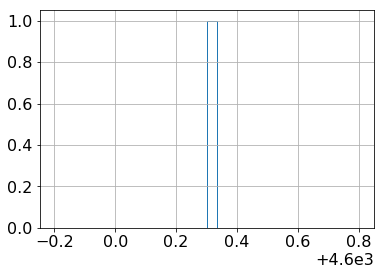

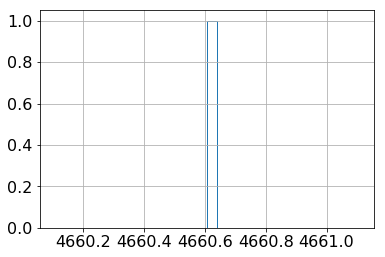

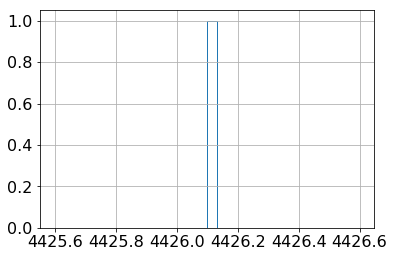

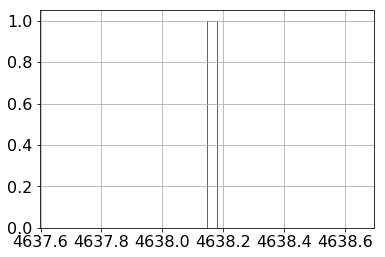

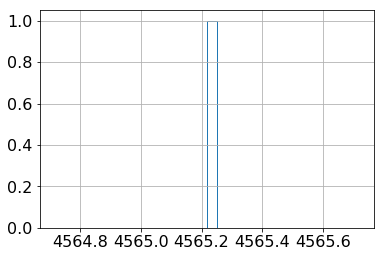

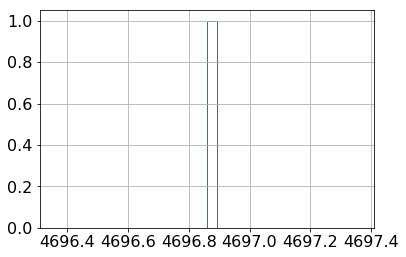

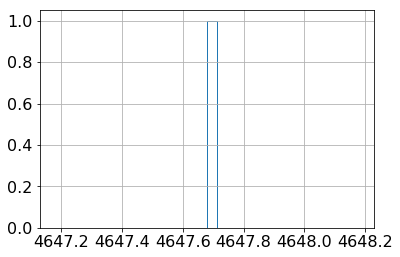

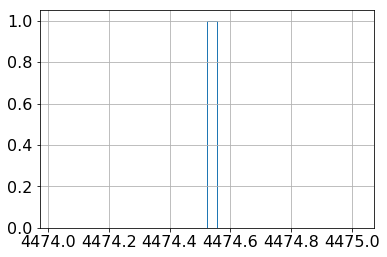

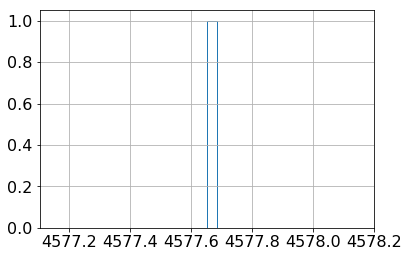

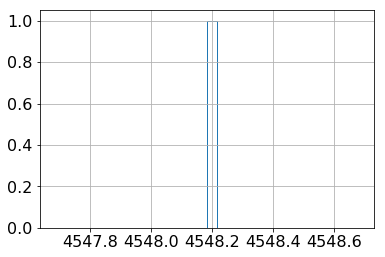

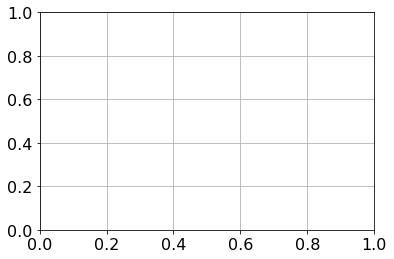

In [164]:
for eta in Bins['photonOneEta']:
    etaS = str(eta)
    
    bias = []
    
    for ichR in BBB[etaS].keys():
        plt.figure()
        
        plt.hist(BBB[etaS][ichR],
                bins = 30,
                histtype = 'step',
                )

In [113]:

log = False
#log = True

part = ''
var = 'ShowerShapeMVA_EB'

#Cutting = "EB"
Cutting = [' ']
######## CUTS ##############
for Region in ['Sig','Inv Sig']:
    Cut.PhaseSpace(
                data[Region],
                phType = phType,
                Charge = Charge,
                Region = Cutting,
                Print  = Print,
                MVA    = MVA,
                vetoDY = vetoDY,
              )

#for d in data['Sig']:
#    if not d.df.empty:
#        d.AddCuts(np.array(d.df.genPhotonIPFS) == True)
    
#for d in data['Sig']:
#    d.ResetCuts()

###########################################################

LL = Plotter.Plot(data            = data['Sig'],
                 var              = var,
                 part             = part,
                 signalInclude    = True,
                 stacked          = True,
                 density          = False,
                 log              = log,
                 weightCorrection = True,
                 Plotting         = True,
                 Blind            = True,
                 StatInclude      = False,
                 index            = 0,
                );


IndexError: index 0 is out of bounds for axis 0 with size 0

# IPFS cuts 

In [2]:
#Cutting = "EE"
#Cutting = "EB"
Cutting = ""

#Cut = 'IPFS'
######## CUTS ##############
for Region in ['Sig','Inv Sig']:
    Cut.PhaseSpace(
                data[Region],
                phType = phType,
                Charge = Charge,
                Region = Cutting,
                Print  = Print,
                MVA    = MVA,
                vetoDY = vetoDY,
              )


NameError: name 'Cut' is not defined

# Extracting Ich in sideband region using fit in the Signal Region, binned in Eta and Another variable

In [20]:
#step = 0.5
step = 2

ichBLow, ichBHigh  = [3,10.5], 15
    
######################################################################

part = ['']
var = ['']
ph  = ''

Bias, FIT, Samp = ProduceIchRangeFiles(data,part,var,ichBLow,ichBHigh,step)


---------  -----------
 Progress ---  0.0


/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Helper.py:1704: RuntimeWarning: invalid value encountered in true_divide
  return np.cumsum(dist/np.sum(dist))
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:131: RuntimeWarning: invalid value encountered in true_divide


 Progress ---  0.26666666666666666
 Progress ---  0.5333333333333333
 Progress ---  0.8


In [35]:
step = 5
ichBLow, ichBHigh  = [2.5,10.5], 15
    
######################################################################

part = ['photonOne']#,'leptonOne','leptonTwo','dilepton','llg']
var = ['Pt']
ph  = ''

Bias, FIT, Samp = ProduceIchRangeFiles(data,part,var,ichBLow,ichBHigh,step)


--------- photonOnePt -----------
 Progress ---  0.0


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:127: RuntimeWarning: invalid value encountered in true_divide


 NSig:  55563  Yield:  13437  Samp:  13437  R:  4.14
 NSig:  19824  Yield:  6778  Samp:  6778  R:  2.92
 NSig:  7191  Yield:  3534  Samp:  3534  R:  2.03
 NSig:  3759  Yield:  1772  Samp:  1772  R:  2.12
 NSig:  3277  Yield:  1610  Samp:  1610  R:  2.04
 NSig:  1887  Yield:  823  Samp:  823  R:  2.29
 NSig:  1338  Yield:  493  Samp:  493  R:  2.72
 NSig:  1074  Yield:  302  Samp:  302  R:  3.56
 NSig:  1063  Yield:  214  Samp:  214  R:  4.97
 NSig:  436  Yield:  128  Samp:  128  R:  3.41
 NSig:  259  Yield:  215  Samp:  215  R:  1.21
 NSig:  9296  Yield:  2903  Samp:  2903  R:  3.2
 NSig:  3859  Yield:  1708  Samp:  1708  R:  2.26
 NSig:  1946  Yield:  993  Samp:  993  R:  1.96
 NSig:  1404  Yield:  504  Samp:  504  R:  2.79
 NSig:  1049  Yield:  447  Samp:  447  R:  2.35
 NSig:  340  Yield:  249  Samp:  249  R:  1.37
 NSig:  0  Yield:  143  Samp:  143  R:  0.0
 NSig:  125  Yield:  101  Samp:  101  R:  1.24
 NSig:  549  Yield:  71  Samp:  71  R:  7.75
 NSig:  54  Yield:  52  Samp:  52 

In [152]:
        
step = 0.5
ichBLow, ichBHigh  = [2,10], 15
    
######################################################################

part = ['dilepton','llg']
var = ['M']
ph = ''

Bias, FIT, Samp = ProduceIchRangeFiles(data,part,var,ichBLow,ichBHigh,step)


--------- dileptonM -----------
 Progress ---  0.0


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:127: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:152: RuntimeWarning: divide by zero encountered in double_scalars


 Progress ---  0.0625
 Progress ---  0.125
 Progress ---  0.1875
 Progress ---  0.25
 Progress ---  0.3125
 Progress ---  0.375
 Progress ---  0.4375
 Progress ---  0.5
 Progress ---  0.5625
 Progress ---  0.625
 Progress ---  0.6875
 Progress ---  0.75
 Progress ---  0.8125
 Progress ---  0.875
 Progress ---  0.9375
--------- llgM -----------
 Progress ---  0.0


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


 Progress ---  0.0625
 Progress ---  0.125
 Progress ---  0.1875
 Progress ---  0.25
 Progress ---  0.3125
 Progress ---  0.375
 Progress ---  0.4375
 Progress ---  0.5
 Progress ---  0.5625
 Progress ---  0.625
 Progress ---  0.6875
 Progress ---  0.75
 Progress ---  0.8125
 Progress ---  0.875
 Progress ---  0.9375


In [153]:

        
step = 0.5
ichBLow, ichBHigh  = [2,10], 15
    
######################################################################

part = ['dilepton','l1Photon','l2Photon','dileptonPhoton']
var = ['DEta','DPhi','DR']

ph  = ''


Bias, FIT, Samp = ProduceIchRangeFiles(data,part,var,ichBLow,ichBHigh,step)


--------- dileptonDEta -----------
 Progress ---  0.0


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:127: RuntimeWarning: invalid value encountered in true_divide


 Progress ---  0.0625
 Progress ---  0.125


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:152: RuntimeWarning: divide by zero encountered in double_scalars


 Progress ---  0.1875
 Progress ---  0.25
 Progress ---  0.3125
 Progress ---  0.375
 Progress ---  0.4375
 Progress ---  0.5
 Progress ---  0.5625
 Progress ---  0.625
 Progress ---  0.6875
 Progress ---  0.75
 Progress ---  0.8125
 Progress ---  0.875
 Progress ---  0.9375
--------- dileptonDPhi -----------
 Progress ---  0.0
 Progress ---  0.0625
 Progress ---  0.125
 Progress ---  0.1875
 Progress ---  0.25
 Progress ---  0.3125
 Progress ---  0.375
 Progress ---  0.4375
 Progress ---  0.5
 Progress ---  0.5625
 Progress ---  0.625
 Progress ---  0.6875
 Progress ---  0.75
 Progress ---  0.8125
 Progress ---  0.875
 Progress ---  0.9375
--------- dileptonDR -----------
 Progress ---  0.0


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


 Progress ---  0.0625
 Progress ---  0.125
 Progress ---  0.1875
 Progress ---  0.25
 Progress ---  0.3125
 Progress ---  0.375
 Progress ---  0.4375
 Progress ---  0.5
 Progress ---  0.5625
 Progress ---  0.625
 Progress ---  0.6875
 Progress ---  0.75
 Progress ---  0.8125
 Progress ---  0.875
 Progress ---  0.9375
--------- l1PhotonDEta -----------
 Progress ---  0.0
 Progress ---  0.0625
 Progress ---  0.125
 Progress ---  0.1875
 Progress ---  0.25
 Progress ---  0.3125
 Progress ---  0.375
 Progress ---  0.4375
 Progress ---  0.5
 Progress ---  0.5625
 Progress ---  0.625
 Progress ---  0.6875
 Progress ---  0.75
 Progress ---  0.8125
 Progress ---  0.875
 Progress ---  0.9375
--------- l1PhotonDPhi -----------
 Progress ---  0.0
 Progress ---  0.0625
 Progress ---  0.125
 Progress ---  0.1875
 Progress ---  0.25
 Progress ---  0.3125
 Progress ---  0.375
 Progress ---  0.4375
 Progress ---  0.5
 Progress ---  0.5625
 Progress ---  0.625
 Progress ---  0.6875
 Progress ---  0.75


# Look into Bias

In [21]:
etaS  = '[0, 1.4666]'
var1S = '[15, 20]'

#print(M[etaS][var1S])
plt.figure(figsize=(12,12))
plt.bar(tick,M[etaS][var1S])
ax = plt.gca()
ax.set_xticklabels(tick,rotation=90,size=10);
plt.tight_layout()

NameError: name 'tick' is not defined

<Figure size 864x864 with 0 Axes>

In [32]:
for etaS in list(h['Sig']['ZGToLLG'].keys()):    
    plt.figure(figsize = (20,len(list(OptBiasRanges['[0, 1.4666]'].keys()))))
    
    print(etaS)
    for ptS, j in zip(list(h['Sig']['ZGToLLG'][etaS].keys()), range(len(Bins[part+var+ph]))):
        plt.subplot(np.ceil(len(list(OptBiasRanges['[0, 1.4666]'].keys()))/4.0),4,j+1)
        
        #####################################
        DYJets.ResetCuts()
        Ich = DYJets.GetWithCuts('photonOneIch')   
        DYJets.AddCuts(np.logical_and(Ich > OptBiasRanges[etaS][ptS][0], Ich < OptBiasRange[etaS][ptS][1]))
        h[Region]['DYJets'],Bins = FindRegionInSideband(DYJets,part=part,var=var,ph=ph)

        ######################################

        SamplingZG = Sampling(
                             h['Sig']['ZGToLLG'][etaS][ptS],
                             Yield['ZGToLLG'][etaS][ptS]
                            )
        SampTemplate = SamplingZG/np.sum(SamplingZG)

        Temp = lambda NSig: NSig*np.array(SampTemplate) + Yield['DYJets'][etaS][ptS]*np.array(Template['DYJets'][etaS][ptS])


        ####################################################################

        x = np.array(h['Sig']['DoubleMuon_2017'][etaS][ptS][1])
        xc = (x[:-1] + x[1:])/2
        bins = np.arange(-1,1.1,step=0.1)

        
        plt.plot(
                xc,h['Sig']['DoubleMuon_2017'][etaS][ptS][0],
                color     = 'k',
                linewidth = 0,
                marker    = 'o',
                label     = 'Data',
                )


        plt.hist(
                    xc,
                    bins      = bins,
                    weights   = Temp(FIT[ichLow][ichHigh][etaS][ptS][0]),
                    color     = 'b',
                    histtype  = 'step',
                    linewidth = 1.5,
                    label     = 'Template',
                    )

        plt.hist(
                    xc,
                    bins      = bins,
                    weights   = FIT[ichLow][ichHigh][etaS][ptS][0]*np.array(SampTemplate),
                    color     = 'r',
                    histtype  = 'step',
                    linewidth = 1.5,
                    label     = 'Signal',
                    )

        plt.hist(
                    xc,
                    bins      = bins,
                    weights = Yield['DYJets'][etaS][ptS]*np.array(Template['DYJets'][etaS][ptS]),
                    color     = 'g',
                    histtype  = 'step',
                    linewidth = 1.5,
                    label     = 'Bkg',
                    )            
        plt.legend()

        ax = plt.gca()
        #ax.set_yscale('log')
    plt.tight_layout()





[-2.5, -1.4666]


TypeError: can only concatenate list (not "str") to list

<Figure size 1440x504 with 0 Axes>

# Extracting Ich region on the entire phase space

In [27]:

def BinningMVA(
                data,
                 part = 'photonOne',
                 var  = 'Pt',
                 ph   = '',
                ):
    Bins,Ind = {},{}
    
    variable = part+var+ph
    ##########################################################
    
    ranges, bins = Help.GET_RangeBins(part='photonOne',var='Eta',ph='',Blind    = True,Plotting = True)
        
    Bins['photonOneEta'] = Help.BinFormat(Bins = bins,ranges = ranges, Type='ranges')
    Ind['photonOneEta']  = Help.IndicesInBin(data,'photonOneEta',Bins['photonOneEta'])
    
    ##########################################################
    if var != "":
        ranges, bins = Help.GET_RangeBins(part,var,ph,Blind    = True,Plotting = True, )

        Bins[variable] = Help.BinFormat(Bins = bins,ranges = ranges, Type='ranges')
        Ind[variable]  = Help.IndicesInBin(data,variable,Bins[variable])
    
    ##########################################################
    
    
    hist = {}
    phType = ['EE','EB','EB','EE']
    for eta,i in zip(Ind['photonOneEta'],range(len(Bins['photonOneEta']))):
        etai = Bins['photonOneEta'][i]
        hist[str(etai)] = {}
        MVA = data.GetWithCuts('ShowerShapeMVA_'+phType[i])
        WEI = data.GetWithCuts('weights')

        if var == '':
            hist[str(etai)] = np.histogram(
                                            MVA[eta],
                                            bins    = np.arange(-1,1.1,step=0.1),
                                            weights = WEI[eta],
                                            )
        else:
            for varInd,varj in zip(Ind[variable],Bins[variable]):
                hist[str(etai)][str(varj)] = np.histogram(MVA[np.logical_and(eta,varInd)],
                                                         bins    = np.arange(-1,1.1,step=0.1),
                                                         weights = WEI[np.logical_and(eta,varInd)],
                                                        )
    return hist,Bins

In [29]:
#part, var, ph = 'photonOne','Pt',''
#part, var, ph = 'dilepton','M',''
part, var, ph = '','',''

h = {}
h['Sig'] = {}
h['Inv Sig'] = {}

Yield    = {}
Template = {}

Yield   ['ZGToLLG'] = {}
Yield   ['DYJets']  = {}
Template['ZGToLLG'] = {}
Template['DYJets']  = {}

step = 1
ichBLow  = [2,10]
ichBHigh = 15
##########

Plot = False

###########
Region = 'Sig'

for i in range(len(data[Region])):
    data[Region][i].ResetCuts()
    h[Region][data[Region][i].name],Bins = BinningMVA(data[Region][i],part=part,var=var,ph=ph)

############

Region = 'Inv Sig'

DYJets = np.array(data[Region])[Names=='DYJets'][0]

for i in range(len(data[Region])):
    data[Region][i].ResetCuts()
    h[Region][data[Region][i].name],Bins = BinningMVA(data[Region][i],part=part,var=var,ph=ph)

############

Ich = DYJets.GetWithCuts('photonOneIch')        

#OptBias = []
#bias = [1e8,[ichBLow[0],ichBLow[0]+1]]
Bias = {}
FIT = {}

############
for ichLow in np.arange(ichBLow[0],ichBLow[1], step=step):
    Percent = int((ichLow- ichBLow[0])/(ichBLow[1]-ichBLow[0]))
    
    if Percent%10 == 0:
        print( ' Progress --- ', Percent)
    
    Bias[ichLow] = {}
    FIT[ichLow] = {}

    #if ichLow != 6: continue
        
    for ichHigh in np.arange(ichLow+1,ichBHigh, step=step):
        
        #if ichHigh != 13: continue
        
        Bias[ichLow][ichHigh] = {}
        FIT[ichLow][ichHigh] = {}
        
        DYJets.ResetCuts()
        DYJets.AddCuts(np.logical_and(Ich > ichLow, Ich < ichBHigh))
        h[Region]['DYJets'],Bins = BinningMVA(DYJets,part=part,var=var,ph=ph)

        
        for eta in Bins['photonOneEta']:
            etaS = str(eta)
            
            #####################
            Bias[ichLow][ichHigh][etaS] = {}
            FIT[ichLow][ichHigh][etaS] = {}
            
            Yield   ['ZGToLLG'][etaS] = {}
            Yield   ['DYJets'] [etaS]  = {}
            Template['ZGToLLG'][etaS] = {}
            Template['DYJets'] [etaS]  = {}
            #####################
            
            T = h['Sig']['ZGToLLG'][etaS][0]
            Yield   ['ZGToLLG'][etaS] = int(np.sum(T))
            if np.sum(T) == 0:
                Template['ZGToLLG'][etaS] = T
            else:
                Template['ZGToLLG'][etaS] = T/Yield['ZGToLLG'][etaS]
            #####################
            Yield   ['DYJets'][etaS] = int(np.sum(h['Sig']['DoubleMuon_2017'][etaS][0] - T))


            T = h['Inv Sig']['DYJets'][etaS][0]
            if np.sum(T) == 0:
                Template['DYJets'][etaS] = T
            else:
                Template['DYJets'][etaS] = T/np.sum(T)
            ##############################################

            SamplingZG = Help.Sampling(
                                 h['Sig']['ZGToLLG'][etaS],
                                 Yield['ZGToLLG'][etaS]
                                )
            SampTemplate = SamplingZG/np.sum(SamplingZG)

            Temp = lambda NSig: NSig*np.array(SampTemplate) + Yield['DYJets'][etaS]*np.array(Template['DYJets'][etaS])

            ###########
            #FITTING
            fit = Fit(data = h['Sig']['DoubleMuon_2017'][etaS][0],
                      Yield = Temp
                     )

            NSigYield = fit.values[0]
            NSigSigma = fit.errors[0]
            ###########
            Bias[ichLow][ichHigh][etaS]  = np.abs(Yield['ZGToLLG'][etaS] - NSigYield)/NSigSigma
            FIT[ichLow][ichHigh][etaS] = [NSigYield,NSigSigma]
                
                
                    
                    

 Progress ---  0
 Progress ---  0
 Progress ---  0
 Progress ---  0
 Progress ---  0
 Progress ---  0
 Progress ---  0
 Progress ---  0


In [30]:
M = {}
OptInd = {}
for eta in list(h['Sig']['ZGToLLG'].keys()):    
    M[eta] = []
    for ichLow in np.arange(ichBLow[0],ichBLow[1], step=step):  
        for ichHigh in np.arange(ichLow+1,ichBHigh, step=step):
            M[eta].append(Bias[ichLow][ichHigh][eta])
    OptInd[eta] =  np.argmin(M[eta])


OptBiasRange = {}
for eta in list(h['Sig']['ZGToLLG'].keys()):    
    OptBiasRange[eta] = {}
    count = 0
    for ichLow in np.arange(ichBLow[0],ichBLow[1], step=step):
        for ichHigh in np.arange(ichLow+1,ichBHigh, step=step):
            if count == OptInd[eta]:
                #print(ichLow,ichHigh)
                OptBiasRange[eta] = [ichLow,ichHigh]
            count += 1


[0, 1.4442]
[1.5666, 2.5]


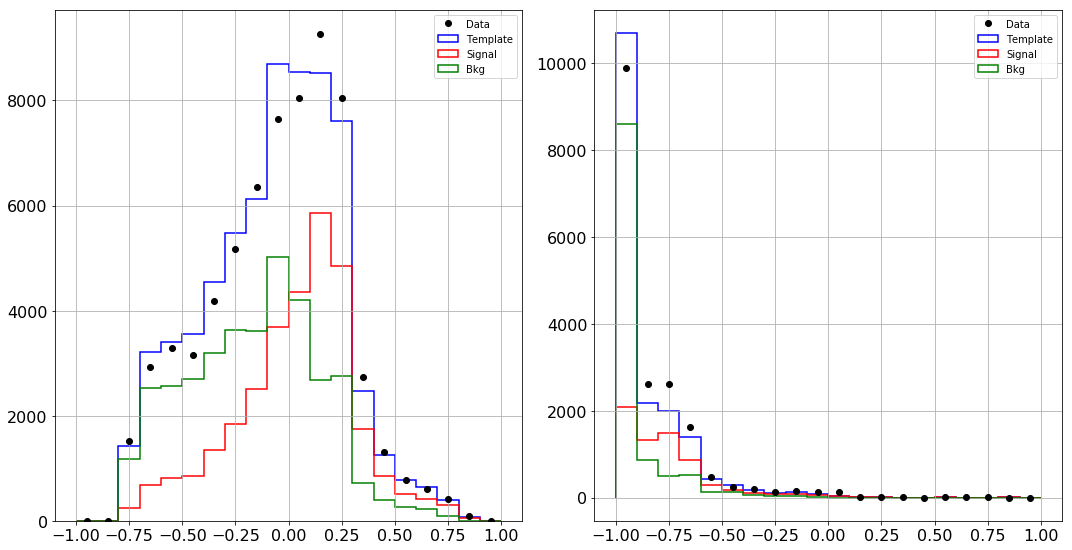

In [32]:
plt.figure(figsize = (15,15))
    
for etaS,j in zip(list(h['Sig']['ZGToLLG'].keys()),range(len(list(h['Sig']['ZGToLLG'].keys())))):    
    
    print(etaS)
    plt.subplot(2,2,j+1)

    #####################################
    DYJets.ResetCuts()
    Ich = DYJets.GetWithCuts('photonOneIch')   
    DYJets.AddCuts(np.logical_and(Ich > OptBiasRange[etaS][0], Ich < OptBiasRange[etaS][1]))
    h[Region]['DYJets'],Bins = BinningMVA(DYJets,part=part,var=var,ph=ph)

    ######################################

    SamplingZG = Help.Sampling(
                         h['Sig']['ZGToLLG'][etaS],
                         Yield['ZGToLLG'][etaS],
                        )
    SampTemplate = SamplingZG/np.sum(SamplingZG)

    Temp = lambda NSig: NSig*np.array(SampTemplate) + Yield['DYJets'][etaS]*np.array(Template['DYJets'][etaS])


    ####################################################################

    x = np.array(h['Sig']['DoubleMuon_2017'][etaS][1])
    xc = (x[:-1] + x[1:])/2
    bins = np.arange(-1,1.1,step=0.1)


    plt.plot(
            xc,h['Sig']['DoubleMuon_2017'][etaS][0],
            color     = 'k',
            linewidth = 0,
            marker    = 'o',
            label     = 'Data',
            )


    plt.hist(
                xc,
                bins      = bins,
                weights   = Temp(FIT[ichLow][ichHigh][etaS][0]),
                color     = 'b',
                histtype  = 'step',
                linewidth = 1.5,
                label     = 'Template',
                )

    plt.hist(
                xc,
                bins      = bins,
                weights   = FIT[ichLow][ichHigh][etaS][0]*np.array(SampTemplate),
                color     = 'r',
                histtype  = 'step',
                linewidth = 1.5,
                label     = 'Signal',
                )

    plt.hist(
                xc,
                bins      = bins,
                weights = Yield['DYJets'][etaS]*np.array(Template['DYJets'][etaS]),
                color     = 'g',
                histtype  = 'step',
                linewidth = 1.5,
                label     = 'Bkg',
                )            
    plt.legend()

    ax = plt.gca()
    #ax.set_yscale('log')
plt.tight_layout()





In [33]:
OptBiasRange

{'[0, 1.4442]': [6, 7], '[1.5666, 2.5]': [7, 8]}

In [34]:
Bias[2][10]

{'[0, 1.4442]': 499.7130588780162, '[1.5666, 2.5]': 507.8553645702042}

In [45]:
for region in data.keys():
    for d in data[region]:
        if "DoubleMuon" in d.name or "DoubleEG" in d.name:
            d.name = "Data"
        elif "WW" in d.name or "ZZ" in d.name or "WZ" in d.name:
            d.name = "V V"
        elif "TT" in d.name:
            d.name = "TT"
        
        
PromptNames = ['WJets', 'V V', 'TT', 'ZGToLLG']    
Names = np.array([d.name for d in data[Region]])



for region in data.keys():
    Ds, legend, colors, dataFlag = Help.SetDataOpt(data[region],selection = selection,exclude = [''])

Plotter.SetPlotOpt(legend=legend,colors = colors)


0 WJets cornflowerblue
1 V V lightskyblue
2 TT lightcoral
3 DYJets plum
4 ZGToLLG pink
5 Data k
0 WJets cornflowerblue
1 V V lightskyblue
2 TT lightcoral
3 DYJets plum
4 ZGToLLG pink
5 Data k
0 WJets cornflowerblue
1 V V lightskyblue
2 TT lightcoral
3 DYJets plum
4 ZGToLLG pink
5 Data k


In [46]:
Region = 'Sig'
#Cut = "EB"
Cutting = "EE"
#Cut = ""
######## CUTS ##############
Cut.PhaseSpace(
            data[Region],
            phType = phType,
            Charge = Charge,
            Region = Cutting,
            Print  = Print,
            MVA    = MVA,
            vetoDY = vetoDY,
          )


----------------ShowerShapeMVA_EE----------------


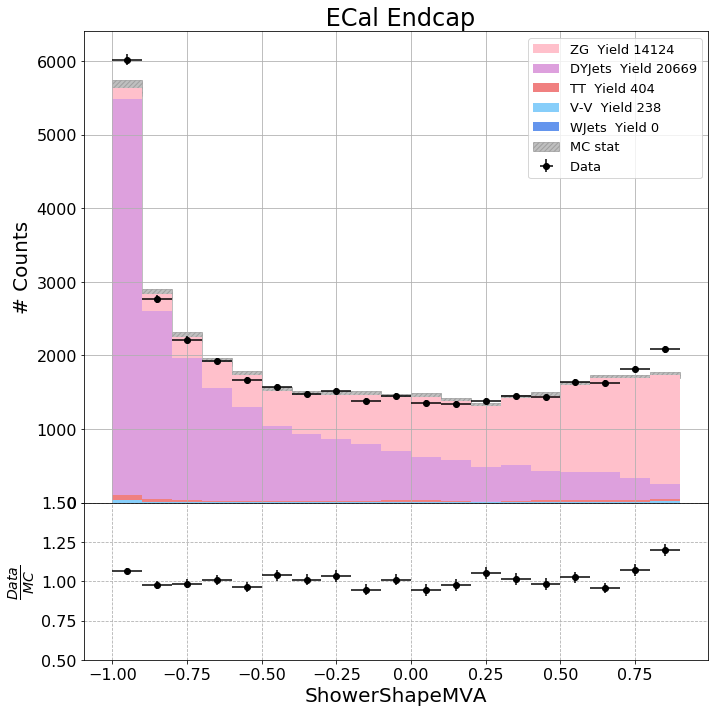

In [47]:
Region = 'Sig'
#Region = 'Inv Sig'
#Region = 'C'

log = False
#log = True

var = ['ShowerShapeMVA_'+Cutting]
for v in var:
    print('----------------'+str(v)+'----------------')
    Plotter.Plot(   data             = data[Region],
                    var              = v,
                    part             = '',
                    signalInclude    = True,
                    stacked          = stacked,
                    density          = density,
                    log              = log,
                    weightCorrection = weightCorrection,
                    Blind            = Blind,
                    Plotting         = Plotting,
                    StatInclude      = StatInclude,
                    index            = 0, 
                )

# TEST

----------------nPV----------------


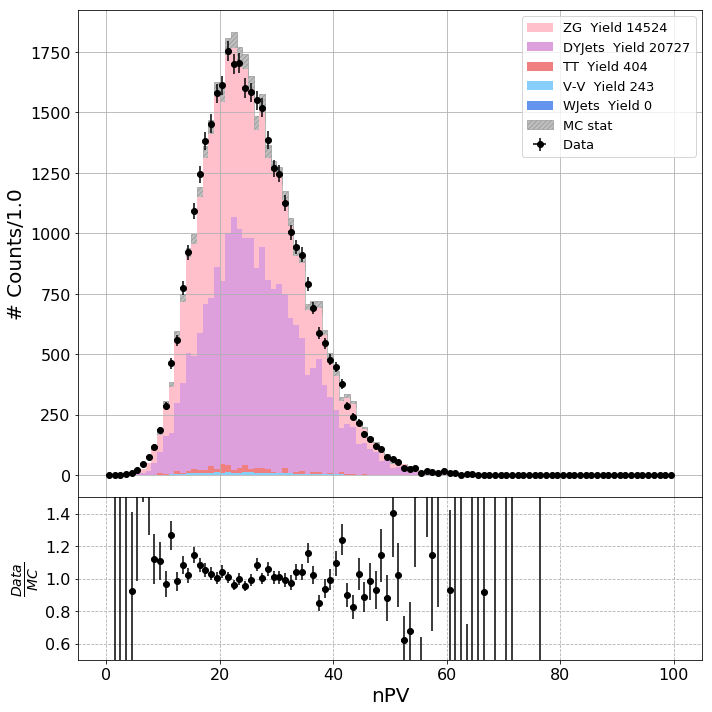

----------------nPhotons----------------


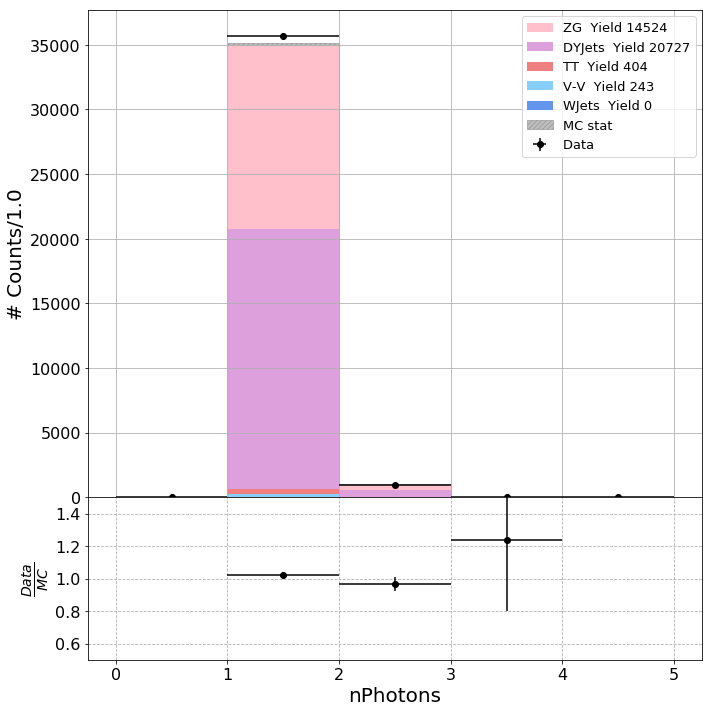

----------------met----------------


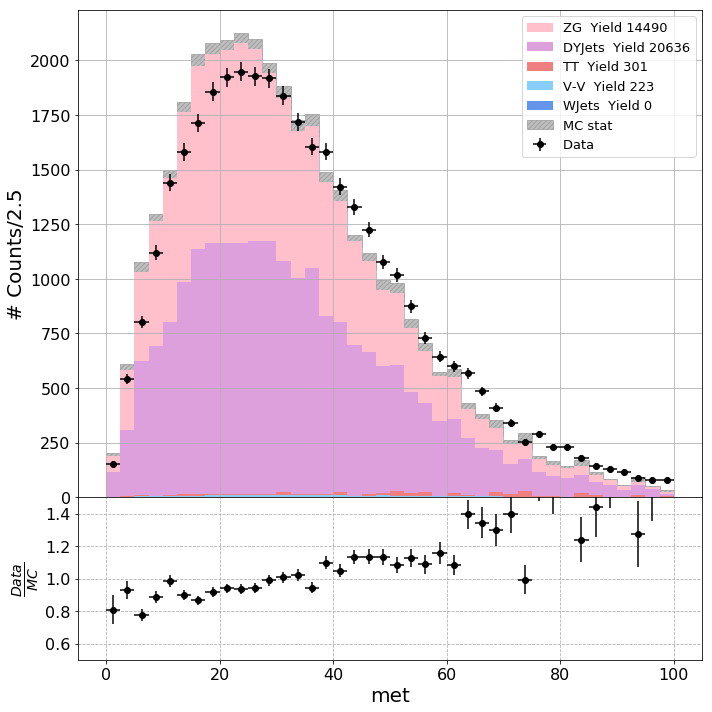

"\nvar = ['Eta']\npart = ['photonOne']\nfor p in part:\n    for v in var:\n        print('----------------'+str(v)+'----------------')\n        Plotter.Plot(\n                    data[Region],\n                    var              = v,\n                    part             = p,\n                    signalInclude    = True,\n                    stacked          = stacked,\n                    density          = density,\n                    log              = log,\n                    weightCorrection = weightCorrection,\n                    Blind            = Blind,\n                    Plotting         = Plotting,\n                    StatInclude      = StatInclude, \n                    )\n\n"

In [50]:
log = False
#log = True

###############################
var = ['nPV','nPhotons','met']
for v in var:
    print('----------------'+str(v)+'----------------')
    Plotter.Plot(
                data[Region],
                var              = v,
                part             = '',
                signalInclude    = True,
                stacked          = stacked,
                density          = density,
                log              = log,
                weightCorrection = weightCorrection,
                Blind            = Blind,
                Plotting         = Plotting,
                StatInclude      = StatInclude,
                )
'''
var = ['Eta']
part = ['photonOne']
for p in part:
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot(
                    data[Region],
                    var              = v,
                    part             = p,
                    signalInclude    = True,
                    stacked          = stacked,
                    density          = density,
                    log              = log,
                    weightCorrection = weightCorrection,
                    Blind            = Blind,
                    Plotting         = Plotting,
                    StatInclude      = StatInclude, 
                    )

'''

----------------M----------------


/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Plotter.py:832: RuntimeWarning: invalid value encountered in sqrt
  errDataMC = Data[1]/h*np.sqrt(1/Data[1]+1/h)


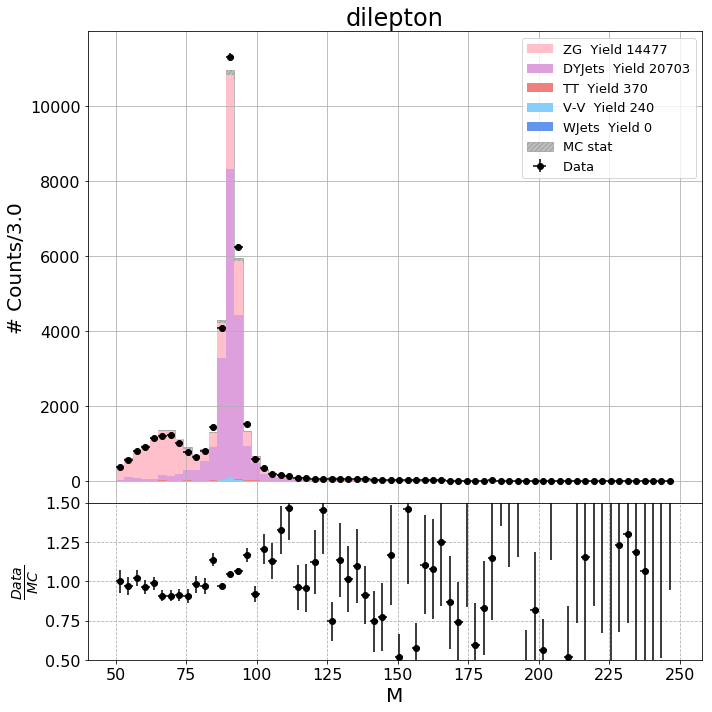

----------------M----------------


/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Plotter.py:169: RuntimeWarning: invalid value encountered in less
  Yield.append(np.sum(wei[i][np.array(data[i].GetWithCuts(part+var+ph)) < bins[-1] ]))
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Helper.py:1442: RuntimeWarning: invalid value encountered in greater
  Ind = np.logical_and(data[i].GetWithCuts(variable) > bins[j], data[i].GetWithCuts(variable) <= bins[j+1])
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Helper.py:1442: RuntimeWarning: invalid value encountered in less_equal
  Ind = np.logical_and(data[i].GetWithCuts(variable) > bins[j], data[i].GetWithCuts(variable) <= bins[j+1])


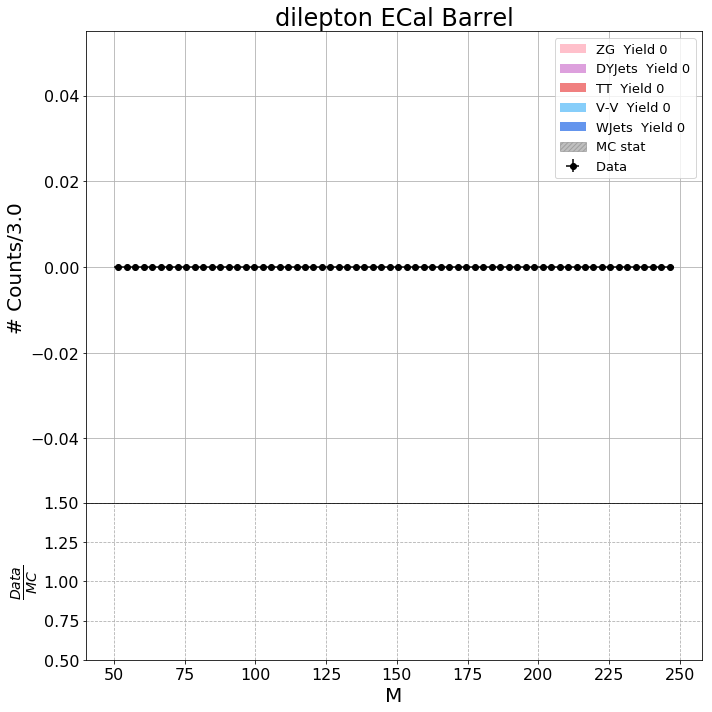

----------------M----------------


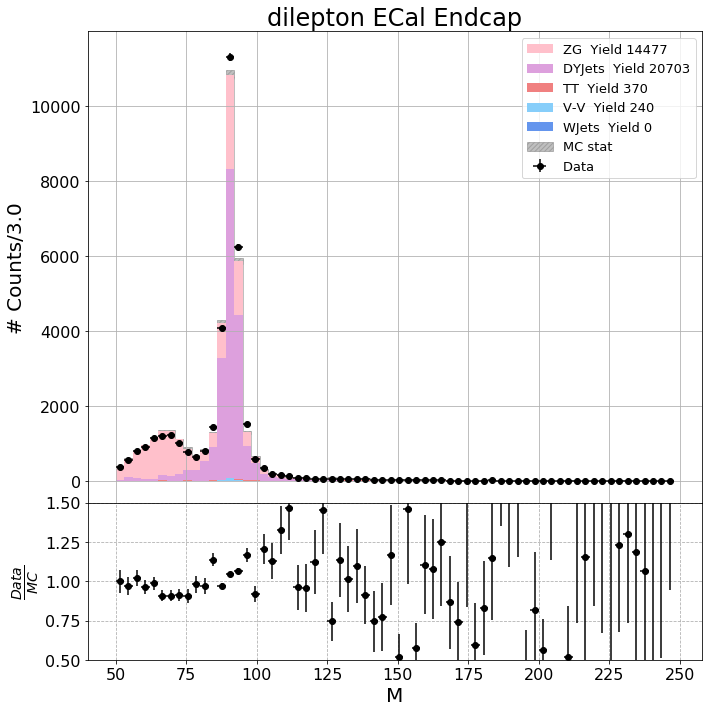

----------------M----------------


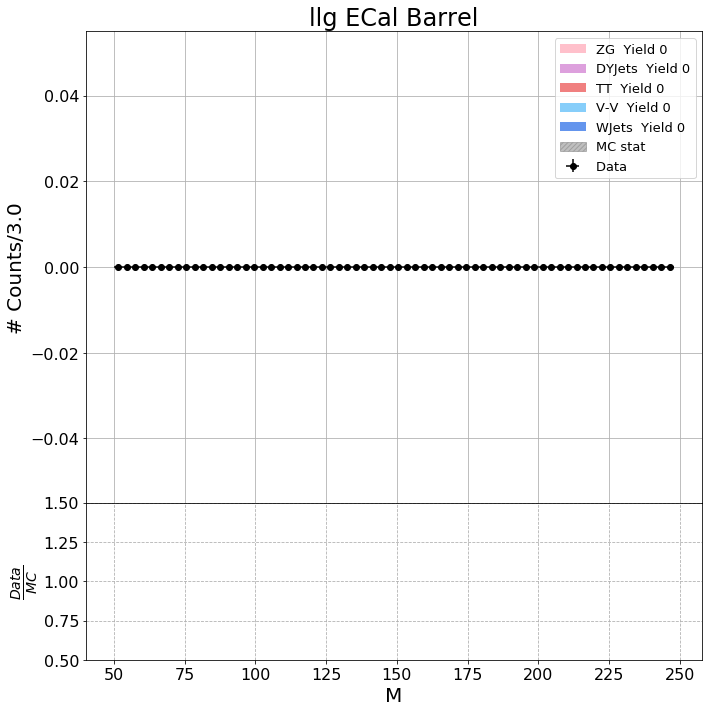

----------------M----------------


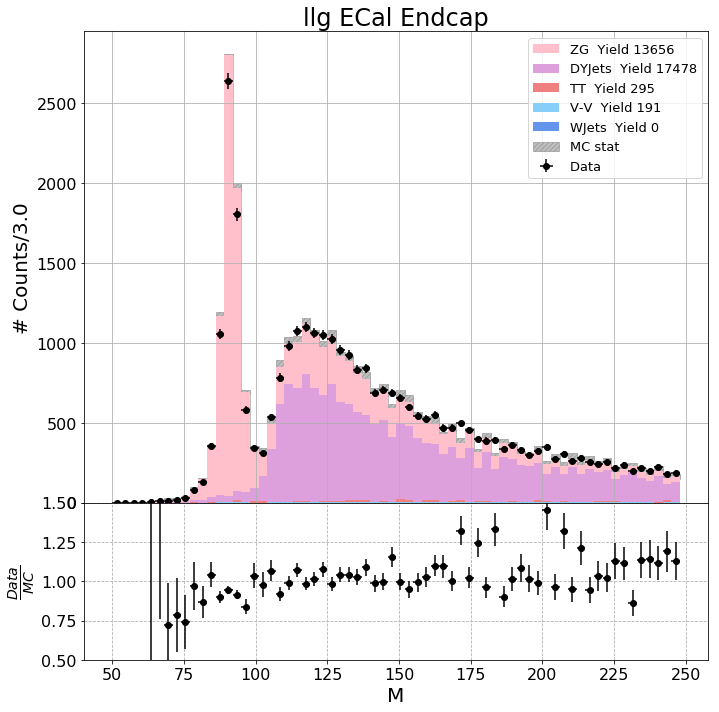

In [51]:
var = ['M']
part = ['dilepton','dilepton_EB','dilepton_EE','llg_EB','llg_EE']
for p in part:
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot(
                    data[Region],
                    var              = v,
                    part             = p,
                    signalInclude    = True,
                    stacked          = stacked,
                    density          = density,
                    log              = log,
                    weightCorrection = weightCorrection,
                    Blind            = Blind,
                    Plotting         = Plotting,
                    StatInclude      = StatInclude,
                    )   

----------------Pt----------------


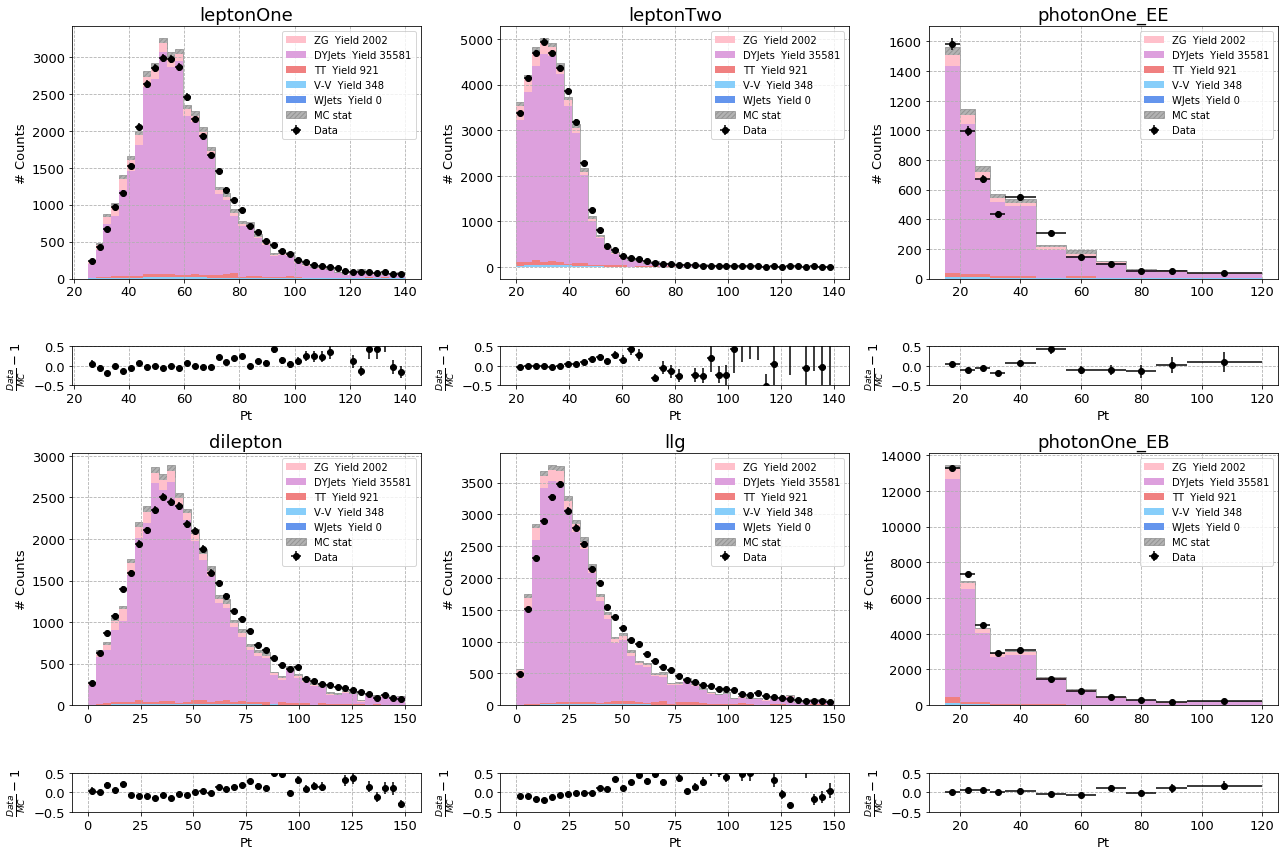

----------------M----------------


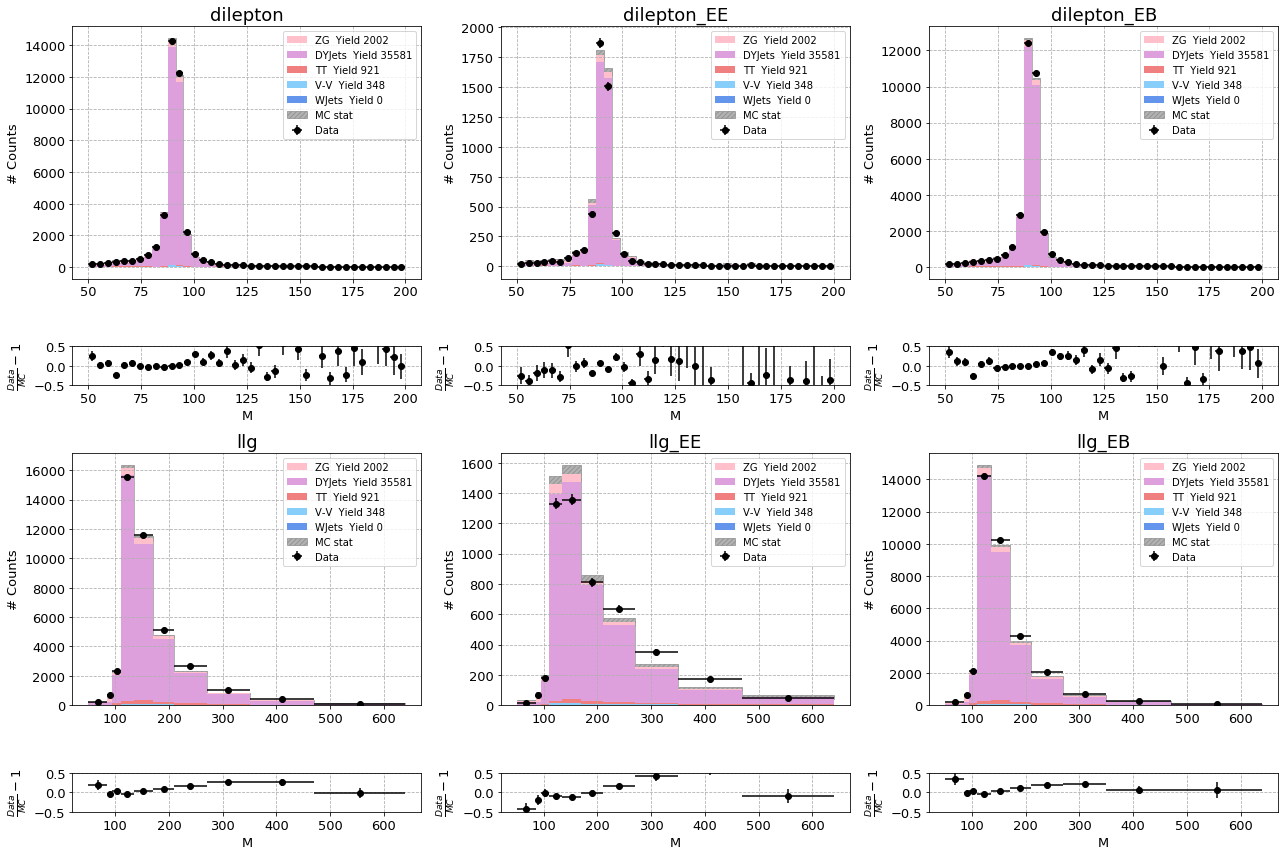

In [20]:
var = ['Pt']
part = ['leptonOne','leptonTwo','photonOne_EE','dilepton','llg','photonOne_EB']

for v in var:
    print('----------------'+str(v)+'----------------')
    Plotter.Plot_Mult(
                      data[Region],
                      var              = v,
                      part             = part,
                      signalInclude    = True,
                      figDim           = [2,3],
                      customRange      = customRange,
                      stacked          = stacked,
                      density          = density,
                      log              = log,
                      weightCorrection = weightCorrection,
                      Blind            = Blind,
                      #Blind            = False,
                      Plotting         = Plotting,
                      StatInclude      = StatInclude,
                     )

var = ['M']    
part = ['dilepton','dilepton_EE','dilepton_EB','llg','llg_EE','llg_EB']
for v in var:
    print('----------------'+str(v)+'----------------')
    Plotter.Plot_Mult(
                      data[Region],        
                      var              = v,
                      part             = part,
                      signalInclude    = True,
                      figDim           = [2,3],
                      customRange      = customRange,
                      stacked          = stacked,
                      density          = density,
                      log              = log,
                      weightCorrection = weightCorrection,
                      Blind            = Blind,              
                      Plotting         = Plotting,
                      StatInclude      = StatInclude,
                     ) 

----------------Ich----------------


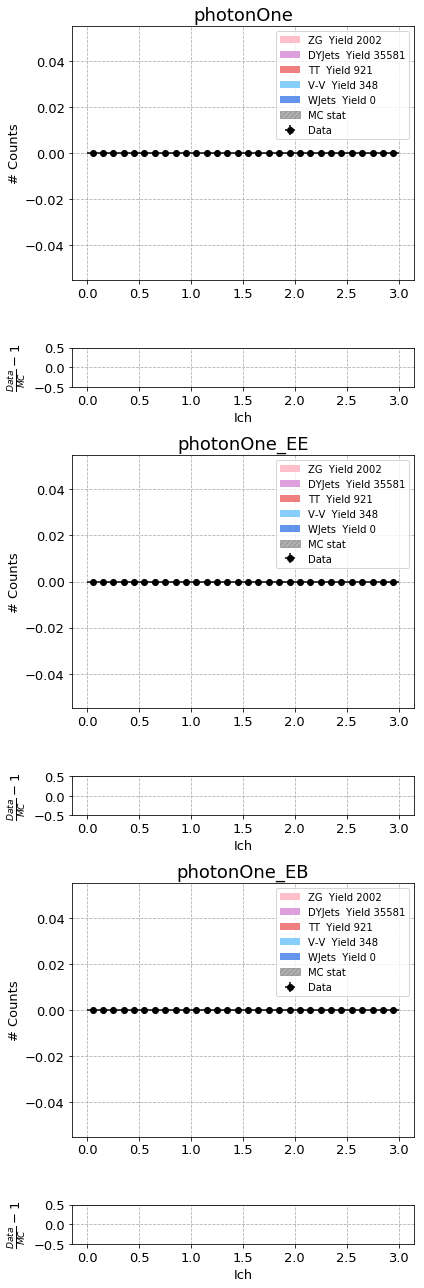

----------------Ineu----------------


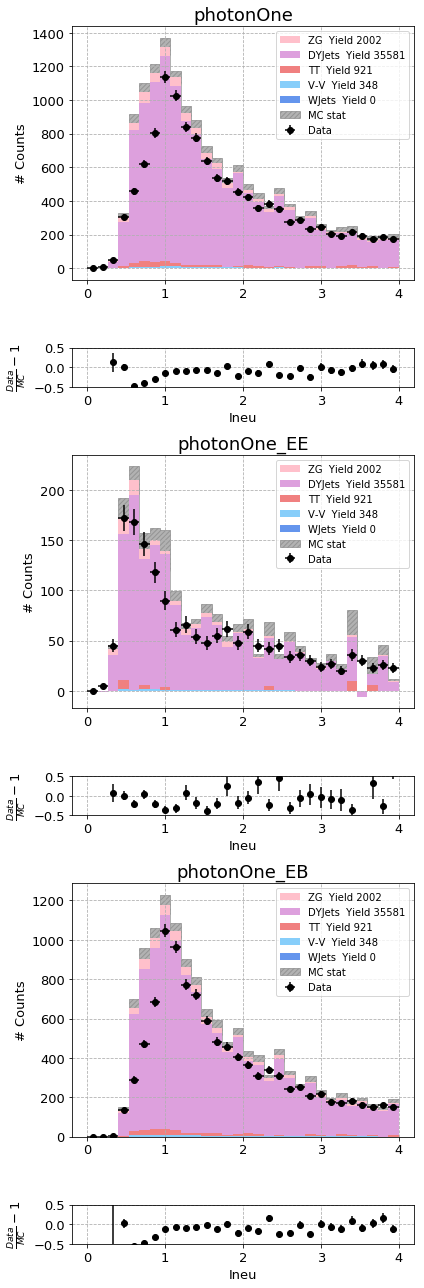

----------------Iph----------------


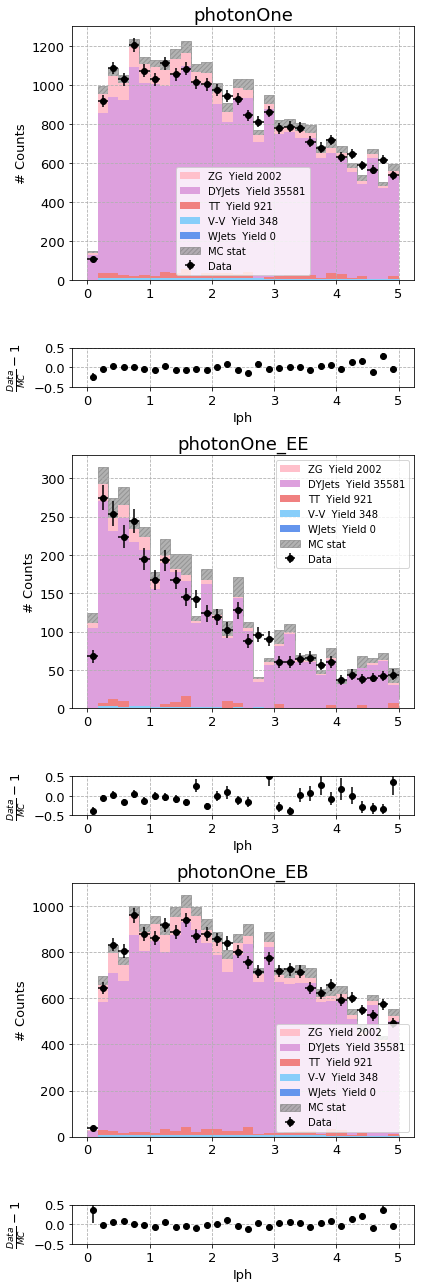

----------------Sieie----------------


/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Plotter.py:475: RuntimeWarning: divide by zero encountered in true_divide
  rDataMC = Data[1]/Bkg - 1
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:3199: RuntimeWarning: invalid value encountered in double_scalars
  low = [thisx - thiserr for thisx, thiserr


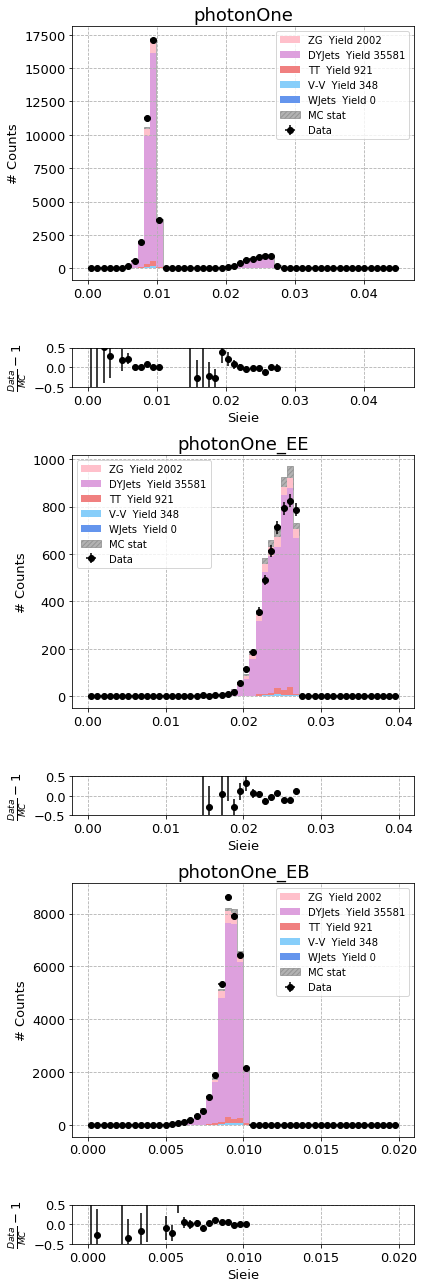

In [23]:
var = ['Ich','Ineu','Iph','Sieie']
part = ['photonOne','photonOne_EE','photonOne_EB']    
for v in var:
    print('----------------'+str(v)+'----------------')
    Plotter.Plot_Mult(
                      data[Region],            
                      var              = v,
                      part             = part,
                      signalInclude    = True,
                      figDim           = [3,1],
                      customRange      = customRange,
                      stacked          = stacked,
                      log              = log,
                      weightCorrection = weightCorrection,
                      Plotting         = Plotting,
                      StatInclude      = StatInclude,
                     )

# Single Graphs

----------------nJets----------------


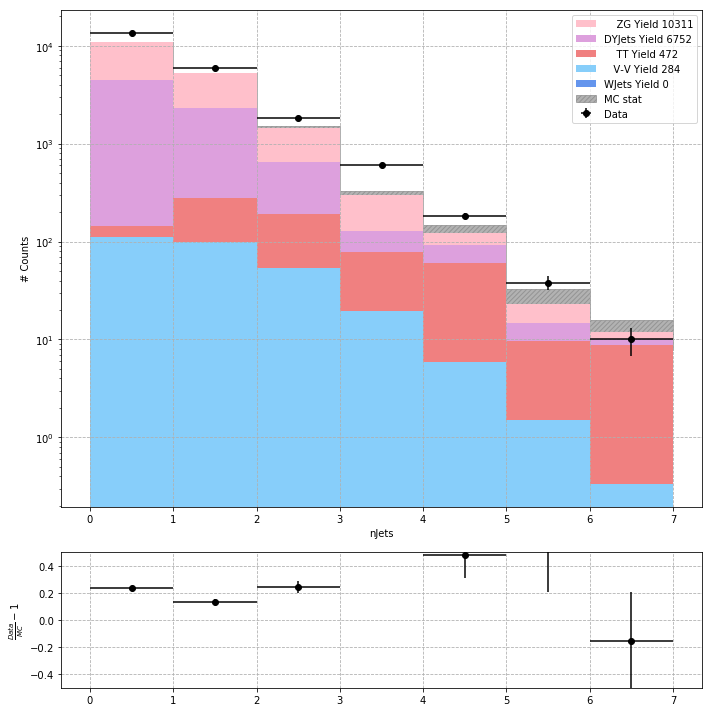

----------------nMuons----------------


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


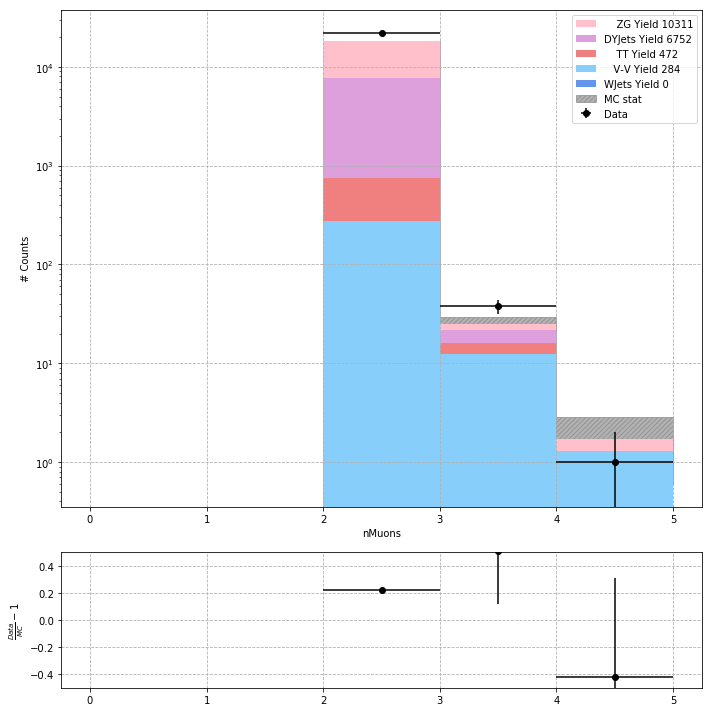

----------------nPhotons----------------


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


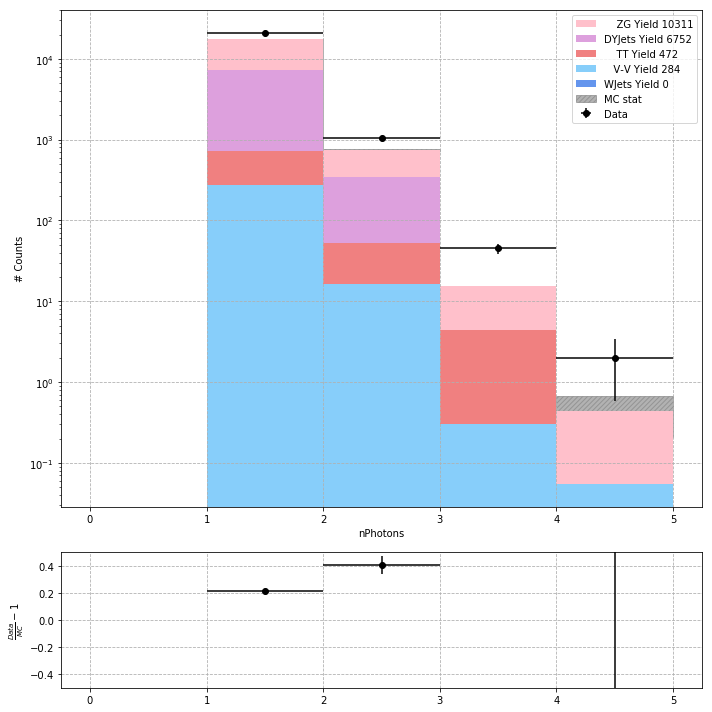

----------------met----------------


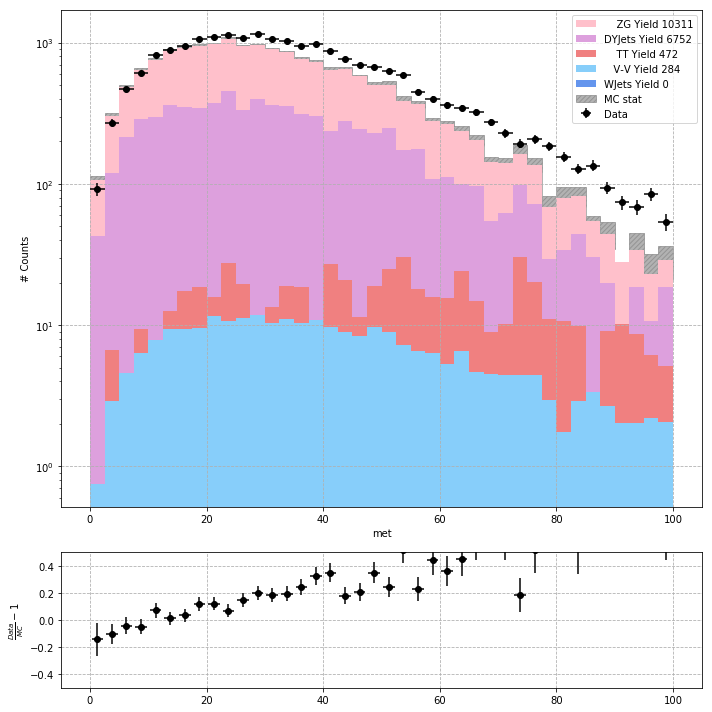

----------------leptonOnePt----------------


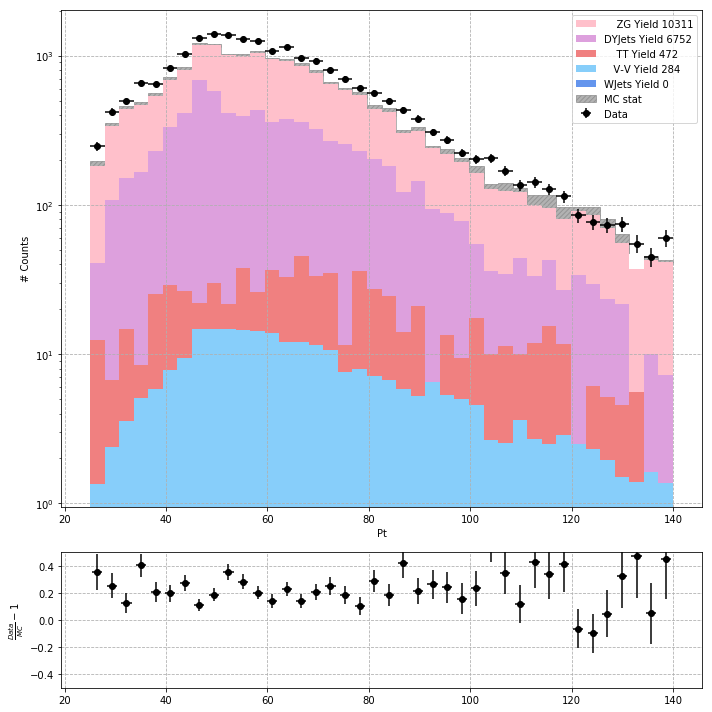

----------------leptonOnePhi----------------


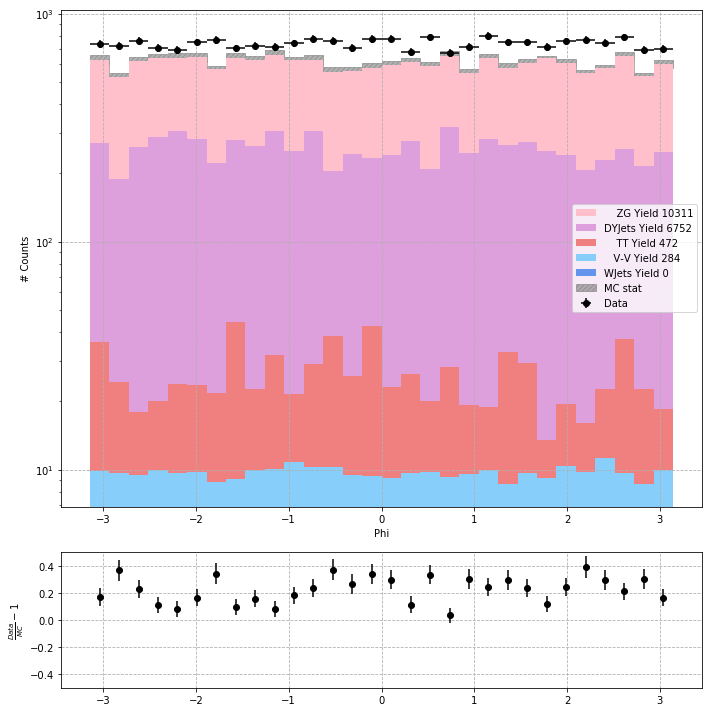

----------------leptonOneEta----------------


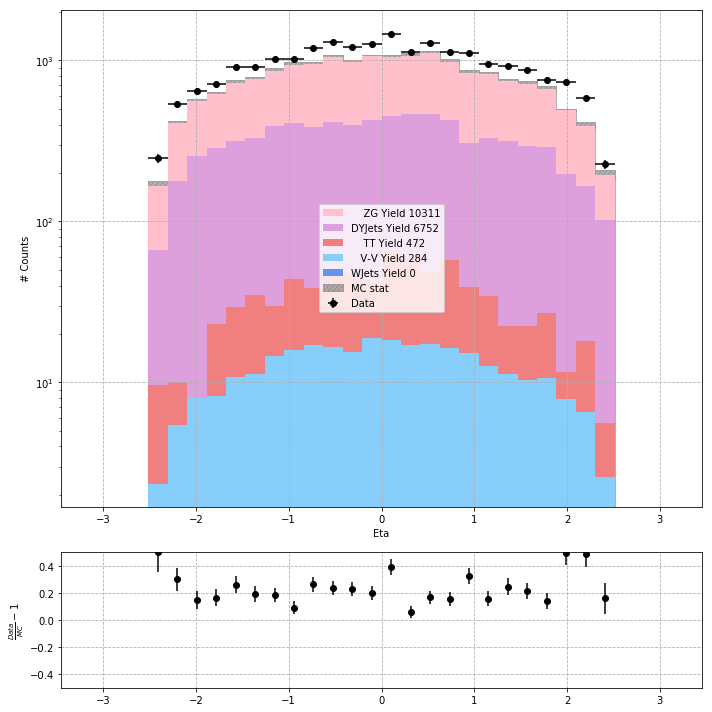

----------------leptonOne_EEPt----------------


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less_equal


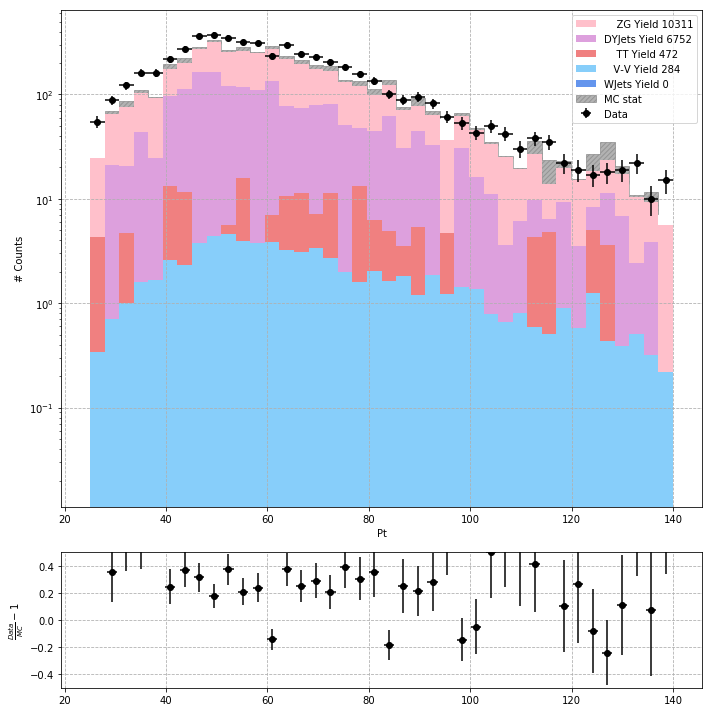

----------------leptonOne_EEPhi----------------


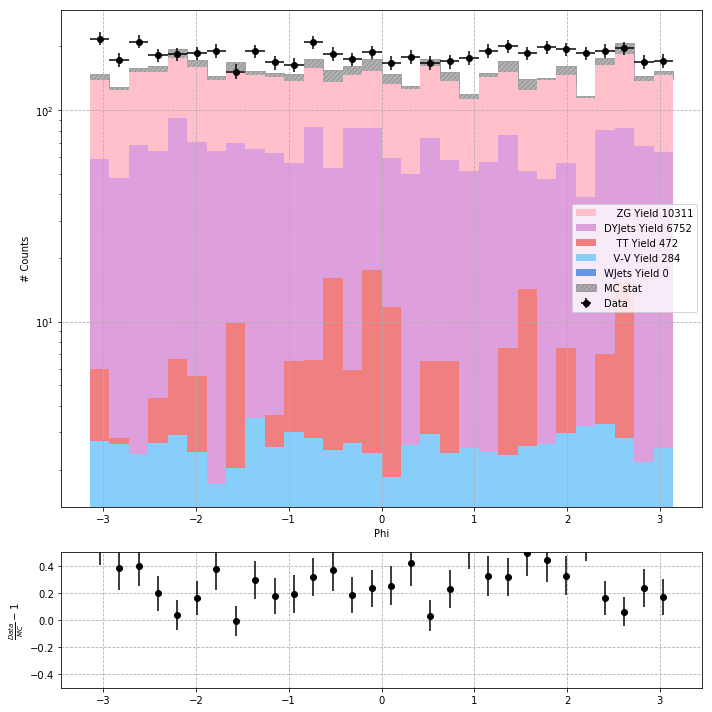

----------------leptonOne_EEEta----------------


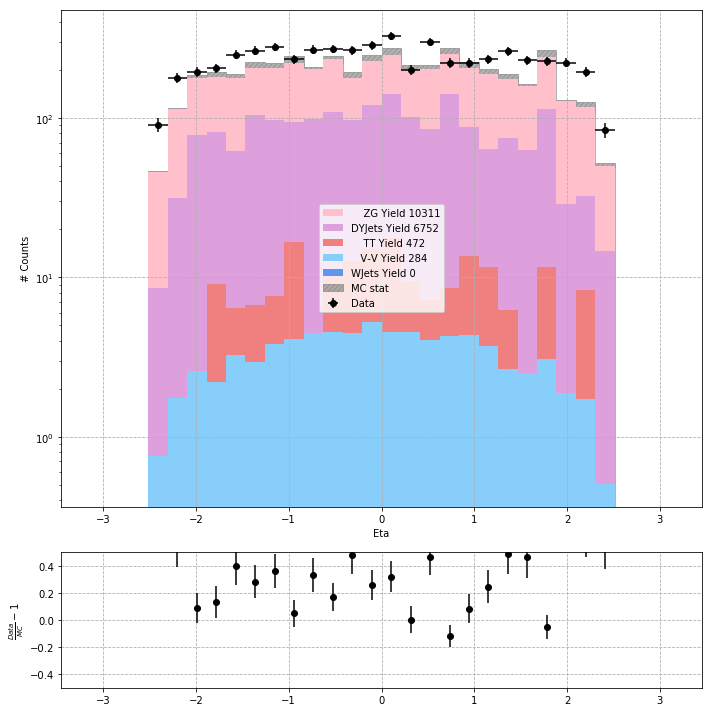

----------------leptonOne_EBPt----------------


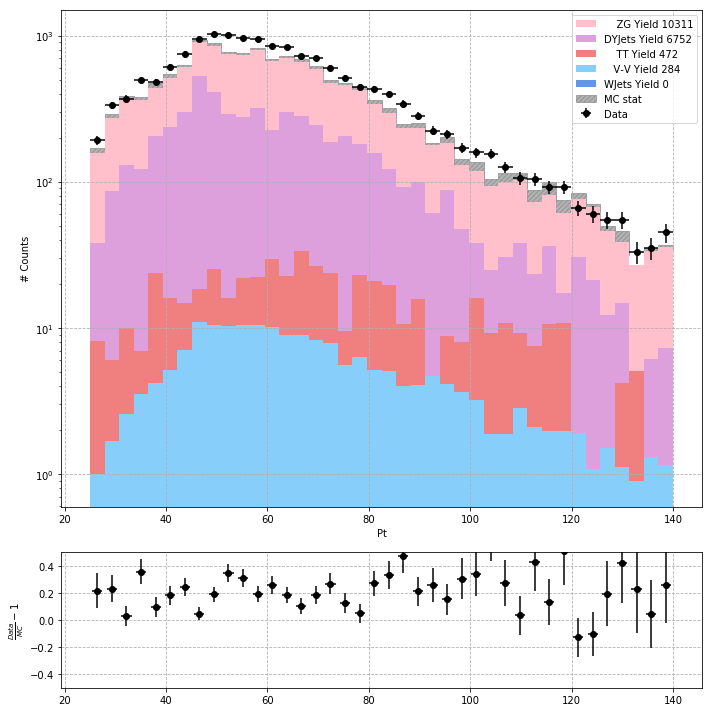

----------------leptonOne_EBPhi----------------


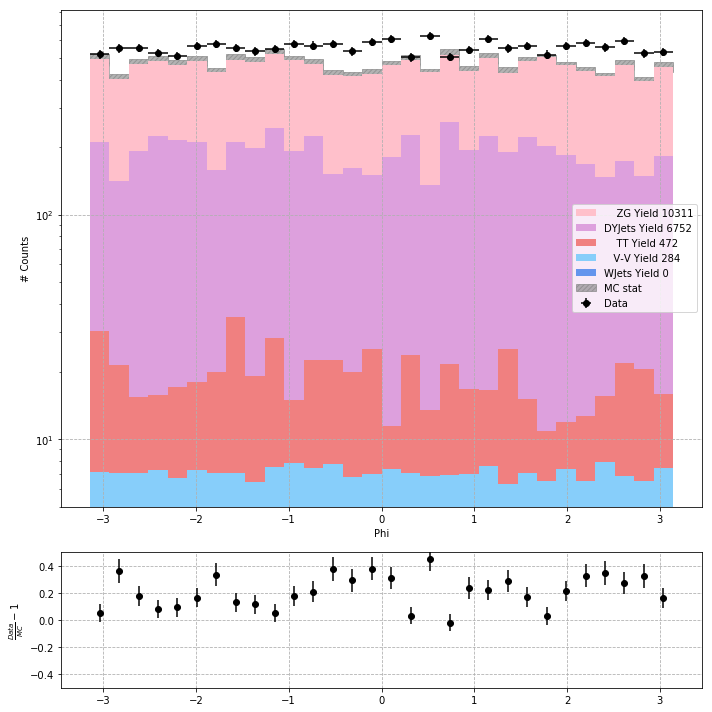

----------------leptonOne_EBEta----------------


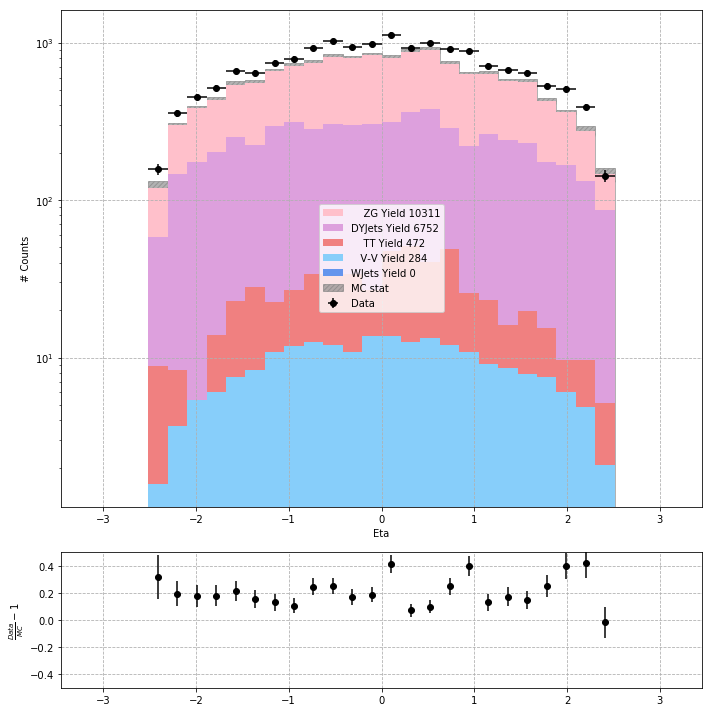

----------------leptonTwoPt----------------


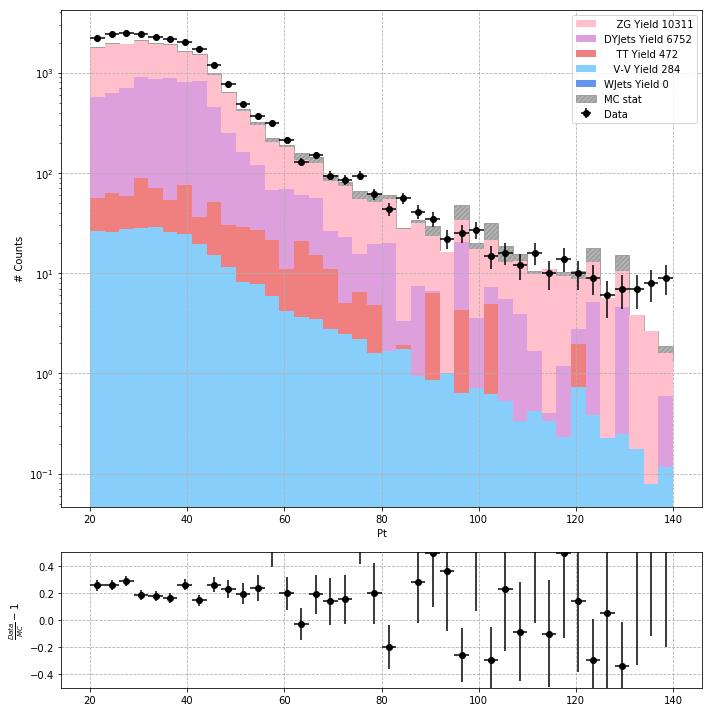

----------------leptonTwoPhi----------------


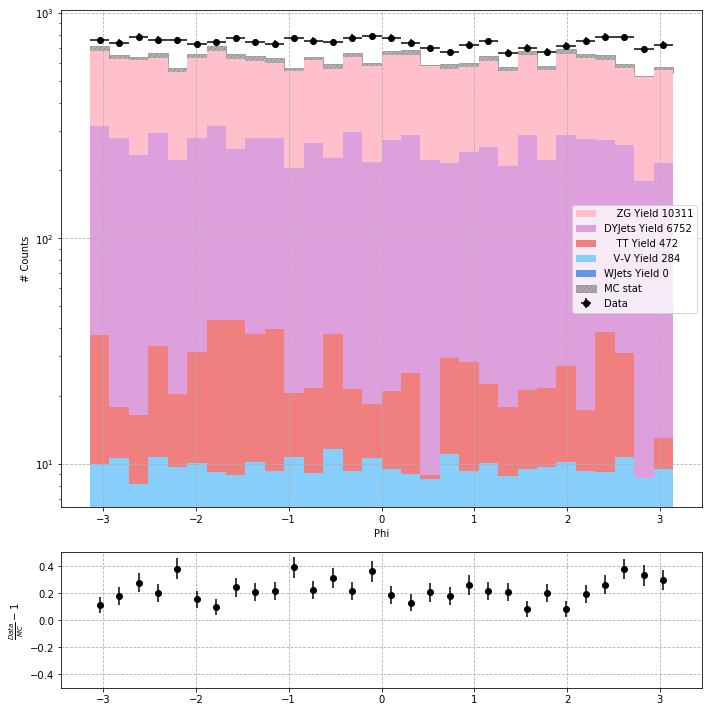

----------------leptonTwoEta----------------


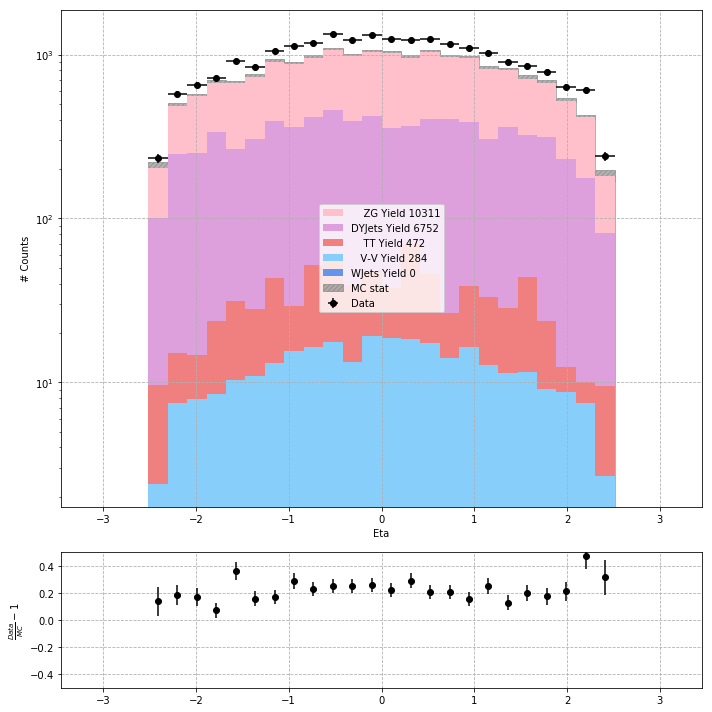

----------------leptonTwo_EEPt----------------


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


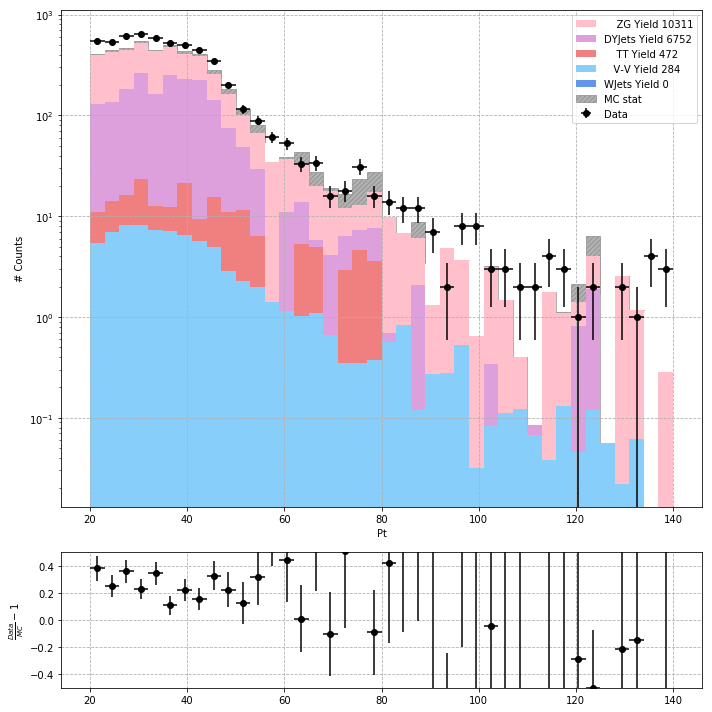

----------------leptonTwo_EEPhi----------------


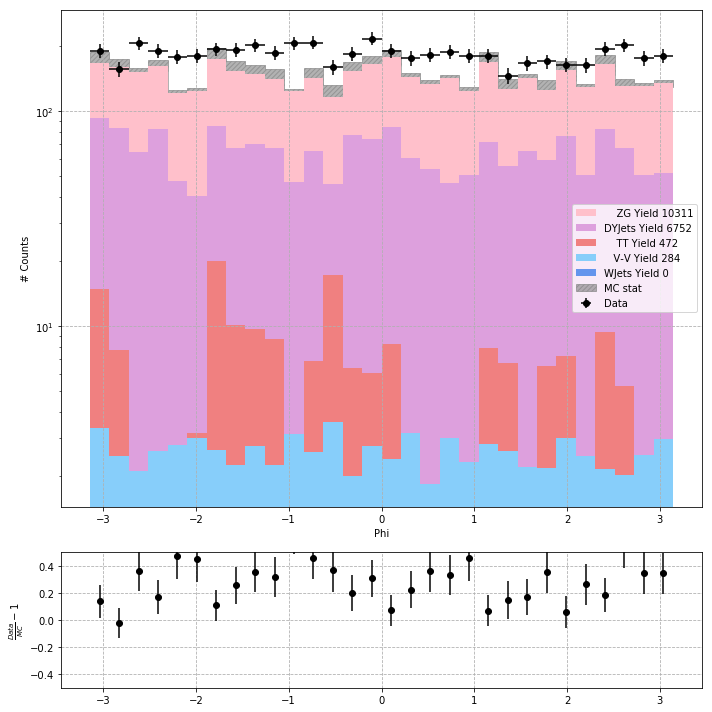

----------------leptonTwo_EEEta----------------


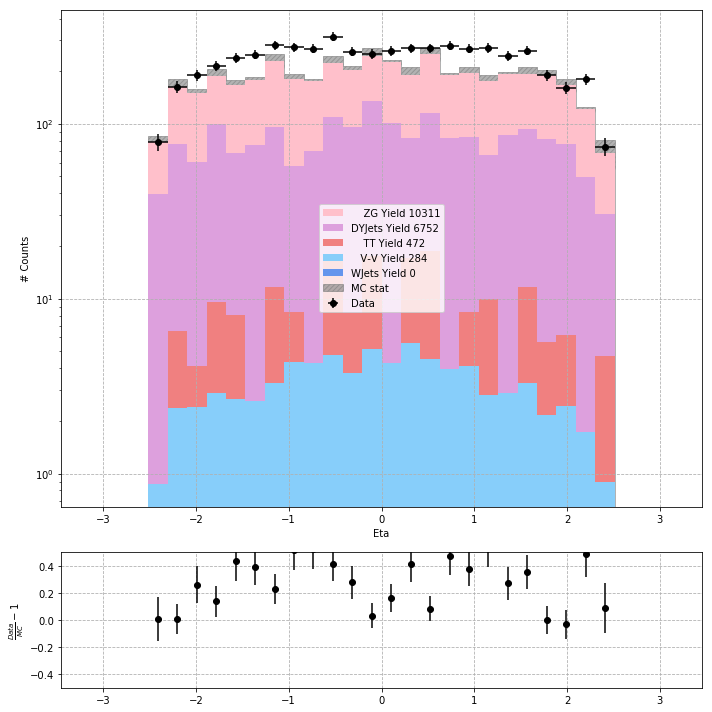

----------------leptonTwo_EBPt----------------


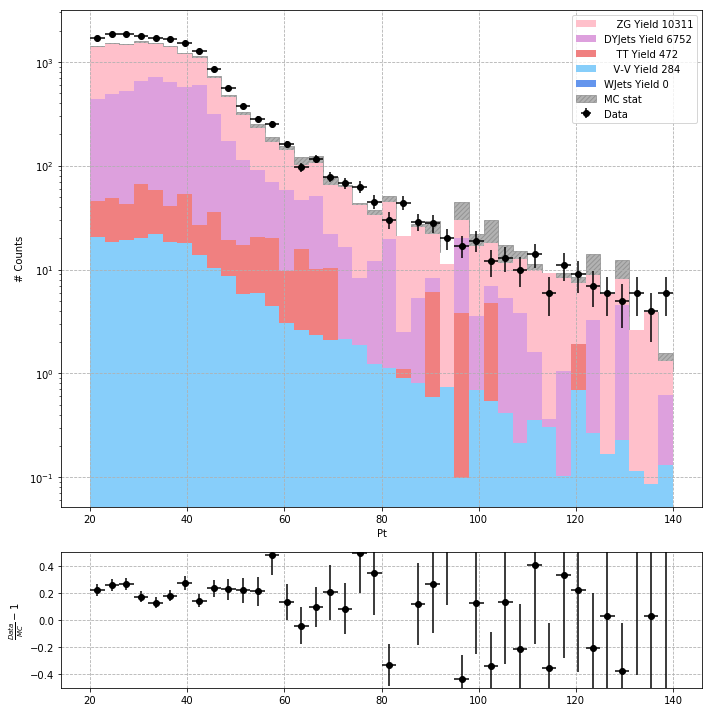

----------------leptonTwo_EBPhi----------------


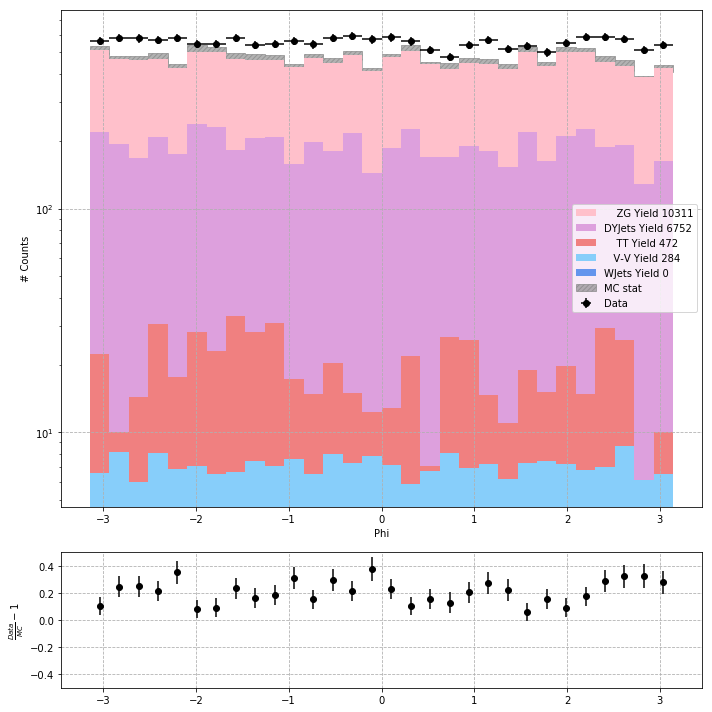

----------------leptonTwo_EBEta----------------


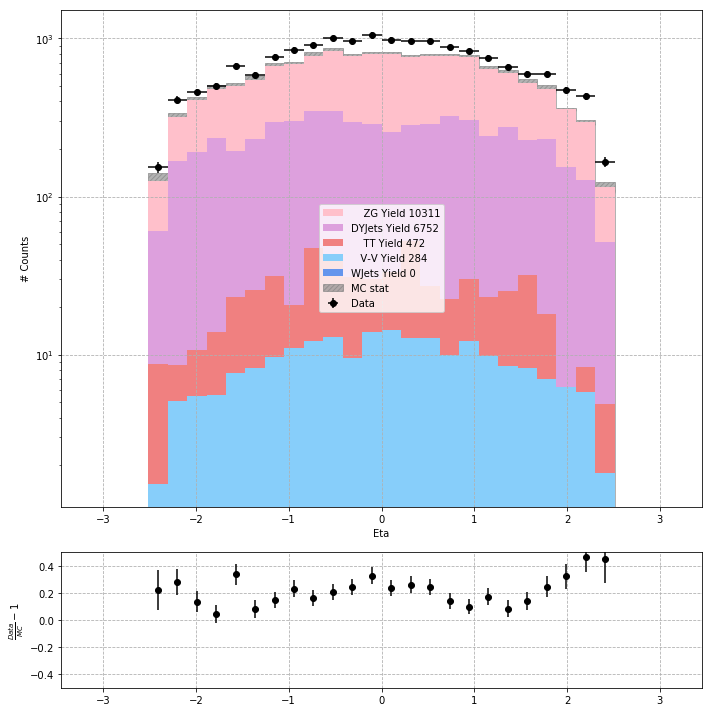

----------------photonOnePt----------------


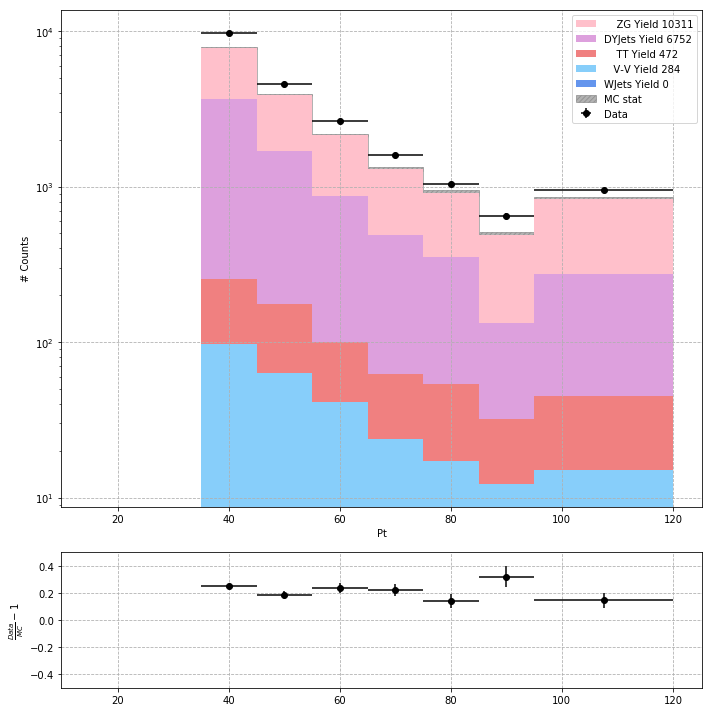

----------------photonOnePhi----------------


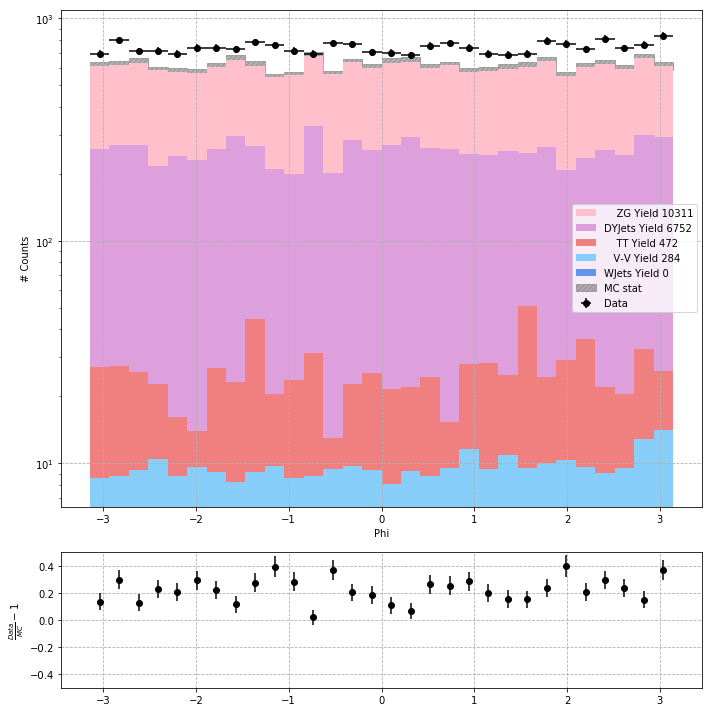

----------------photonOneEta----------------


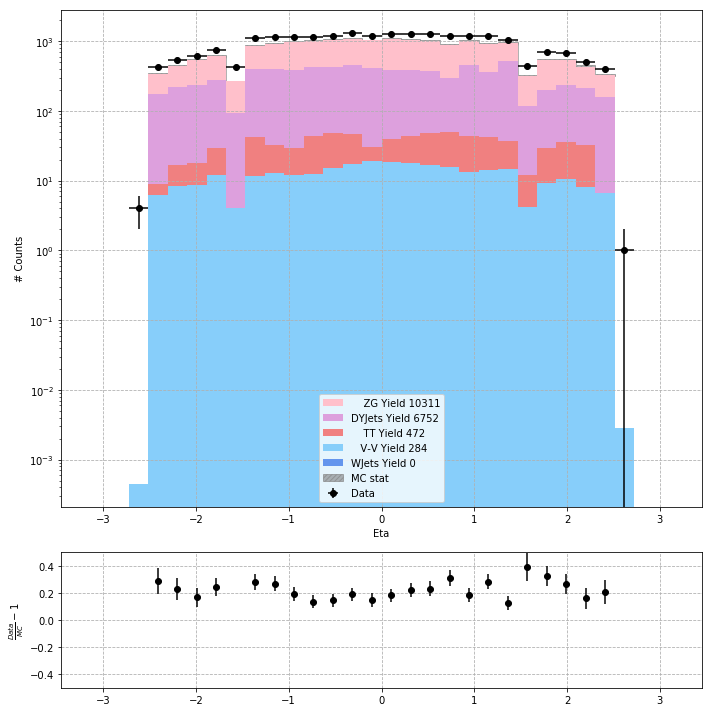

----------------photonOne_EEPt----------------


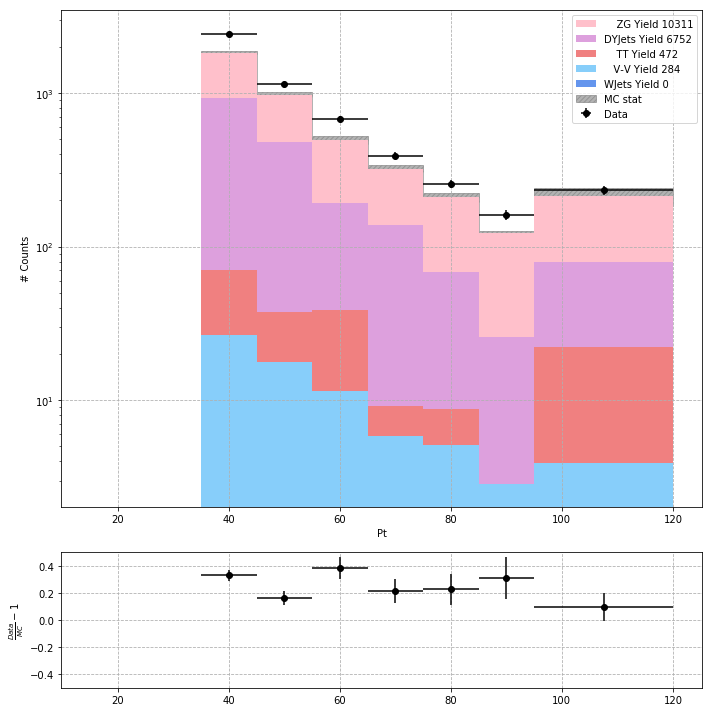

----------------photonOne_EEPhi----------------


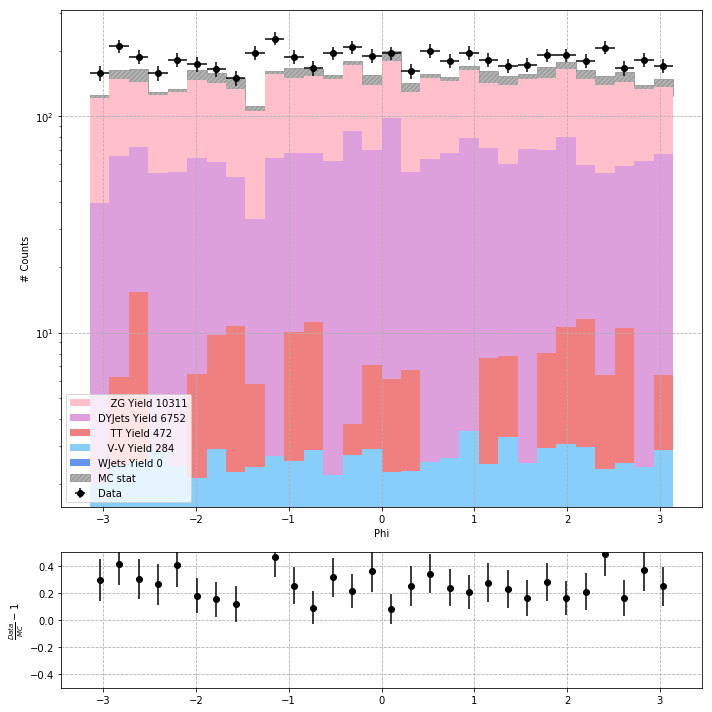

----------------photonOne_EEEta----------------


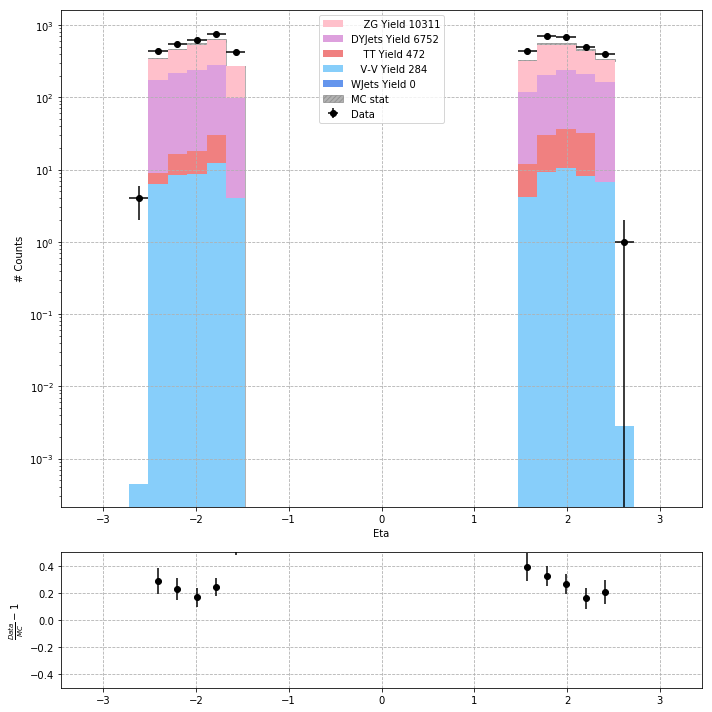

----------------photonOne_EBPt----------------


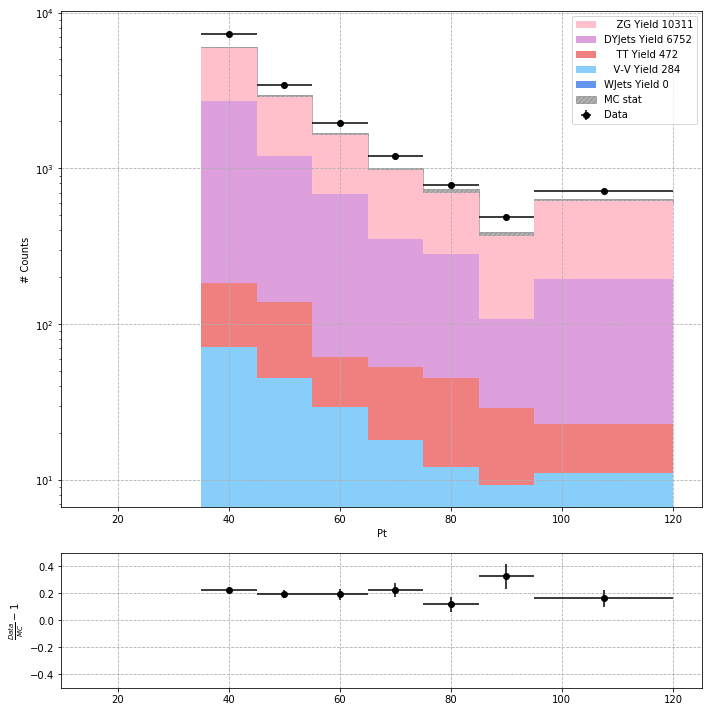

----------------photonOne_EBPhi----------------


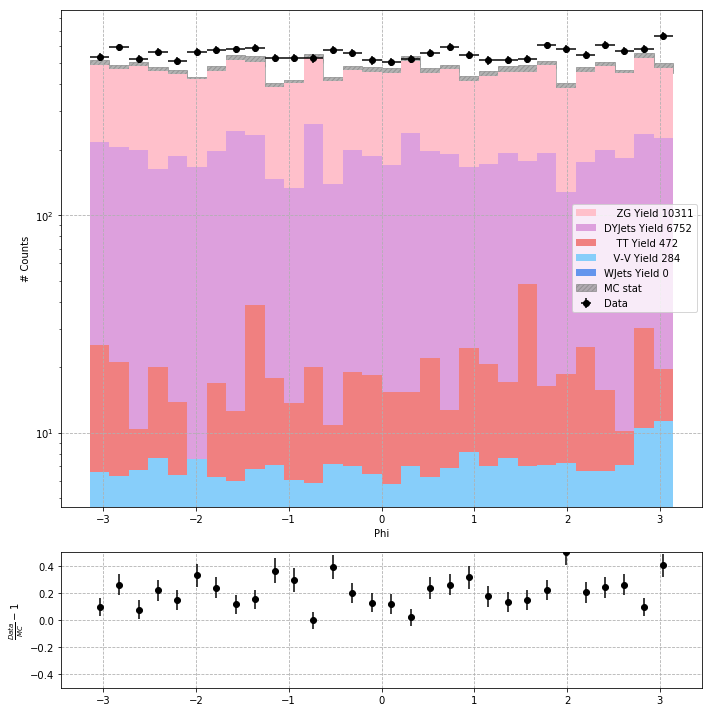

----------------photonOne_EBEta----------------


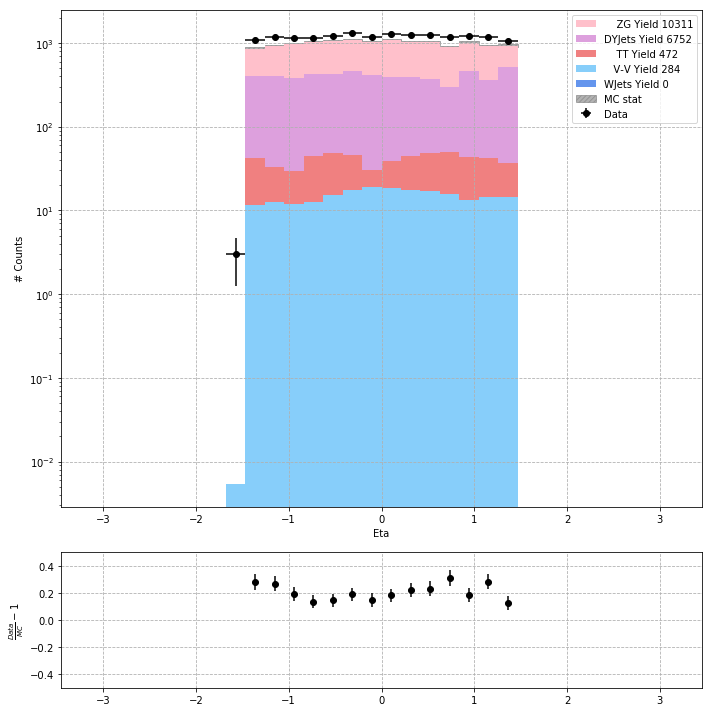

----------------dileptonPt----------------


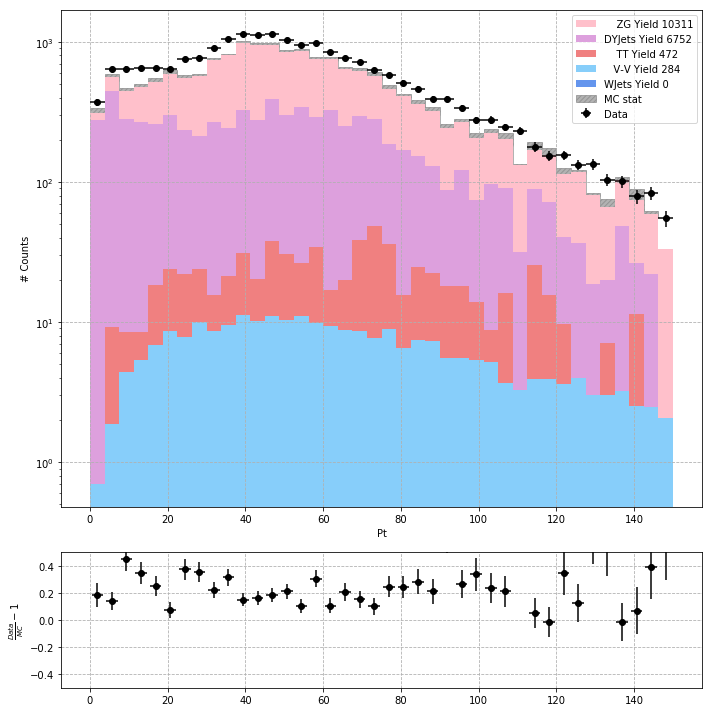

----------------dileptonPhi----------------


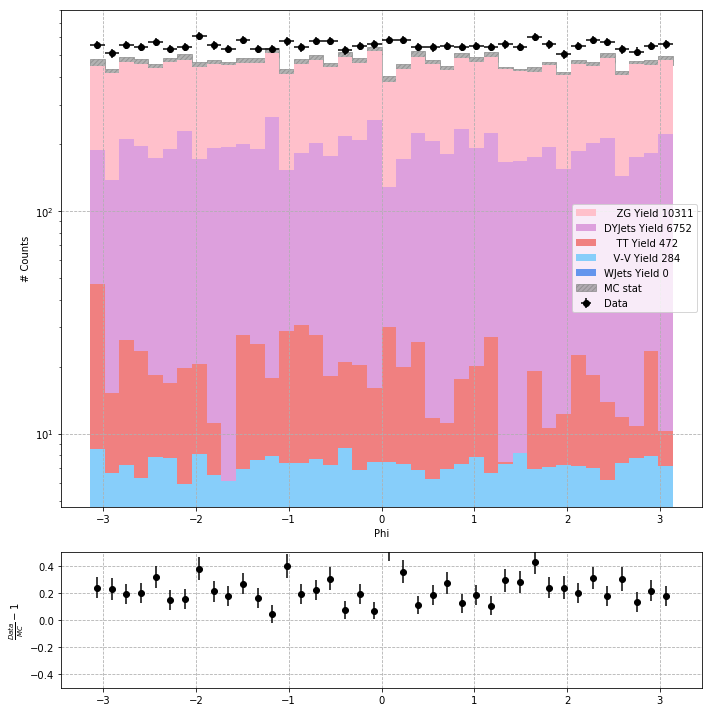

----------------dileptonEta----------------


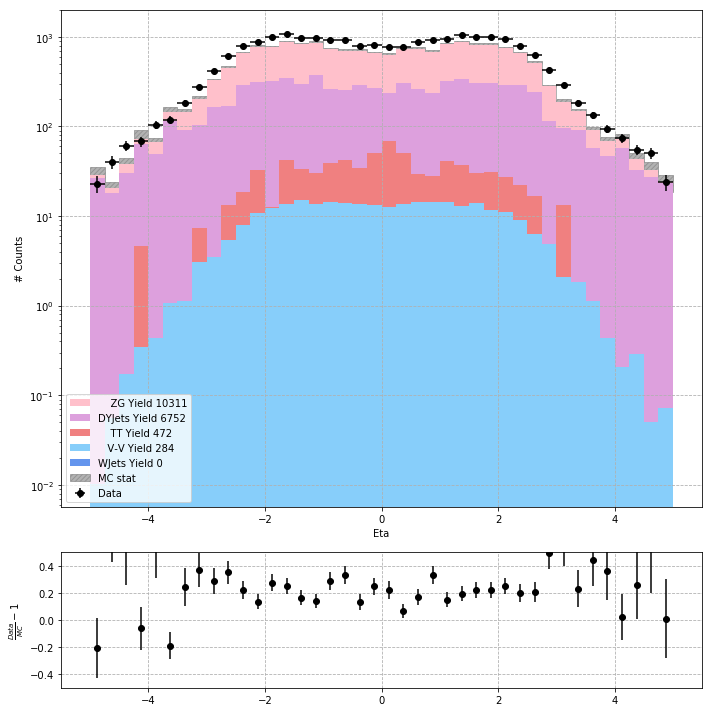

----------------dilepton_EEPt----------------


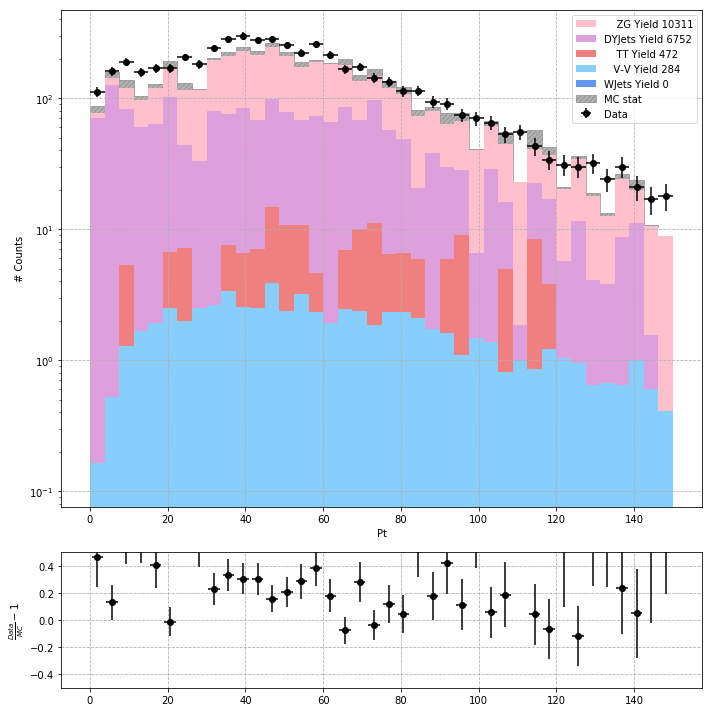

----------------dilepton_EEPhi----------------


UnboundLocalError: local variable 'scale' referenced before assignment

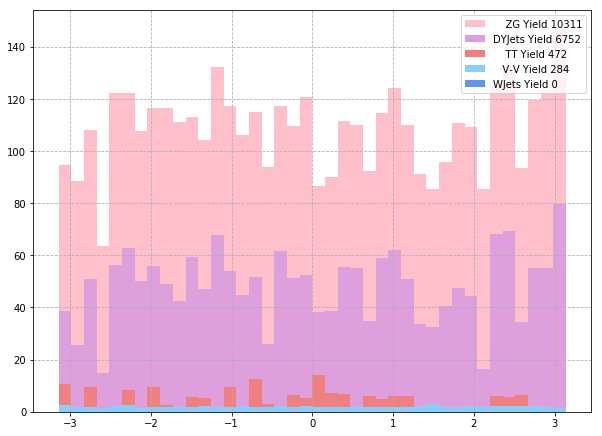

In [137]:
if LOG == 'both':
    for log in [True,False]:
        ###############################    
        if log:
            stackFol = Fol+'/log'
        else:
            stackFol = Fol+'/linear'
        ###############################    
        Single_Ploting(Plotter, data,stacked,log,weightCorrection,Blind,Plotting,StatInclude)
else:
    Single_Ploting(Plotter, data,stacked,log,weightCorrection,Blind,Plotting,StatInclude)

# Multi Graphs

----------------Pt----------------


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less_equal
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:27: Runt

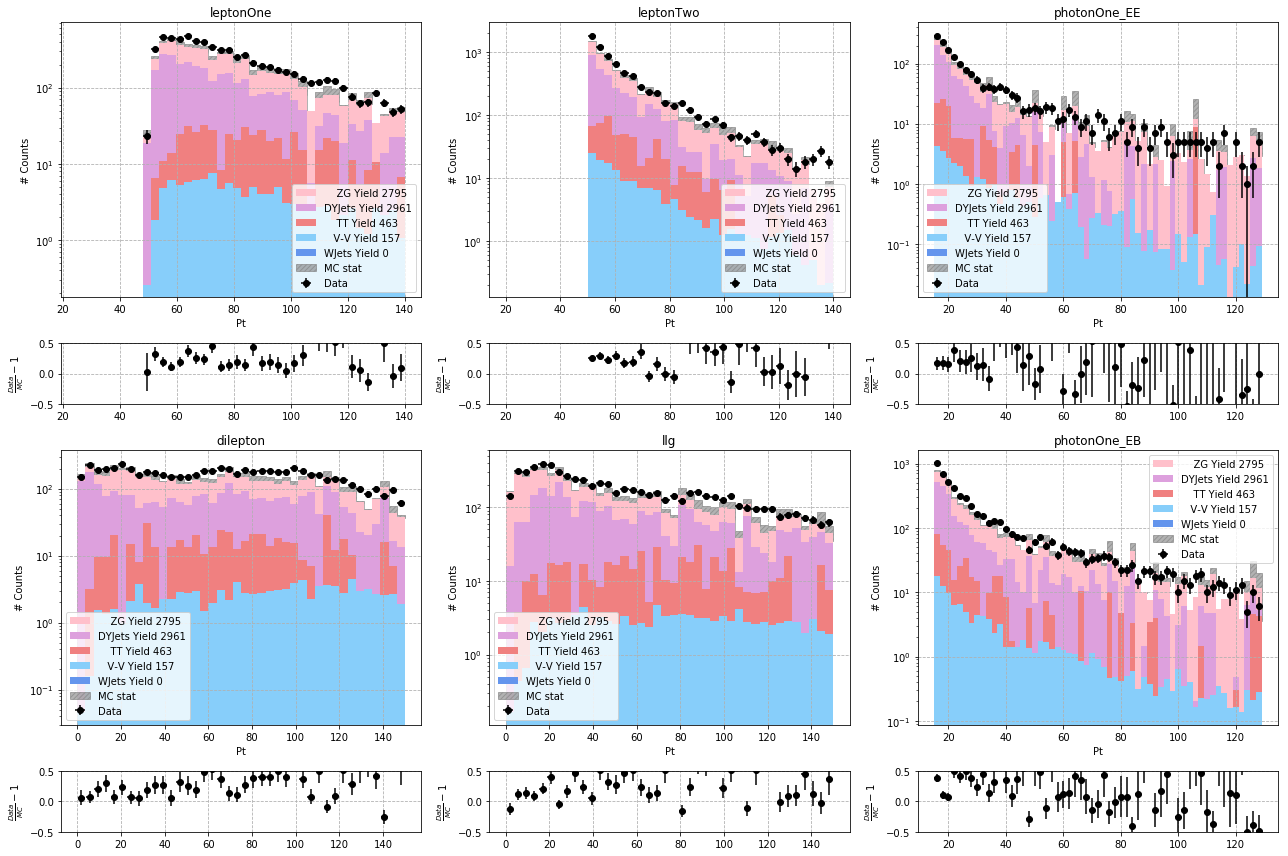

----------------Phi----------------


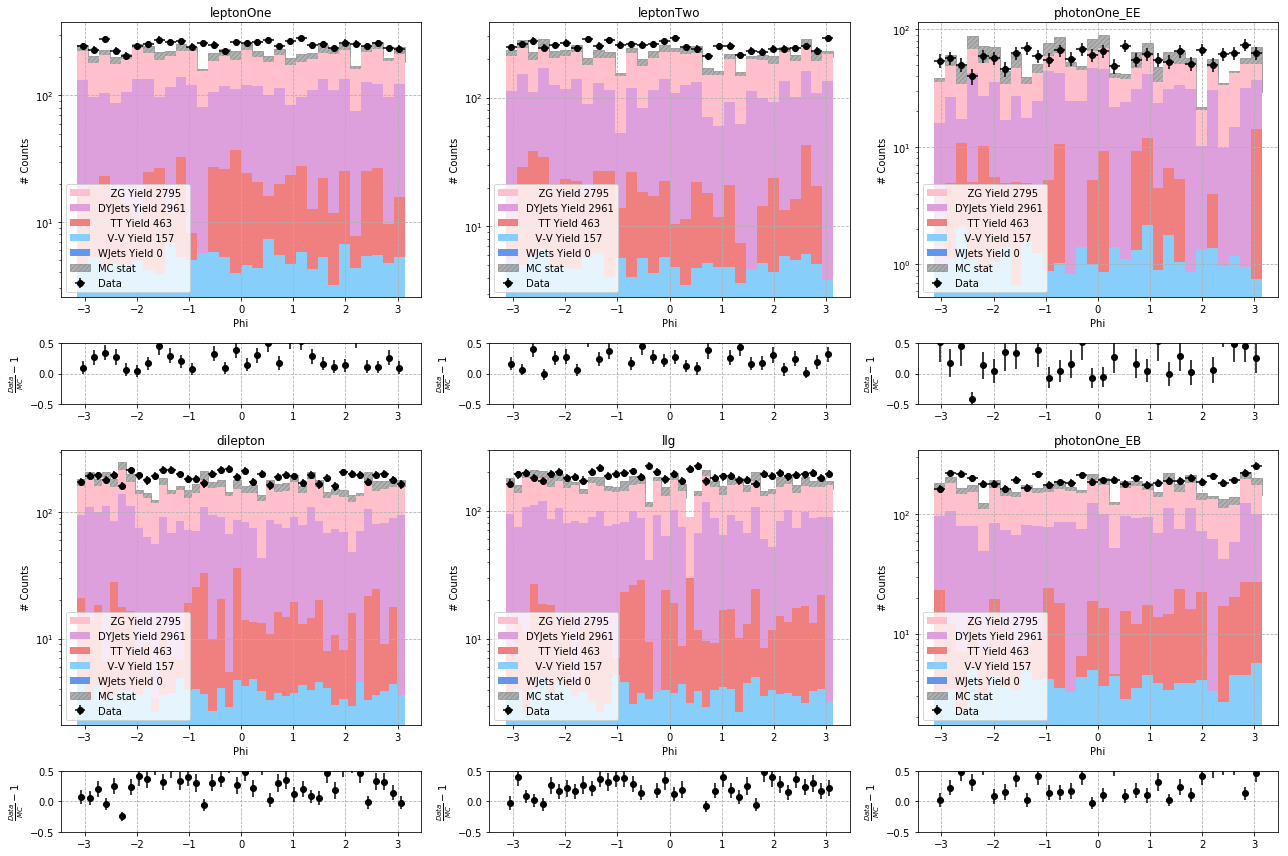

----------------Eta----------------


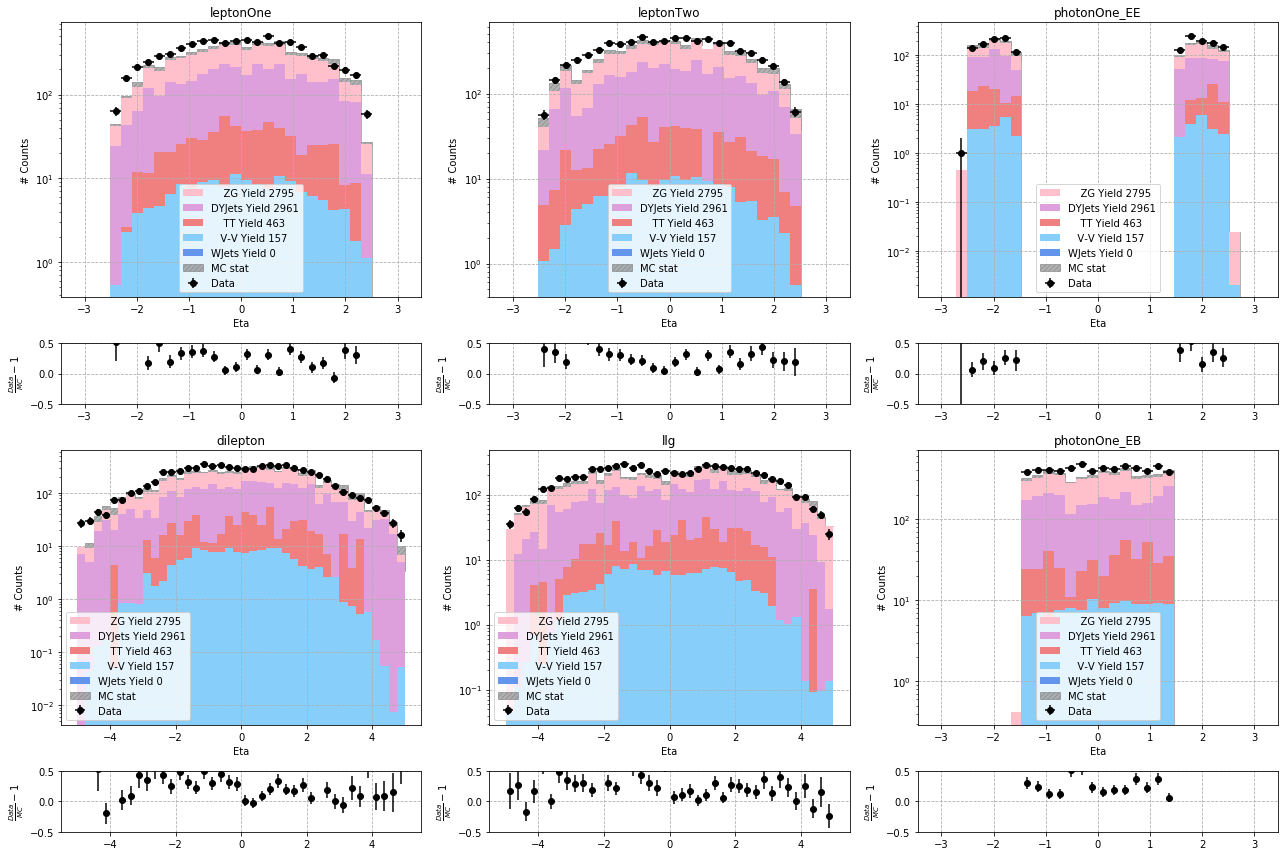

----------------DEta----------------


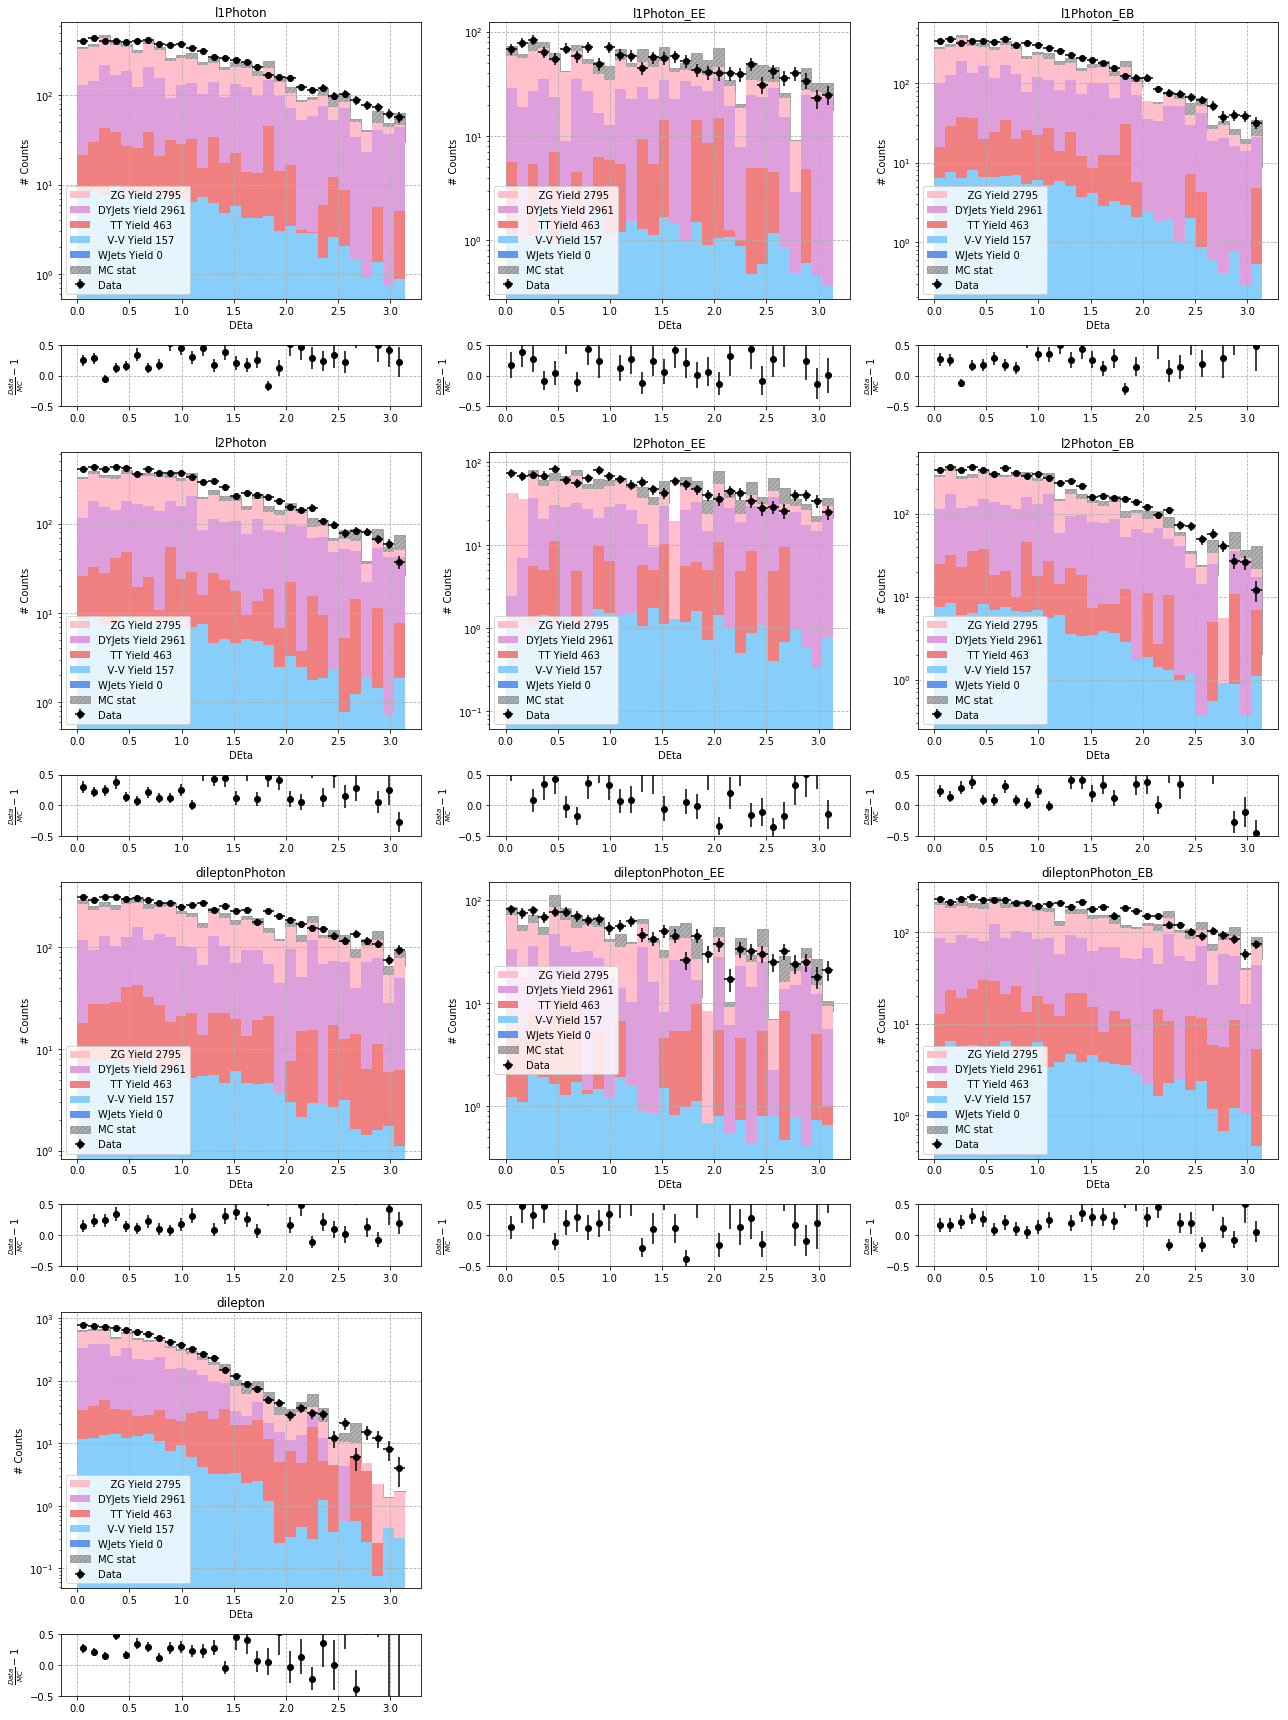

----------------DPhi----------------


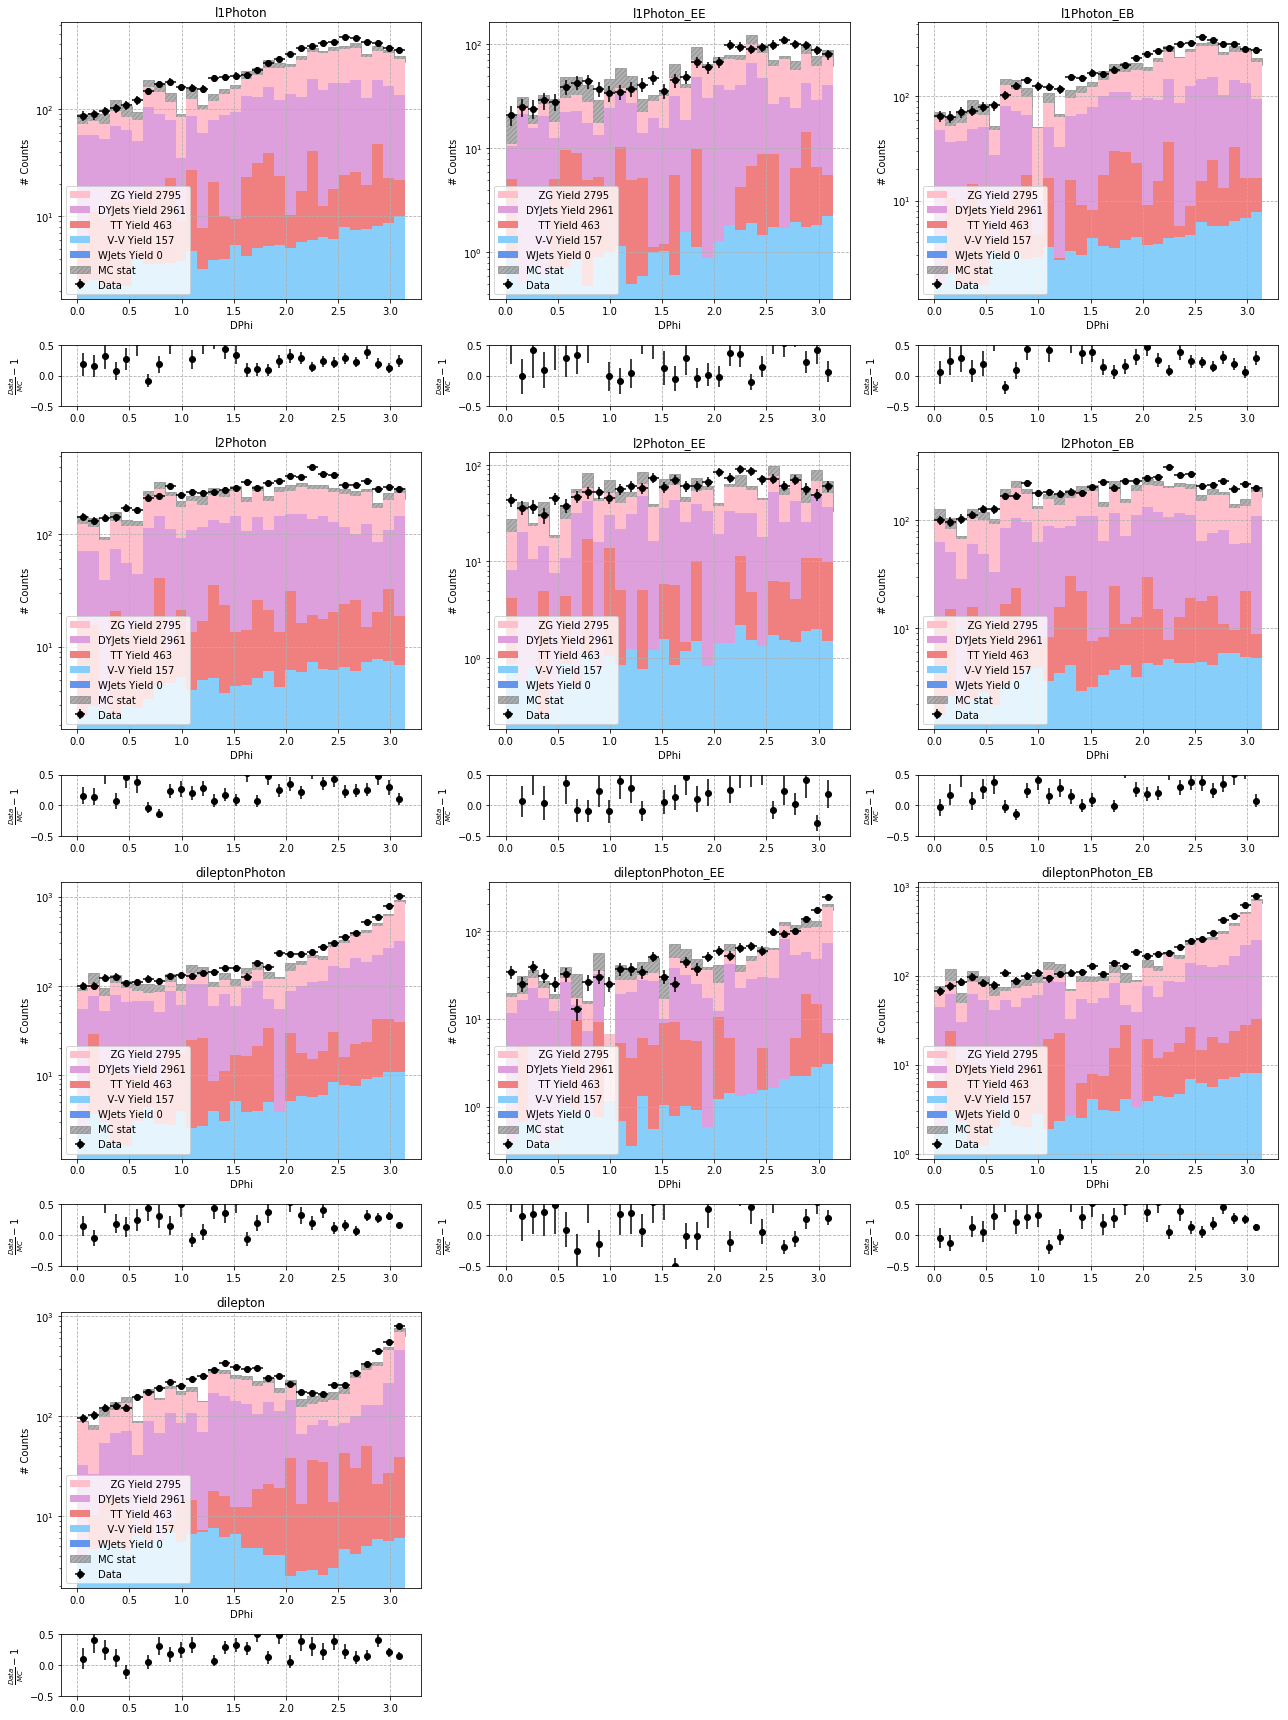

----------------DR----------------


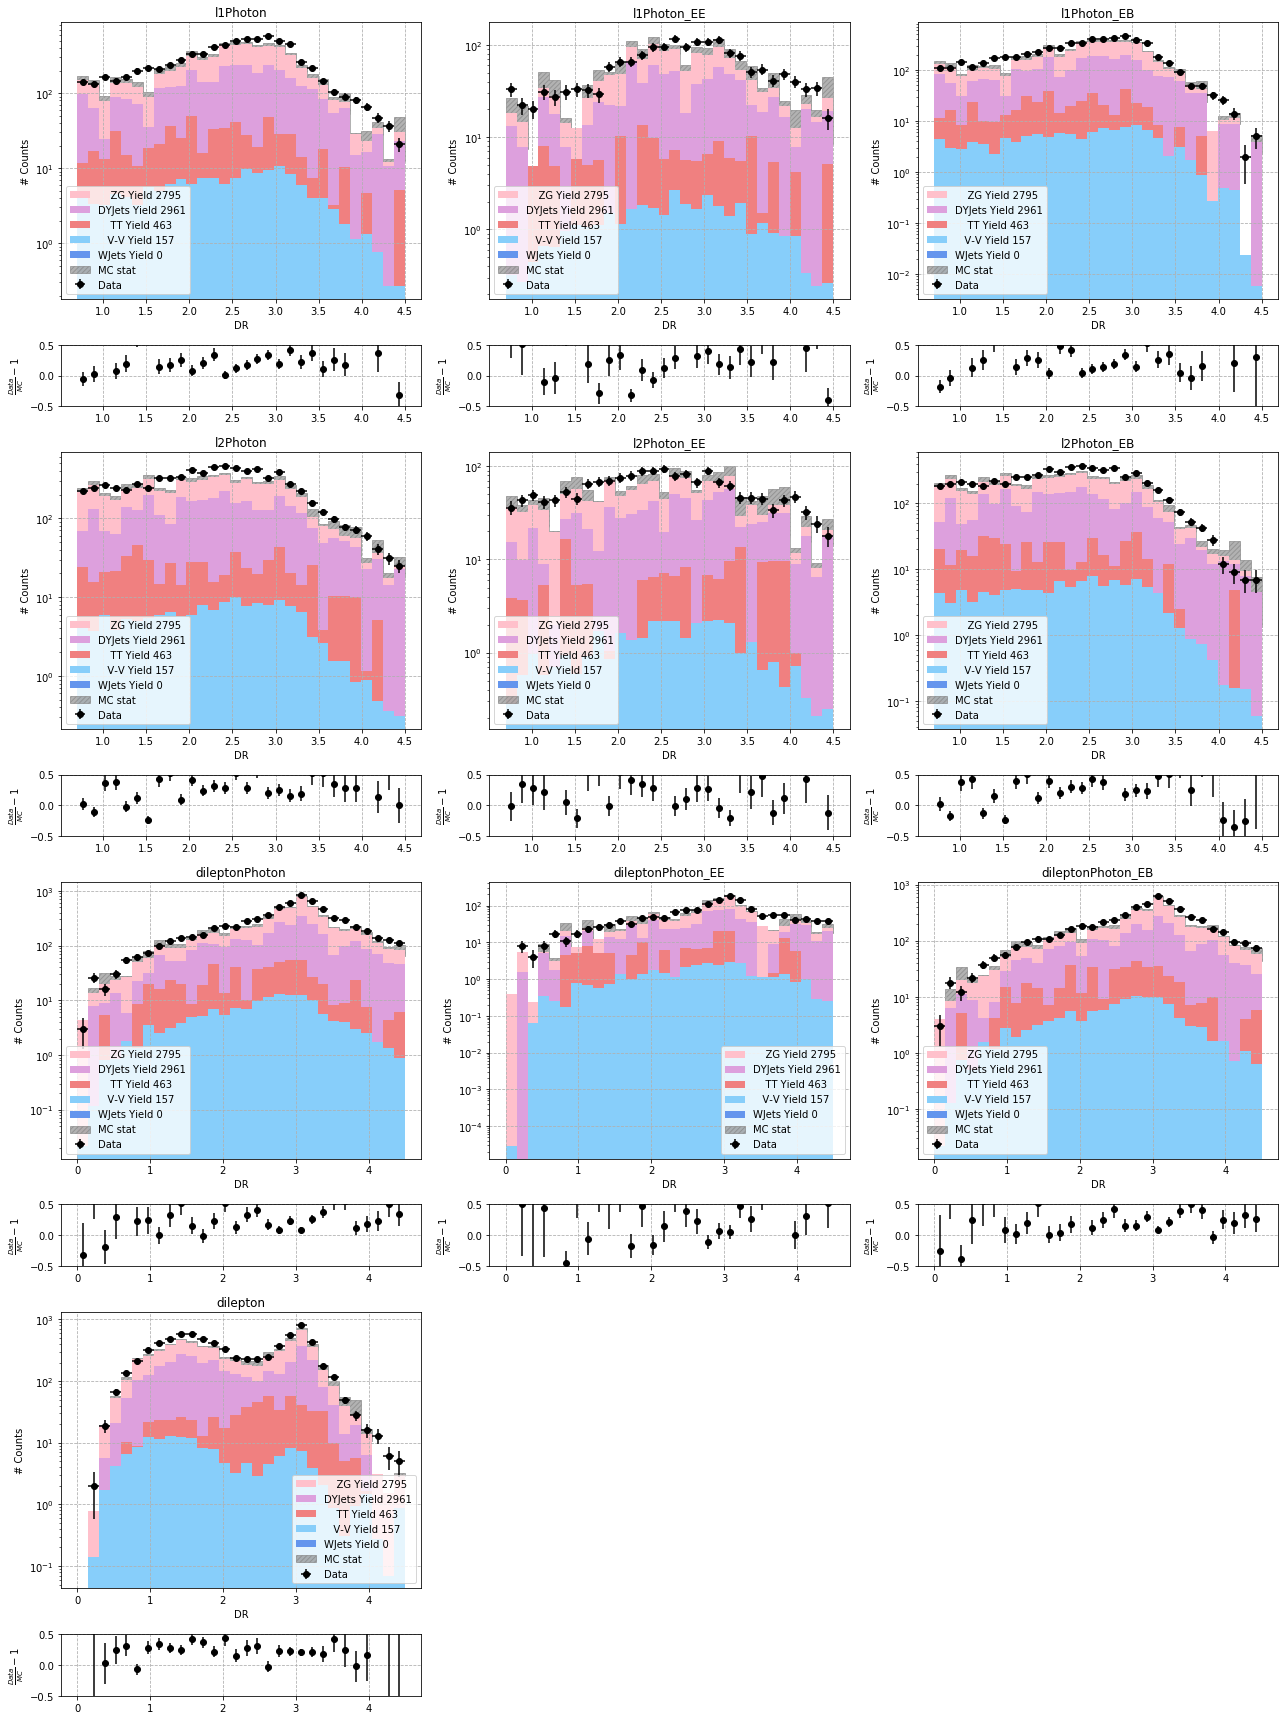

----------------HoverE----------------


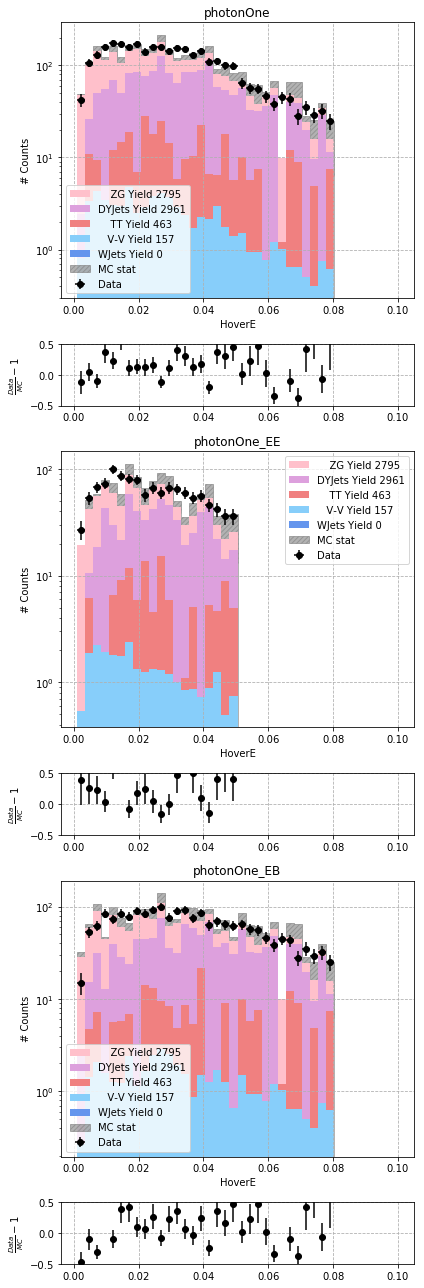

----------------R9----------------


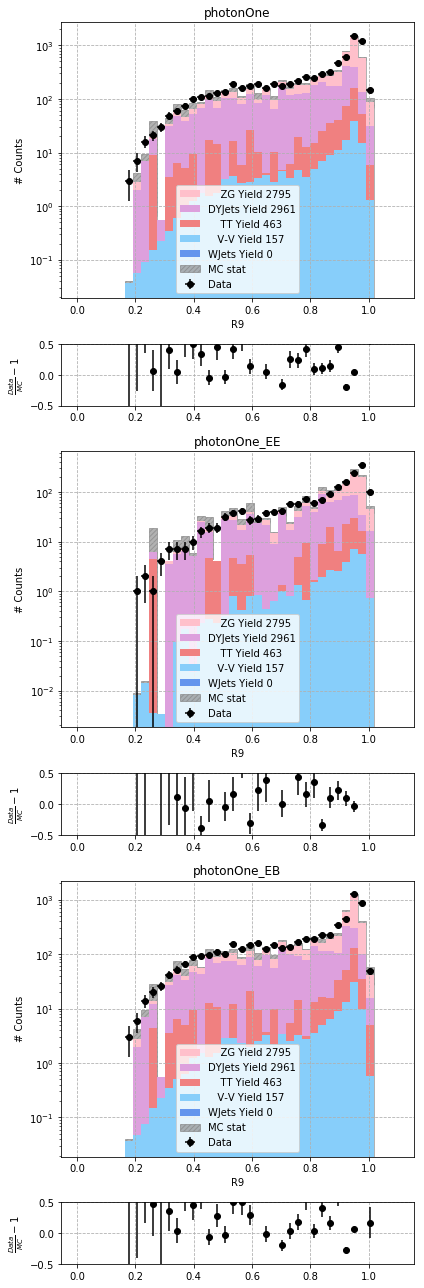

----------------MVA----------------


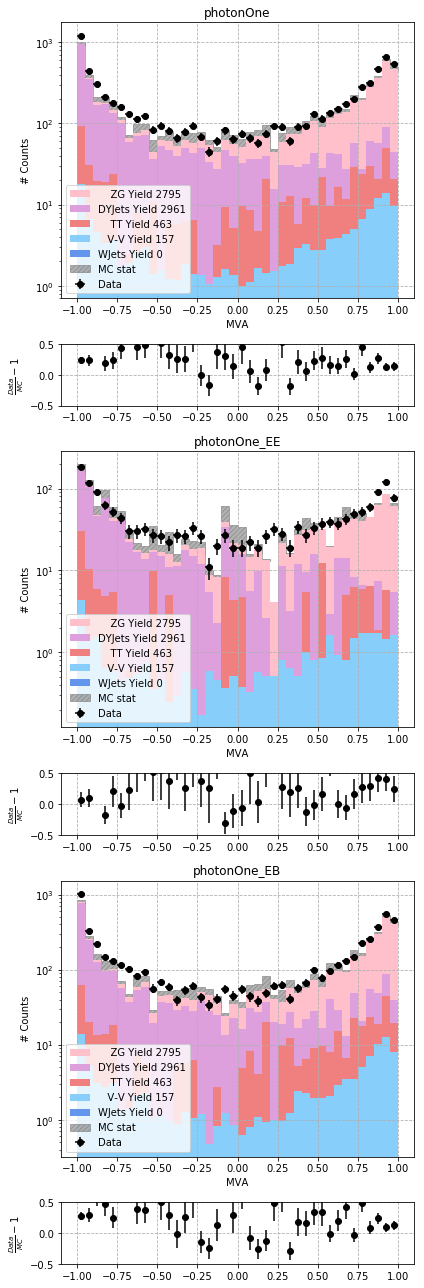

----------------Ich----------------


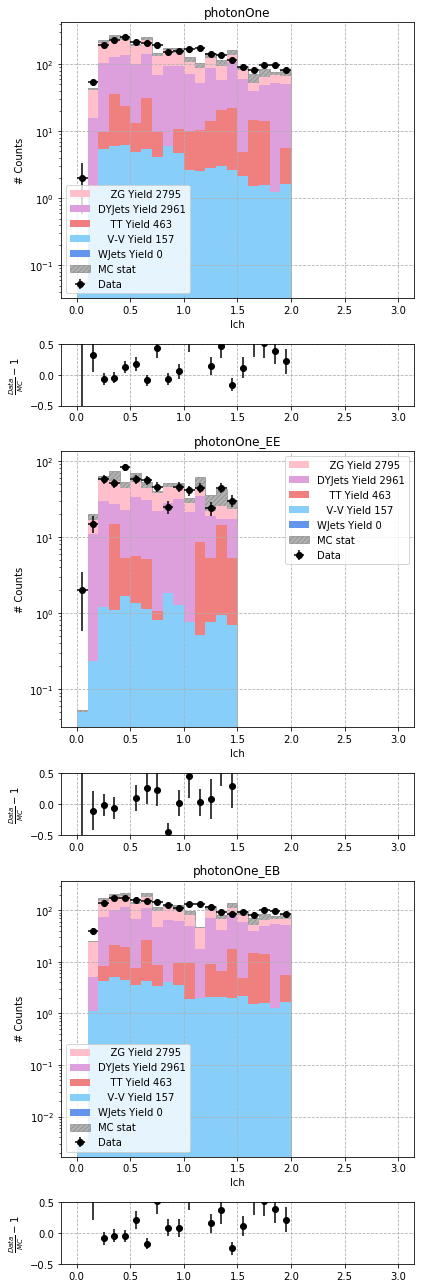

----------------Ineu----------------


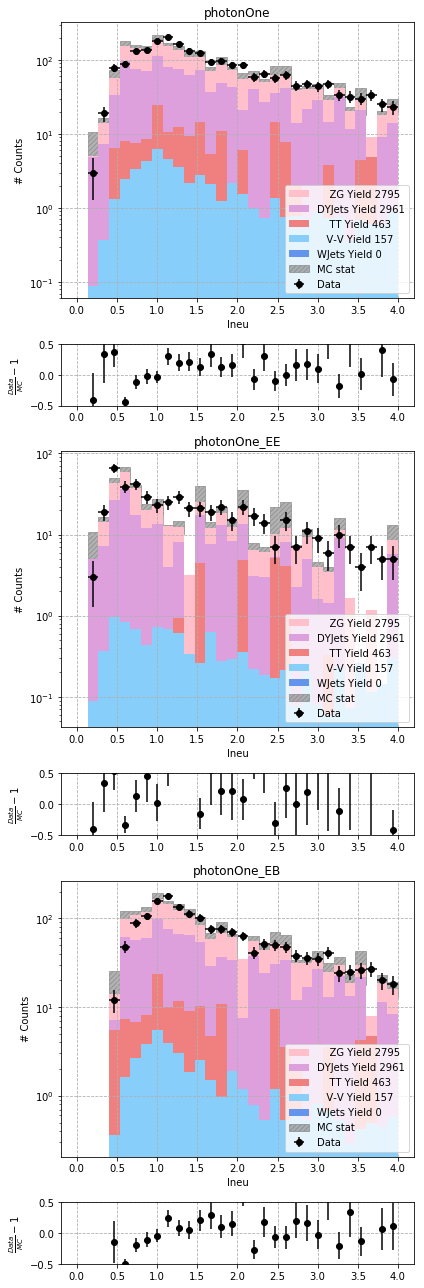

----------------Iph----------------


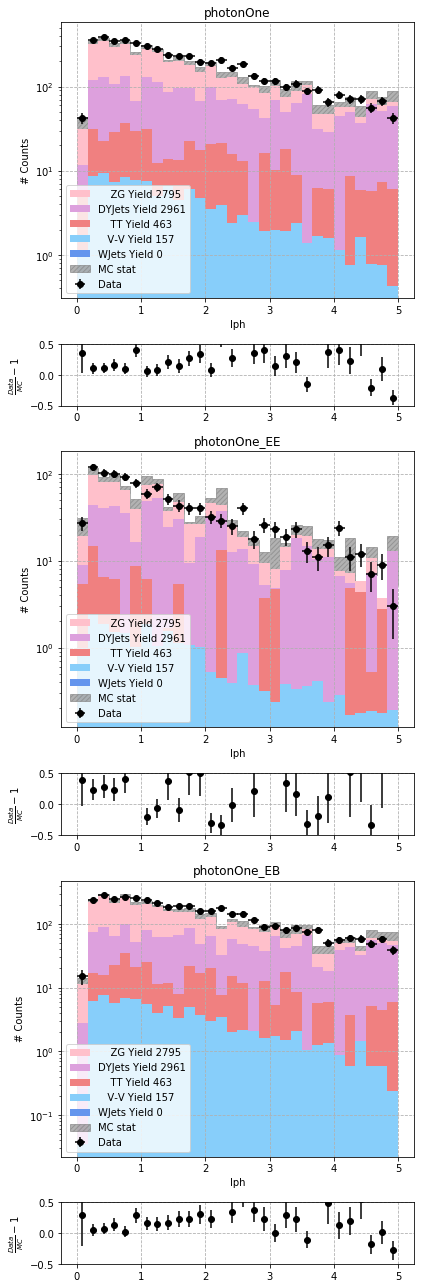

----------------M----------------


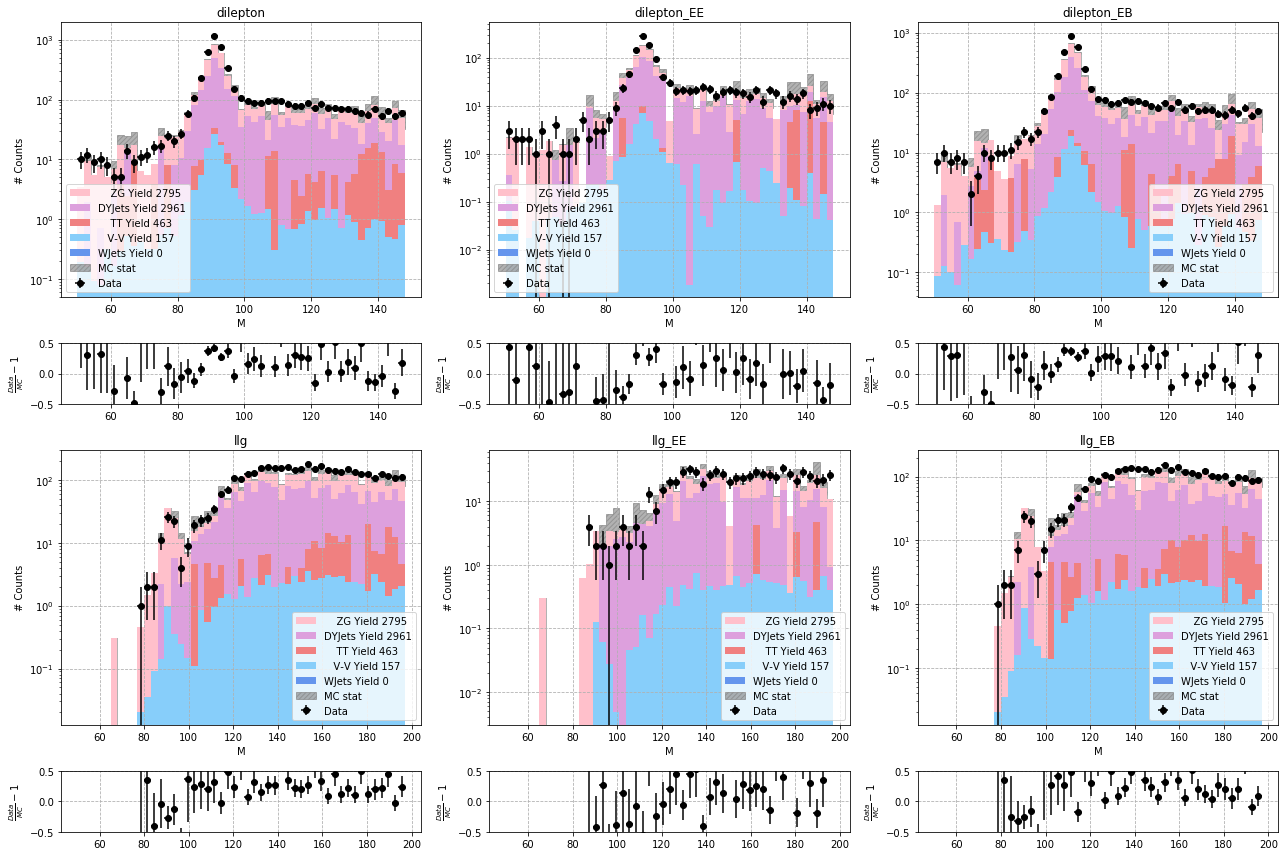

----------------Srr----------------


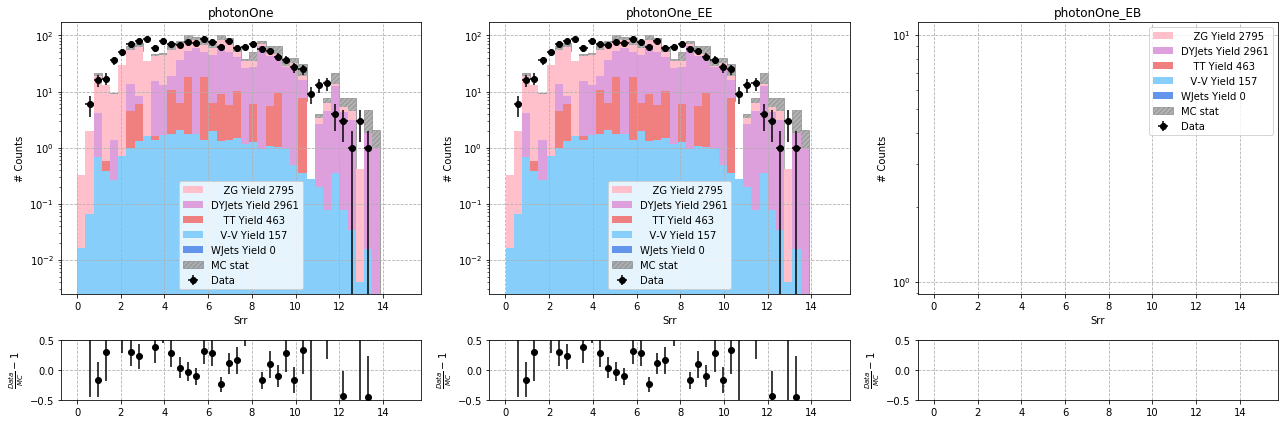

----------------Sipip----------------


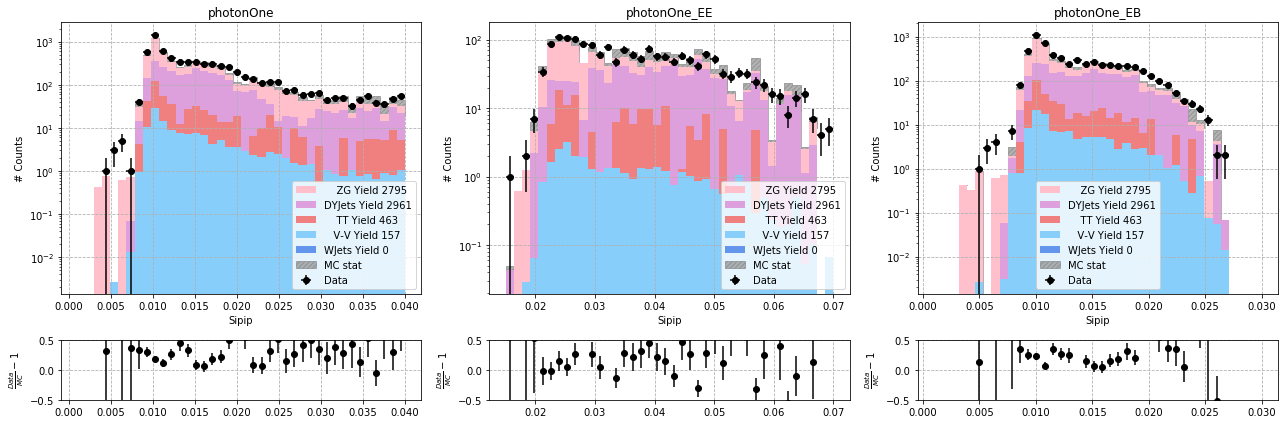

----------------Sieip----------------


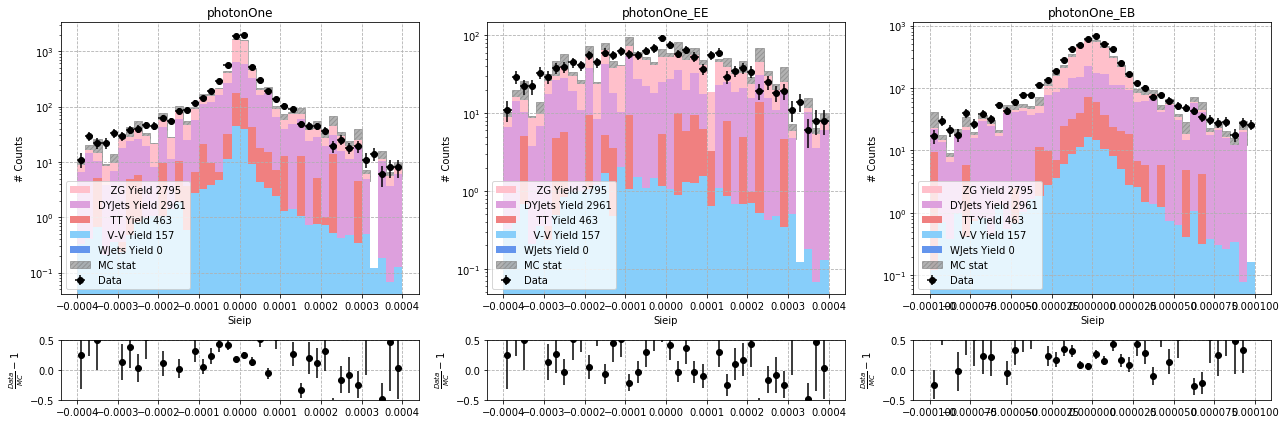

----------------Sieie----------------


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


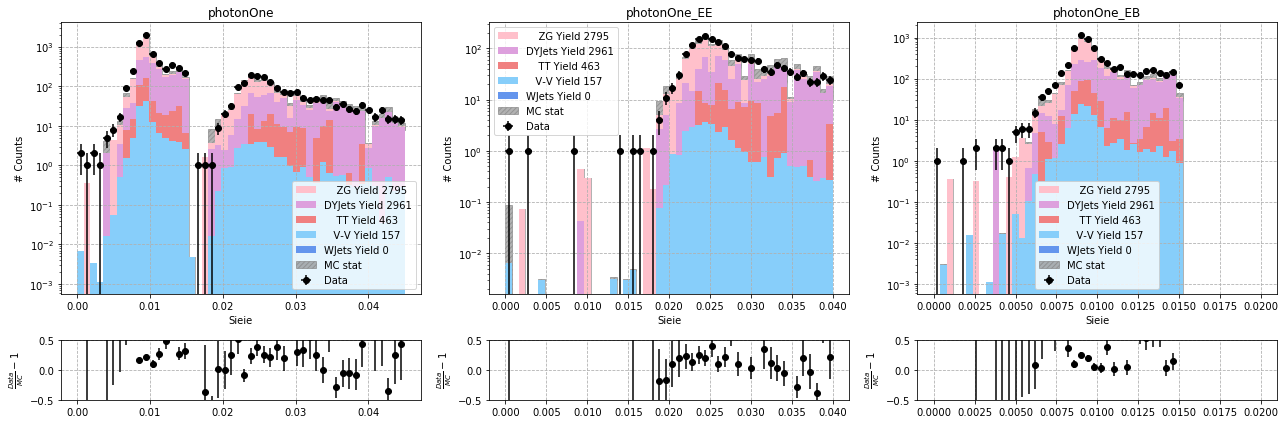

----------------E2x2----------------


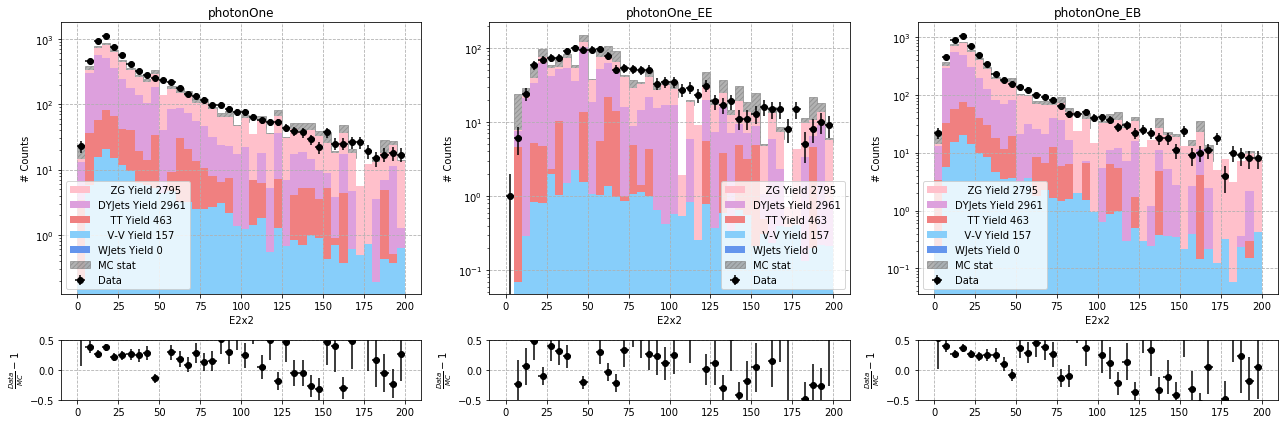

----------------E5x5----------------


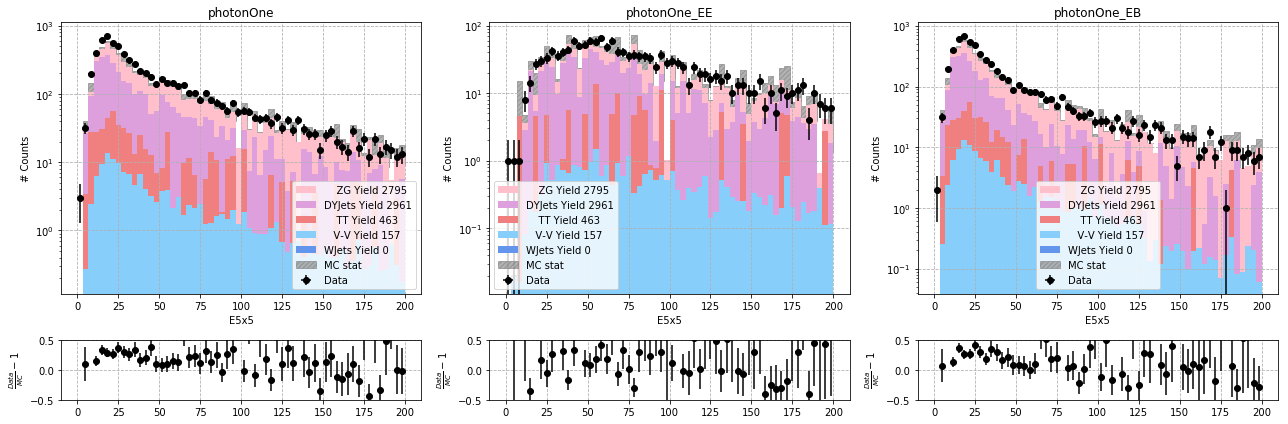

----------------PreShowerE----------------


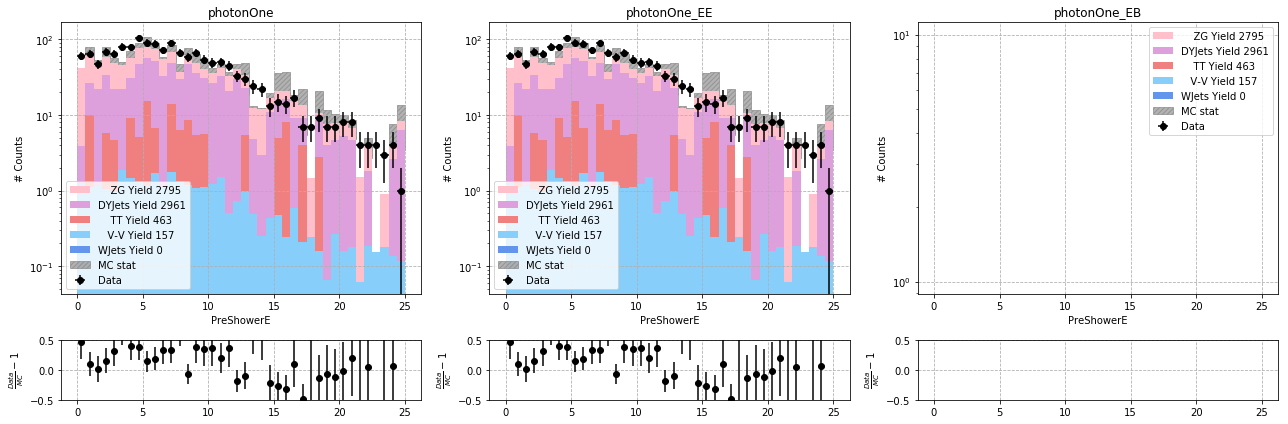

----------------ScEtaWidth----------------


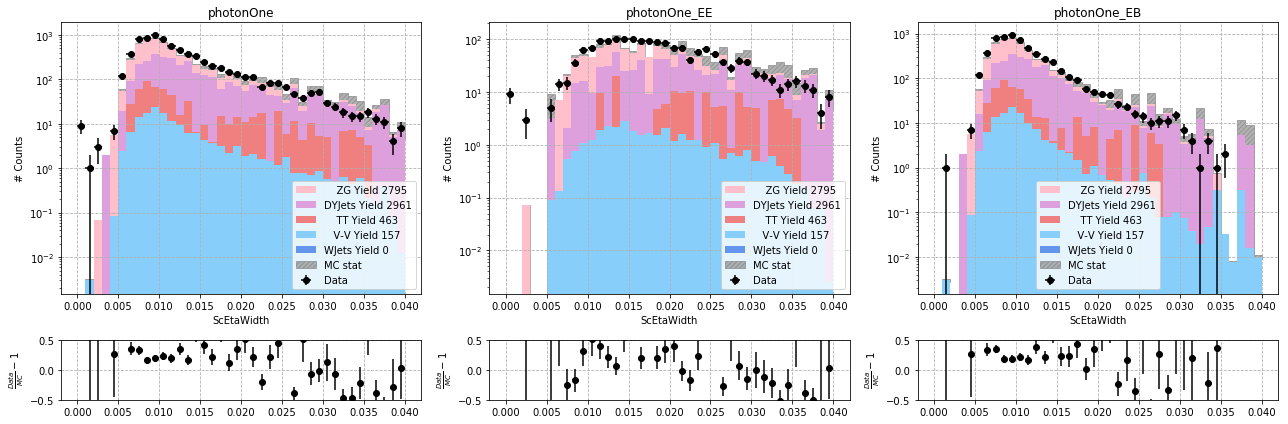

----------------ScPhiWidth----------------


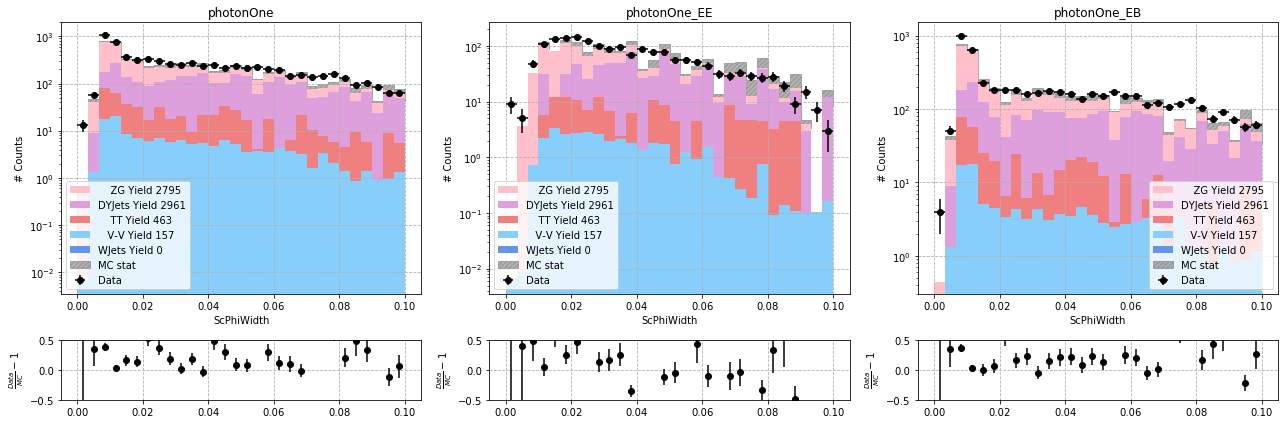

----------------ScRawE----------------


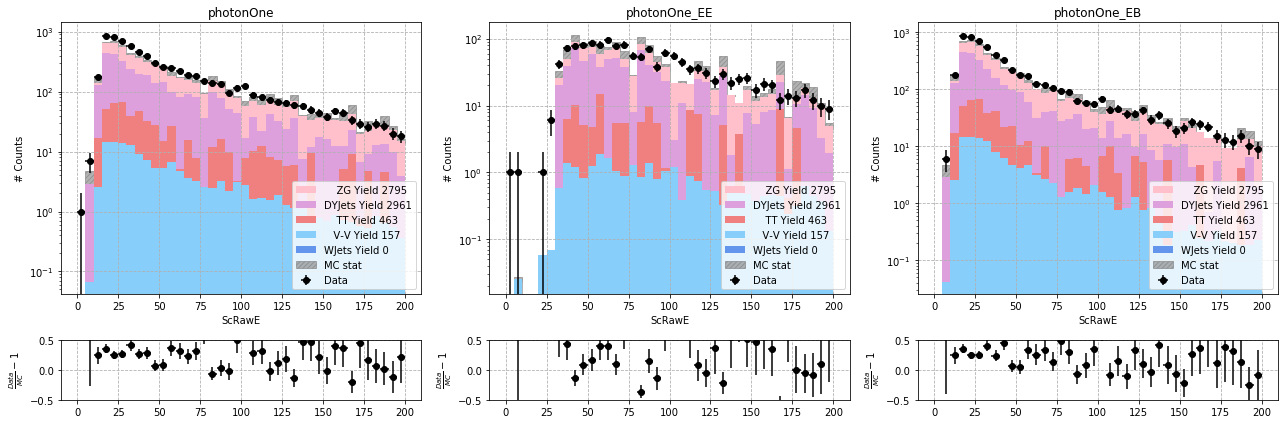

----------------ScBrem----------------


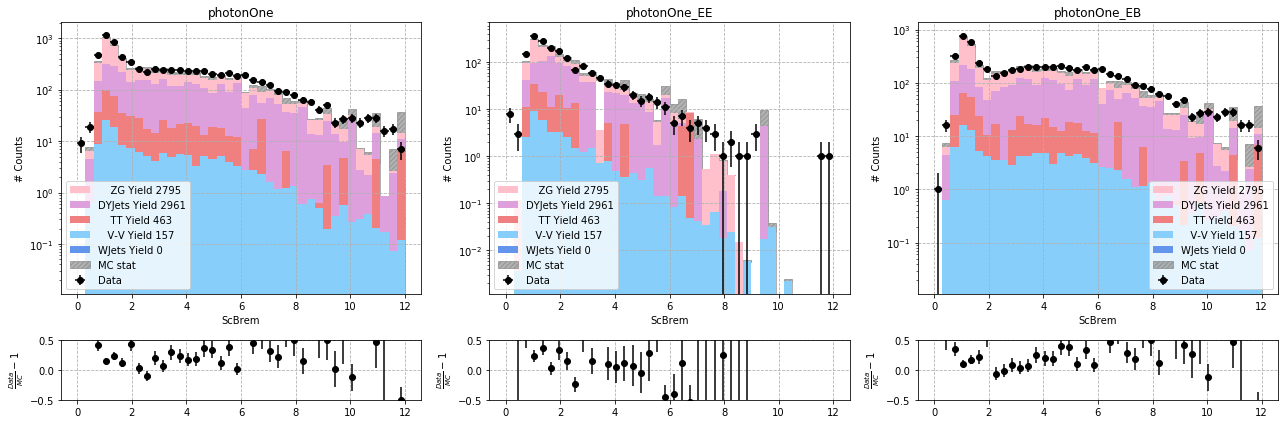

In [175]:
LOG = 'Single'
if LOG == 'both':
    for log in [True,False]:
        ###############################    
        if log:
            stackFol = Fol+'/log'
        else:
            stackFol = Fol+'/linear'
        ###############################    
        Multi_Ploting(Plotter, data,stacked, log, customRange, weightCorrection, Blind, Plotting, StatInclude)
else:
    ###############################    
    if log:
        stackFol = Fol+'/log'
    else:
        stackFol = Fol+'/linear'
    ###############################    
    Multi_Ploting(Plotter, data,stacked, log, customRange, weightCorrection, Blind, Plotting, StatInclude)

# NJets Graphs

In [ ]:
#LOG = 'Not both'
#log = True
LOG = 'both'
for i in range(5):
    if stacked:
        Fol  = 'nJets/Stacked_nJets'+str(i)
    else:
        Fol  = 'nJets/Unstacked_nJets'+str(i)
    
    PhaseSpace(
                data,
                phType = phType,
                Charge = Charge,
                Region = Region,
                Print  = Print,
                MVA    = MVA,
                )
    for d in data:
        d.AddCuts(d.df.nJets == i)
            
    
    if LOG == 'both':
        for log in [True,False]:
            ###############################    
            if log:
                stackFol = Fol+'/log'
            else:
                stackFol = Fol+'/linear'
            ###############################    
            Multi_Ploting(data,stacked,log,customRange,weightCorrection,Blind,Plotting,StatInclude)
    else:
        ###############################    
        if log:
            stackFol = Fol+'/log'
        else:
            stackFol = Fol+'/linear'
        ###############################   
        Multi_Ploting(data,stacked,log,customRange,weightCorrection,Blind,Plotting,StatInclude)

# Exploring 2D hists

In [ ]:
def Hist2D(X,Y,W,
          xrange,yrange):
    fig = plt.figure(figsize=(8,10))

    #plt.subplot(2,1,1)
    plt.hist2d(X,Y,
              range=[xrange,yrange],
              bins = 80,
              norm=col.LogNorm(),
              #norm=col.LogNorm,
              weights = W,
              #cmap = 'Blues'#'Reds'#'cool'#'jet'#'RdYlGn'
              )
    plt.title('DYJets',fontsize=20)
    ax = plt.gca()
    ax.set_xlabel(xpart+xvar,fontsize = 20)
    ax.set_ylabel(ypart+yvar,fontsize = 20)
    #plt.colorbar()
    fig.savefig(figpath+ xpart+xvar+'_'+ypart+xvar+'.png')

In [ ]:
xpart, xvar, xrange = 'dilepton'      , 'M' , [50,200]
#xpart, xvar, xrange = 'photonOne', 'Sieie' , [0.,0.031]
#xpart, xvar, xrange = 'photonOne', 'HoverE', [0.005,0.1]
#xpart, xvar, xrange = 'photonOne', 'Ich'   , [0.1,3]
#xpart, xvar, xrange = 'photonOne', 'Ineu'  , [0.1,0.4]
#xpart, xvar, xrange = 'photonOne', 'Iph'   , [0.1,5]
#xpart, xvar, xrange = 'photonOne', 'R9'    , [0.005,0.1]
#xpart, xvar, xrange = 'photonOne', 'MVA'   , [-1,1]

ypart, yvar, yrange = 'llg'      , 'M' , [50,300]
#ypart, yvar, yrange = 'dilepton'      , 'DR' , [0,6]
#ypart, yvar, yrange = 'dileptonPhoton', 'DR' , [0,6]
#ypart, yvar, yrange = 'dilepton'      , 'M'  , [30,150]
#ypart, yvar, yrange = 'leptonTwo'     , 'Pt' , [0,60]
#ypart, yvar, yrange = 'photonOne'     , 'Ich' , [0,60] 

X = [d.GetWithCuts(xpart+xvar) for d in data]
Y = [d.GetWithCuts(ypart+yvar) for d in data]
W = [d.GetWithCuts('weight')   for d in data]

ph = ""

N = 0
#xrange = Help.plotOpsAll[N]['range'][xvar][xpart]
#yrange = Help.plotOpsAll[N]['range'][yvar][ypart]
Hist2D(X[N],Y[N],W[N],xrange,yrange)

N = -2
#xrange = Help.plotOpsAll[N]['range'][xvar][xpart]
#yrange = Help.plotOpsAll[N]['range'][yvar][ypart]
Hist2D(X[N],Y[N],W[N],xrange,yrange)
